# Executive Summary

Through this analysis, I sought to investigate the effects of terrorism and terrorist attacks on human and economic development in the countries most impacted by terrorism, as identified by the Global Terrorism Index report. The countries that have consistently appeared as having the highest impact from terrorism, since the GTI was first published, are Iraq, Afghanistan, Nigeria, Pakistan, Syria, India and Yemen. Compiling data from the Global Terrorism Index report, the World Bank Indicators and the Human Development Index, Syria, Iraq and Afghanistan exhibited shifts in the HDI that visually appear to align with the beginning of the most recent conflicts in each of those countries.  The conflict in Aghanistan began with the US invasion in 2001 followed by the war which still continues today. The Iraq war began in 2003 and continued through 2011.  The Syrian Civil War began in 2011 and continues today.  This analysis uses Bayesian Inference to understand whether the observed shift is statistically significant. Clearly, this is not an insignificant area of study. Intuitively, one would expect that human and economic development would be severely impacted by these conflicts and this analysis is not meant to trivialize the impacts.

# Data and Variables

The data used in this analysis is compiled from three different sources:  The Global Terrorism Index(GTI), the Human Development Index (HDI), and the World Bank. 

The Global Terrorism Index (GTI) is a report published annually by the Institute for Economics and Peace (IEP).  It is an attempt to rank the nations of the world according to terrorist activity.  This report, first published in 2012, is based on data from the Global Terrorism Database which is curated by the National Consortium for the Study of Terrorism and Responses to Terrorism (START), a Department of Homeland Security Center of Excellence led by the University of Maryland. The Global Terrorism Database is considered to be the most comprehensive dataset on terrorist activity globally and has now codified over 170,000 terrorist incidents since 1970.   

The Human Development Index (HDI) was developed by Amartya Sen, an Indian economist, and Mahbub ul Haq, a Pakistani economist, and has been published by the United Nations Development Programme since 1990.   The HDI calculation combines the following three dimensions and was developed to support their belief that a country’s development should not only be evaluated by its economic advances but also by improvements in human development and well-being.  The three dimensions of the HDI are: 

Life Expectancy at Birth
Education:  Mean years of schooling and Expected years of schooling
A decent standard of living: Gross National Income (GNI) per capita

The World Bank publishes over a thousand annual indicators of economic development from hundreds of countries around the world.  The data for the seven countries that are part of the analysis is incomplete for many of the years since 1990 as it has been reported that it is, at times, very challenging to obtain accurate and complete data from these countries.  Several indicators have been extracted and examined in the visualizations that compare the countries with one another.  Also included in the visualizations are comparisons with similar data provided for the European Union and the North America as a comparison to developed countries.


# Visualizations

Utilizing various indicators published by the World Bank, the visualizations illustrate the three dimensions of the Human Development Index:  Life Expectancy at birth, primary, secondary and tertiary schooling gross enrollment ratio, Adult Literacy and GNI. For reference, also included are visualizations for Youth Literacy and Gross Domestic Product (GDP) per capita.  Finally, the HDI for each of the countries is visualized for the entire reporting period of 1990 through 2015 (data for 2016 has not been published.)


# Bayesian Inference and Regression Model

Despite the level of terrorism in these countries, visual inspection of the time series plot of the HDI for each country shows a (surprising) positive rate of change from 1990 through 2015, with the exception of Syria, which exhibits a downturn aligned with the start of the Syrian Civil War in 2011.  Furthermore, there is a noticeable shift  in the trend for Syria, Iraq and Afghanistan.  To that end, I wanted to investigate this shift further and utilized a Bayesian approach to measure the extent of the difference in HDI before and after the start of each conflict for these three countries.   

Hypothesis:  Have the US and global peacekeeping and rebuilding efforts helped to improve the well-being of Iraq's and Afghanistan's populations as observed in the shift in the Human Development Index in the years after the start of their respective conflicts?

The following is a discussion of how I approached the Bayesian Inference and starts with a brief overview.  The goal of this model is to use a prior belief about the mean and standard deviation of the HDI and define a probability distribution for these parameters based on observed data.  The model for each country requires that I establish two different "populations" that will be compared.  The first "population" is the data beginning in 1990 and leading up to and including the first year of the conflict.  The second "population" is the data after the start of the conflict and through 2015.  I chose to include the year the conflict began as part of the first "population" because I believe that the effects on human development and well-being would not manifest themselves in the dimensions used to calculate the HDI until the year following the start.

To establish the model, I begin with defining the prior for the mean and standard deviation for the HDI.  The prior is my belief about these parameters for the Human Development Index (HDI) before any evidence (data) is taken into account.  The values that I used for the Priors are the mean and standard deviation calculated from the data for all seven countries for the time period of 1990 through 2015.  This is the complete set of HDI data and I believe this to be a reasonable estimate for these values and starting point for the model.  It should be noted that the prior is the same for both populations.

Following the establishment of the prior, I define the Likelihood, which is the probability of observing the data given that the prior mean and standard deviations are true.  I establish a likelihood for each population as explained above, with the observed data for each country divided into two "populations" -- "before" and "after" the start of the conflict.  The observed data is the calculated HDI as published by the United Nations.

The model plots the posterior distribution of the parameters:  the mean and standard deviation for the HDI.  It also presents a 95% credible interval for each parameter.  The credible interval tells me that there is a 95% probability that the values for each parameter lie within the given interval.  Finally, the model also provides several metrics including the difference in means, standard deviation and the effect size.  The effect size is a measure of how different the HDI is before and after the start of each conflict and goes beyond just knowing what the difference is.

The Bayesian Regression model uses a Patsy-style approach to predict HDI as a function of the GTI as the predictor.  The model provides the 95% credible interval for the intercept, coefficient and standard deviation.


# Analysis and Conclusions

For the Bayesian Inference for both Afghanistan and Iraq, the models indicate that there are statistically significant differences between the HDI before and after the start of the most recent conflicts in each of these countries.  However, the difference is positive which is counter-intuitive.  This might suggest that global and US efforts to rebuild infrastructure has had a positive impact, if even modest, on the well-being of the population in each of these countries devastated by war. Syria’s Civil War began in 2011.  While visually there appears to be a downturn in HDI, the analysis does not suggest a statistically significant difference prior to and after the start of the conflict.

The Bayesian Regression model indicates a negative correlation between GTI and HDI, as would be expected.  The higher the GTI ranking, the greater the impact as a result of terrorism and therefore a negative impact on the well-being of the country's population as measured by life expectancy, education, literacy and the average income of a country's citizens.  

In [2]:
#The following code imports the various python libraries utilized in this notebook.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pymc3 as pm

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [4]:
#The following eda function is courtesy of Ritika Bhasker.

In [3]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()


In [5]:
#Pandas option to display the maximum number of columns in the dataframe, regardless of the number (h/t to Mike Costa)
pd.set_option('display.max_columns', None)

In [6]:
#Reading in World Bank Data 
country = pd.read_csv('../World_Indicators_Data/Country.csv')

In [7]:
country_notes = pd.read_csv('../World_Indicators_Data/CountryNotes.csv')

In [8]:
indicators = pd.read_csv('../World_Indicators_Data/Indicators.csv')

In [9]:
#Investigating the columns and data contained in each of the three files.

In [10]:
country_notes.head()

Countrycode         Seriescode  \
0         ABW  EG.EGY.PRIM.PP.KD   
1         ABW     EG.ELC.RNEW.ZS   
2         ABW     EG.FEC.RNEW.ZS   
3         ABW        SM.POP.NETM   
4         ABW        SM.POP.TOTL   

                                         Description  
0  Sources: Estimated based on UN Energy Statisti...  
1               Sources: UN Energy Statistics (2014)  
2               Sources: UN Energy Statistics (2014)  
3  Data sources : United Nations World Population...  
4  Estimates are derived from data on foreign-bor...

In [11]:
#country data includes sources and availability of data
country.head()

CountryCode       ShortName       TableName  \
0         AFG     Afghanistan     Afghanistan   
1         ALB         Albania         Albania   
2         DZA         Algeria         Algeria   
3         ASM  American Samoa  American Samoa   
4         ADO         Andorra         Andorra   

                                  LongName Alpha2Code    CurrencyUnit  \
0             Islamic State of Afghanistan         AF  Afghan afghani   
1                      Republic of Albania         AL    Albanian lek   
2  People's Democratic Republic of Algeria         DZ  Algerian dinar   
3                           American Samoa         AS     U.S. dollar   
4                  Principality of Andorra         AD            Euro   

                                        SpecialNotes  \
0  Fiscal year end: March 20; reporting period fo...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                       Region           IncomeGroup Wb2Code  \
0                  South Asia            Low income      AF   
1       Europe & Central Asia   Upper middle income      AL   
2  Middle East & North Africa   Upper middle income      DZ   
3         East Asia & Pacific   Upper middle income      AS   
4       Europe & Central Asia  High income: nonOECD      AD   

                            NationalAccountsBaseYear  \
0                                            2002/03   
1  Original chained constant price data are resca...   
2                                               1980   
3                                                NaN   
4                                               2000   

  NationalAccountsReferenceYear                  SnaPriceValuation  \
0                           NaN  Value added at basic prices (VAB)   
1                          1996  Value added at basic prices (VAB)   
2                           NaN  Value added at basic prices (VAB)   
3                           NaN                                NaN   
4                           NaN  Value added at basic prices (VAB)   

  LendingCategory OtherGroups  \
0             IDA        HIPC   
1            IBRD         NaN   
2            IBRD         NaN   
3             NaN         NaN   
4             NaN         NaN   

                            SystemOfNationalAccounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   
2  Country uses the 1968 System of National Accou...   
3  Country uses the 1968 System of National Accou...   
4  Country uses the 1968 System of National Accou...   

  AlternativeConversionFactor                       PppSurveyYear  \
0                         NaN                                 NaN   
1                         NaN                             Rolling   
2                         NaN                                2011   
3                         NaN  2011 (household consumption only).   
4                         NaN                                 NaN   

                   BalanceOfPaymentsManualInUse ExternalDebtReportingStatus  \
0                                           NaN                      Actual   
1  IMF Balance of Payments Manual, 6th edition.                      Actual   
2  IMF Balance of Payments Manual, 6th edition.                      Actual   
3                                           NaN                         NaN   
4                                           NaN                         NaN   

          SystemOfTrade      GovernmentAccountingConcept  \
0  General trade system  Consolidated central government   
1  General trade system     Budgetary central government   
2  Special trade system     Budgetary central government   
3  Special trade system                              NaN   
4  Special trade system                              NaN   

       

In [12]:
#The indicators file contains the values for over a thousand different indicators including economic data, health,
#education and employment data.
indicators.head()

CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06

# Exploratory Data Analysis

The following cells create dataframes for each of the countries included in this analysis:  Pakistan, Afghanistan
Iraq, India, Nigeria, Syria and Yemen.  The data includes values dating back to 1960.  I am only pulling data
from 1990 through 2015 (the latest available) as these dates are aligned with the Human Development Index.  It should
be noted that for many of the countries included this analysis, data is sometimes missing or lacking.  Due to the
inconsistency of this data, it is primarily used for exploratory data anlaysis through the visualizations to identify
any interesting trends.

In [13]:
top_gti = indicators[(indicators.CountryName == 'Afghanistan') | (indicators.CountryName == 'Iraq') |
(indicators.CountryName == 'Pakistan') | (indicators.CountryName == 'Nigeria') | (indicators.CountryCode == 'SYR') |
(indicators.CountryName == 'India')| (indicators.CountryCode == 'YEM')]

In [14]:
euu = indicators[(indicators.CountryCode == 'EUU') & (indicators.Year >= 1990)]
nac = indicators[(indicators.CountryCode == 'NAC') & (indicators.Year >= 1990)]
pak = indicators[(indicators.CountryName  == 'Pakistan') & (indicators.Year >= 1990)]
afg = indicators[(indicators.CountryName == 'Afghanistan') & (indicators.Year >= 1990)]
iraq = indicators[(indicators.CountryName == 'Iraq') & (indicators.Year >= 1990)]
india = indicators[(indicators.CountryName == 'India') & (indicators.Year >= 1990)]
nigeria = indicators[(indicators.CountryName == 'Nigeria') & (indicators.Year >= 1990)]
syria = indicators[(indicators.CountryCode == 'SYR') & (indicators.Year >= 1990)]
yemen = indicators[(indicators.CountryCode == 'YEM') & (indicators.Year >= 1990)]

In [16]:
#writing csv files to accompany the Jupyter Notebook as the size of the Indicators file exceeds the limit for Github.
euu.to_csv('euu.csv', index=False)
nac.to_csv('nac.csv', index=False)
pak.to_csv('pak.csv', index=False)
afg.to_csv('afg.csv', index=False)
iraq.to_csv('iraq.csv', index=False)
india.to_csv('india.csv', index=False)
nigeria.to_csv('nigeria.csv', index=False)
syria.to_csv('syria.csv',index=False)
yemen.to_csv('yemen.csv', index=False)

In [18]:
#reading in the files
euu = pd.read_csv('euu.csv')
nac = pd.read_csv('nac.csv')
pak = pd.read_csv('pak.csv')
afg = pd.read_csv('afg.csv')
iraq = pd.read_csv('iraq.csv')
india = pd.read_csv('india.csv')
nigeria = pd.read_csv('nigeria.csv')
syria = pd.read_csv('syria.csv')
yemen = pd.read_csv('yemen.csv')

The following several cells extract data for Adult and Youth Literacy rates and then plots this data in a time series plot to visually identify any interesting trends.

In [17]:
euu_adult_litr = euu[euu['IndicatorCode'].str.contains('SE.ADT.LITR.ZS')]
nac_adult_litr = nac[nac['IndicatorCode'].str.contains('SE.ADT.LITR.ZS')]
pak_adult_litr = pak[pak['IndicatorCode'].str.contains('SE.ADT.LITR.ZS')]
afg_adult_litr = afg[afg['IndicatorCode'].str.contains('SE.ADT.LITR.ZS')]
iraq_adult_litr = iraq[iraq['IndicatorCode'].str.contains('SE.ADT.LITR.ZS')]
india_adult_litr = india[india['IndicatorCode'].str.contains('SE.ADT.LITR.ZS')]
nigeria_adult_litr = nigeria[nigeria['IndicatorCode'].str.contains('SE.ADT.LITR.ZS')]
syria_adult_litr = syria[syria['IndicatorCode'].str.contains('SE.ADT.LITR.ZS')]
yemen_adult_litr = yemen[yemen['IndicatorCode'].str.contains('SE.ADT.LITR.ZS')]

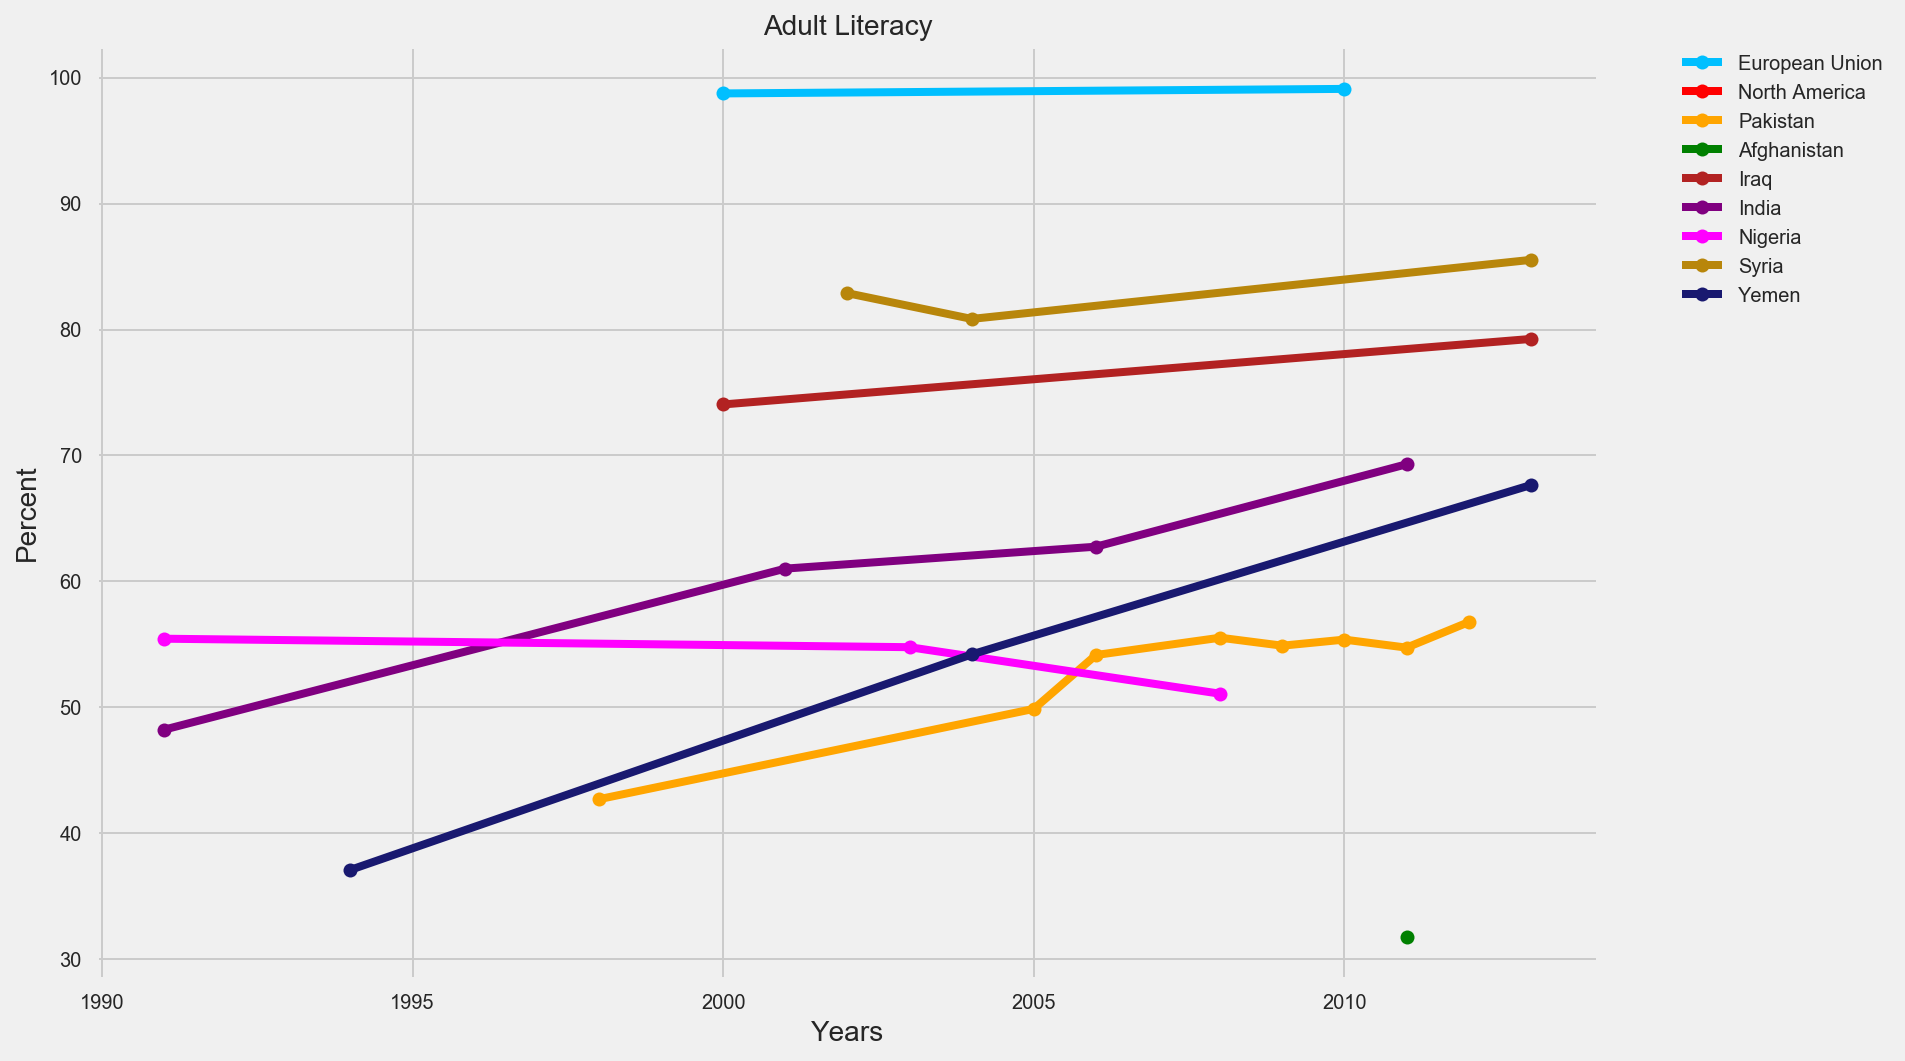

In [20]:
fig = plt.figure(figsize=(12,8))
#
plt.style.use('fivethirtyeight')
#
plt.plot(euu_adult_litr.Year,euu_adult_litr.Value,'o-',label='European Union',color='deepskyblue')
plt.plot(nac_adult_litr.Year,nac_adult_litr.Value,'o-',label='North America',color='red')
plt.plot(pak_adult_litr.Year,pak_adult_litr.Value,'o-',label='Pakistan',color='orange')
plt.plot(afg_adult_litr.Year,afg_adult_litr.Value,'o-',label='Afghanistan',color='green')
plt.plot(iraq_adult_litr.Year,iraq_adult_litr.Value,'o-',label='Iraq',color='firebrick')
plt.plot(india_adult_litr.Year,india_adult_litr.Value,'o-',label='India',color='purple')
plt.plot(nigeria_adult_litr.Year,nigeria_adult_litr.Value,'o-',label='Nigeria',color='magenta')
plt.plot(syria_adult_litr.Year,syria_adult_litr.Value, 'o-', label='Syria', color='darkgoldenrod')
plt.plot(yemen_adult_litr.Year,yemen_adult_litr.Value, 'o-', label='Yemen', color='midnightblue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Percent',  fontsize=14)
plt.title('Adult Literacy', fontsize=14)
fig.savefig('adult_literacy.png')

In [19]:
euu_1524_litr = euu[euu['IndicatorCode'].str.contains('SE.ADT.1524.LT.ZS')]
nac_1524_litr = nac[nac['IndicatorCode'].str.contains('SE.ADT.1524.LT.ZS')]
pak_1524_litr = pak[pak['IndicatorCode'].str.contains('SE.ADT.1524.LT.ZS')]
afg_1524_litr = afg[afg['IndicatorCode'].str.contains('SE.ADT.1524.LT.ZS')]
iraq_1524_litr = iraq[iraq['IndicatorCode'].str.contains('SE.ADT.1524.LT.ZS')]
india_1524_litr = india[india['IndicatorCode'].str.contains('SE.ADT.1524.LT.ZS')]
nigeria_1524_litr = nigeria[nigeria['IndicatorCode'].str.contains('SE.ADT.1524.LT.ZS')]
syria_1524_litr = syria[syria['IndicatorCode'].str.contains('SE.ADT.1524.LT.ZS')]
yemen_1524_litr = yemen[yemen['IndicatorCode'].str.contains('SE.ADT.1524.LT.ZS')]

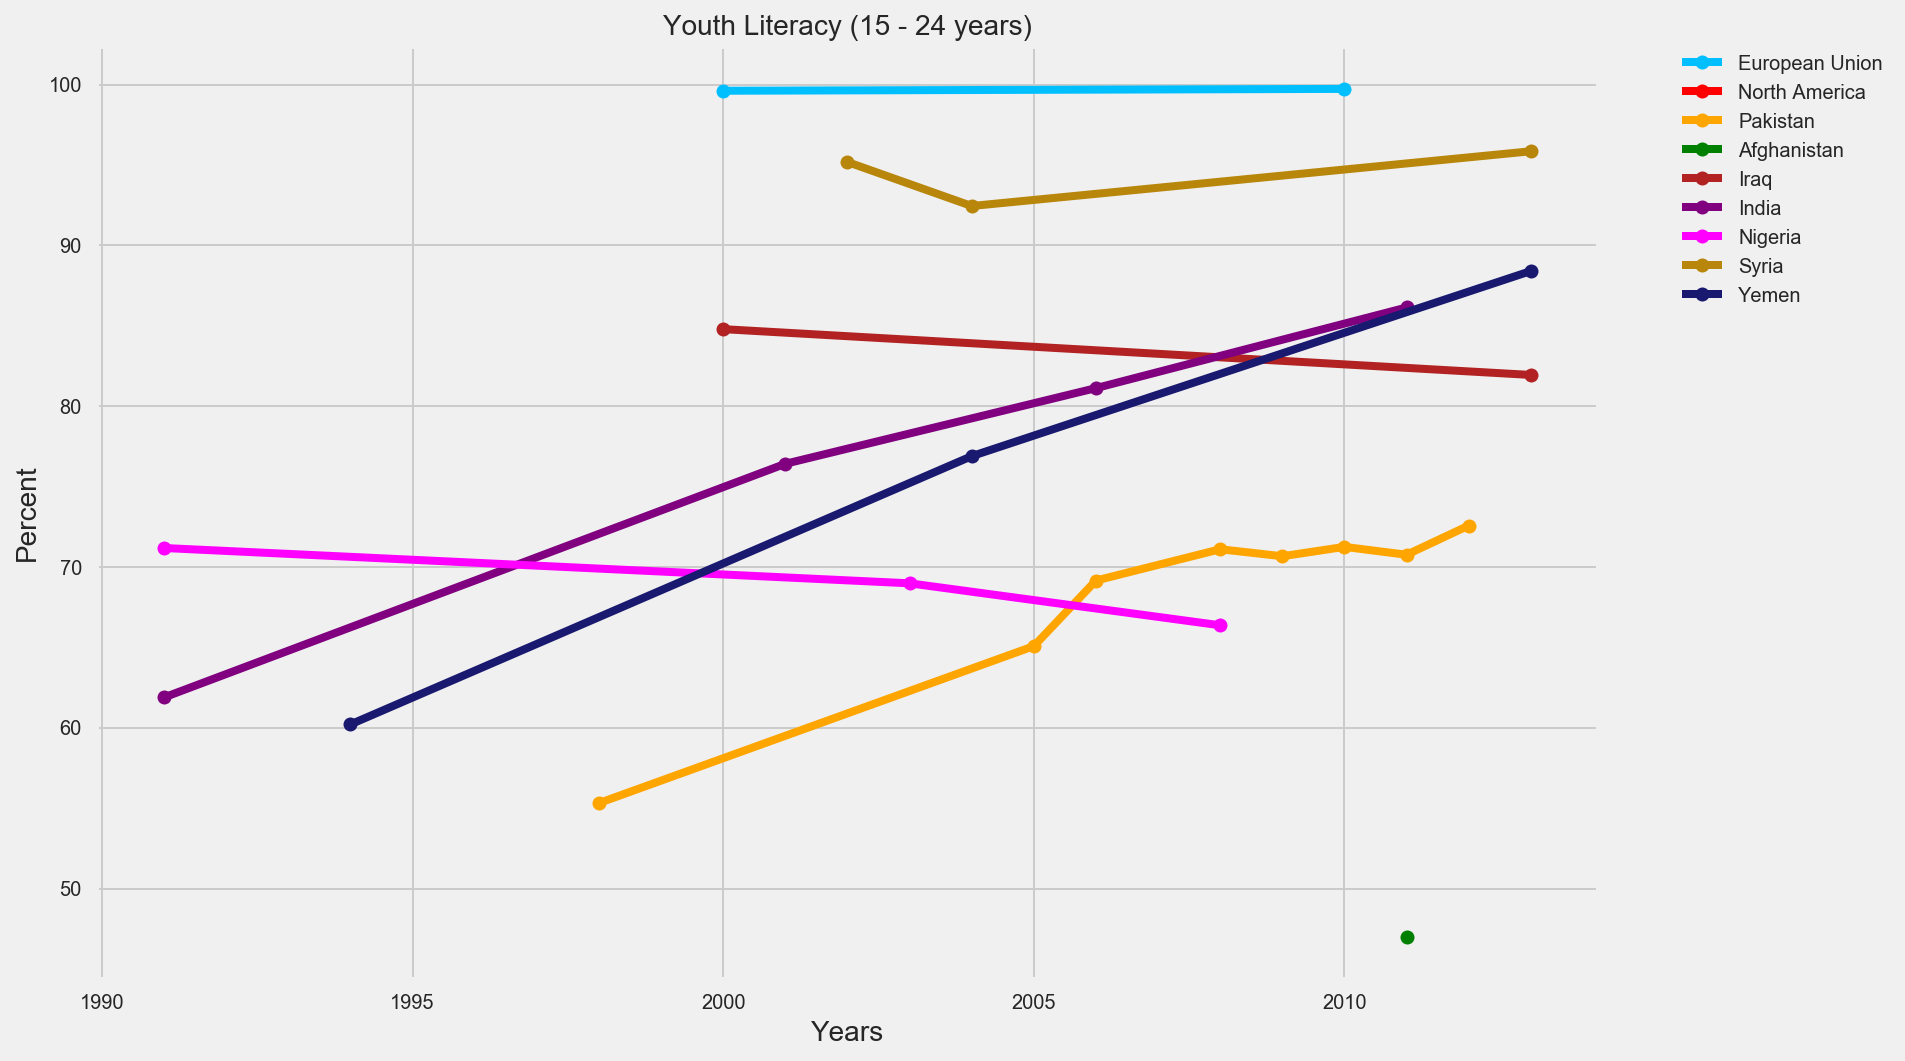

In [35]:

fig = plt.figure(figsize=(12,8))
#
plt.style.use('fivethirtyeight')
#
plt.plot(euu_1524_litr.Year,euu_1524_litr.Value,'o-',label='European Union',color='deepskyblue')
plt.plot(nac_1524_litr.Year,nac_1524_litr.Value,'o-',label='North America',color='red')
plt.plot(pak_1524_litr.Year,pak_1524_litr.Value,'o-',label='Pakistan',color='orange')
plt.plot(afg_1524_litr.Year,afg_1524_litr.Value,'o-',label='Afghanistan',color='green')
plt.plot(iraq_1524_litr.Year,iraq_1524_litr.Value,'o-',label='Iraq',color='firebrick')
plt.plot(india_1524_litr.Year,india_1524_litr.Value,'o-',label='India',color='purple')
plt.plot(nigeria_1524_litr.Year,nigeria_1524_litr.Value,'o-',label='Nigeria',color='magenta')
plt.plot(syria_1524_litr.Year,syria_1524_litr.Value, 'o-', label='Syria', color='darkgoldenrod')
plt.plot(yemen_1524_litr.Year,yemen_1524_litr.Value, 'o-', label='Yemen', color='midnightblue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Percent',  fontsize=14)
plt.title('Youth Literacy (15 - 24 years)', fontsize=14)
fig.savefig('youth_literacy.png')

The following following extracts data for the Gross National Income per capita (PPP).  The GNI per capita is the dollar value of a country's final income in a year divided by its population.  It reflects the average income of a country's citizens.  GNI is one of the dimensions of the Human Development Index.

In [22]:
euu_gni = euu[euu.IndicatorCode == 'NY.GNP.PCAP.PP.CD']
nac_gni = nac[nac.IndicatorCode == 'NY.GNP.PCAP.PP.CD']
pak_gni = pak[pak.IndicatorCode == 'NY.GNP.PCAP.PP.CD']
afg_gni = afg[afg.IndicatorCode == 'NY.GNP.PCAP.PP.CD']
iraq_gni = iraq[iraq.IndicatorCode == 'NY.GNP.PCAP.PP.CD']
india_gni = india[india.IndicatorCode == 'NY.GNP.PCAP.PP.CD']
nigeria_gni = nigeria[nigeria.IndicatorCode == 'NY.GNP.PCAP.PP.CD']
syria_gni = syria[syria.IndicatorCode == 'NY.GNP.PCAP.PP.CD']
yemen_gni = yemen[yemen.IndicatorCode == 'NY.GNP.PCAP.PP.CD']

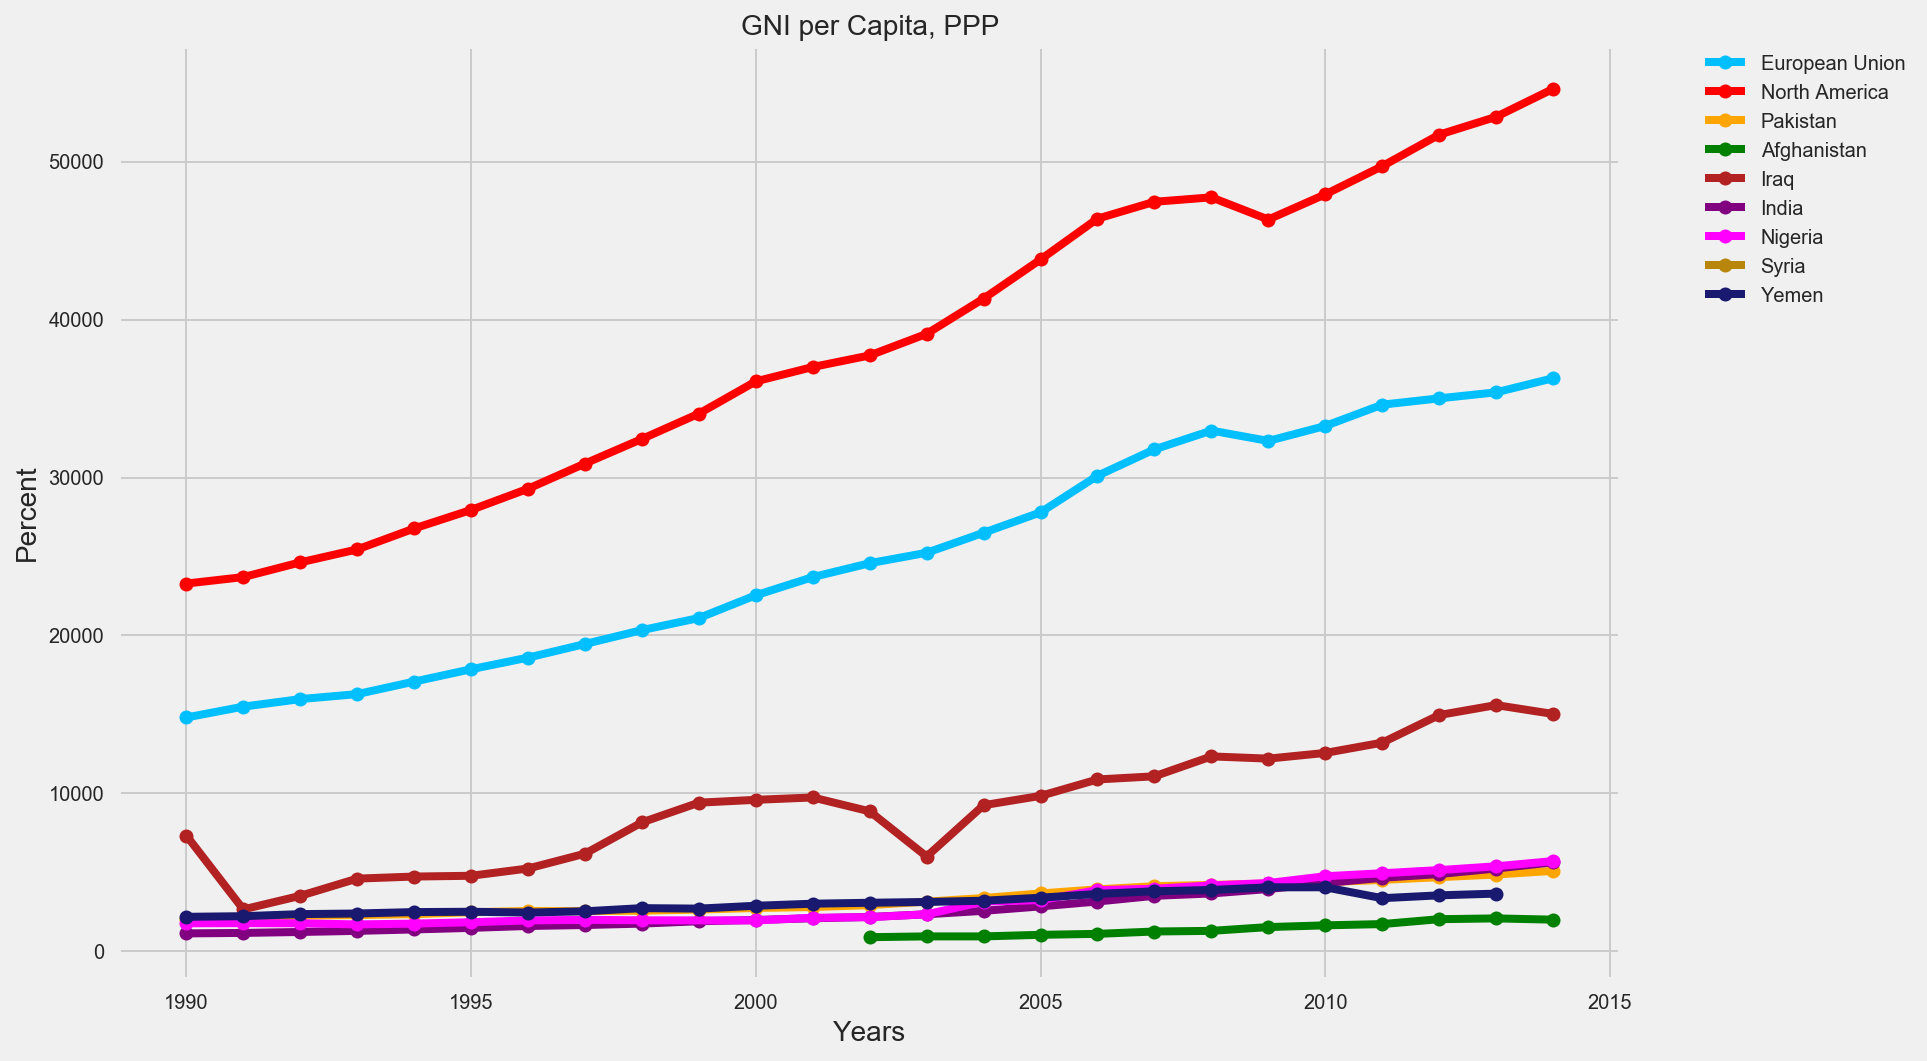

In [23]:
fig = plt.figure(figsize=(12,8))
#
plt.style.use('fivethirtyeight')
#
plt.plot(euu_gni.Year,euu_gni.Value,'o-',label='European Union',color='deepskyblue')
plt.plot(nac_gni.Year,nac_gni.Value,'o-',label='North America',color='red')
plt.plot(pak_gni.Year,pak_gni.Value,'o-',label='Pakistan',color='orange')
plt.plot(afg_gni.Year,afg_gni.Value,'o-',label='Afghanistan',color='green')
plt.plot(iraq_gni.Year,iraq_gni.Value,'o-',label='Iraq',color='firebrick')
plt.plot(india_gni.Year,india_gni.Value,'o-',label='India',color='purple')
plt.plot(nigeria_gni.Year,nigeria_gni.Value,'o-',label='Nigeria',color='magenta')
plt.plot(syria_gni.Year,syria_gni.Value, 'o-', label='Syria', color='darkgoldenrod')
plt.plot(yemen_gni.Year,yemen_gni.Value, 'o-', label='Yemen', color='midnightblue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Percent',  fontsize=14)
plt.title('GNI per Capita, PPP', fontsize=14)
fig.savefig('GNI.png')

The following cells extract and plot Life Expectancy at birth.  Life Expectancy is one of the dimensions of the Human Development Index.

In [24]:
euu_le = euu[euu.IndicatorCode == 'SP.DYN.LE00.IN']
nac_le = nac[nac.IndicatorCode == 'SP.DYN.LE00.IN']
pak_le = pak[pak.IndicatorCode == 'SP.DYN.LE00.IN']
afg_le = afg[afg.IndicatorCode == 'SP.DYN.LE00.IN']
iraq_le = iraq[iraq.IndicatorCode == 'SP.DYN.LE00.IN']
india_le = india[india.IndicatorCode == 'SP.DYN.LE00.IN']
nigeria_le = nigeria[nigeria.IndicatorCode == 'SP.DYN.LE00.IN']
syria_le = syria[syria.IndicatorCode == 'SP.DYN.LE00.IN']
yemen_le = yemen[yemen.IndicatorCode == 'SP.DYN.LE00.IN']

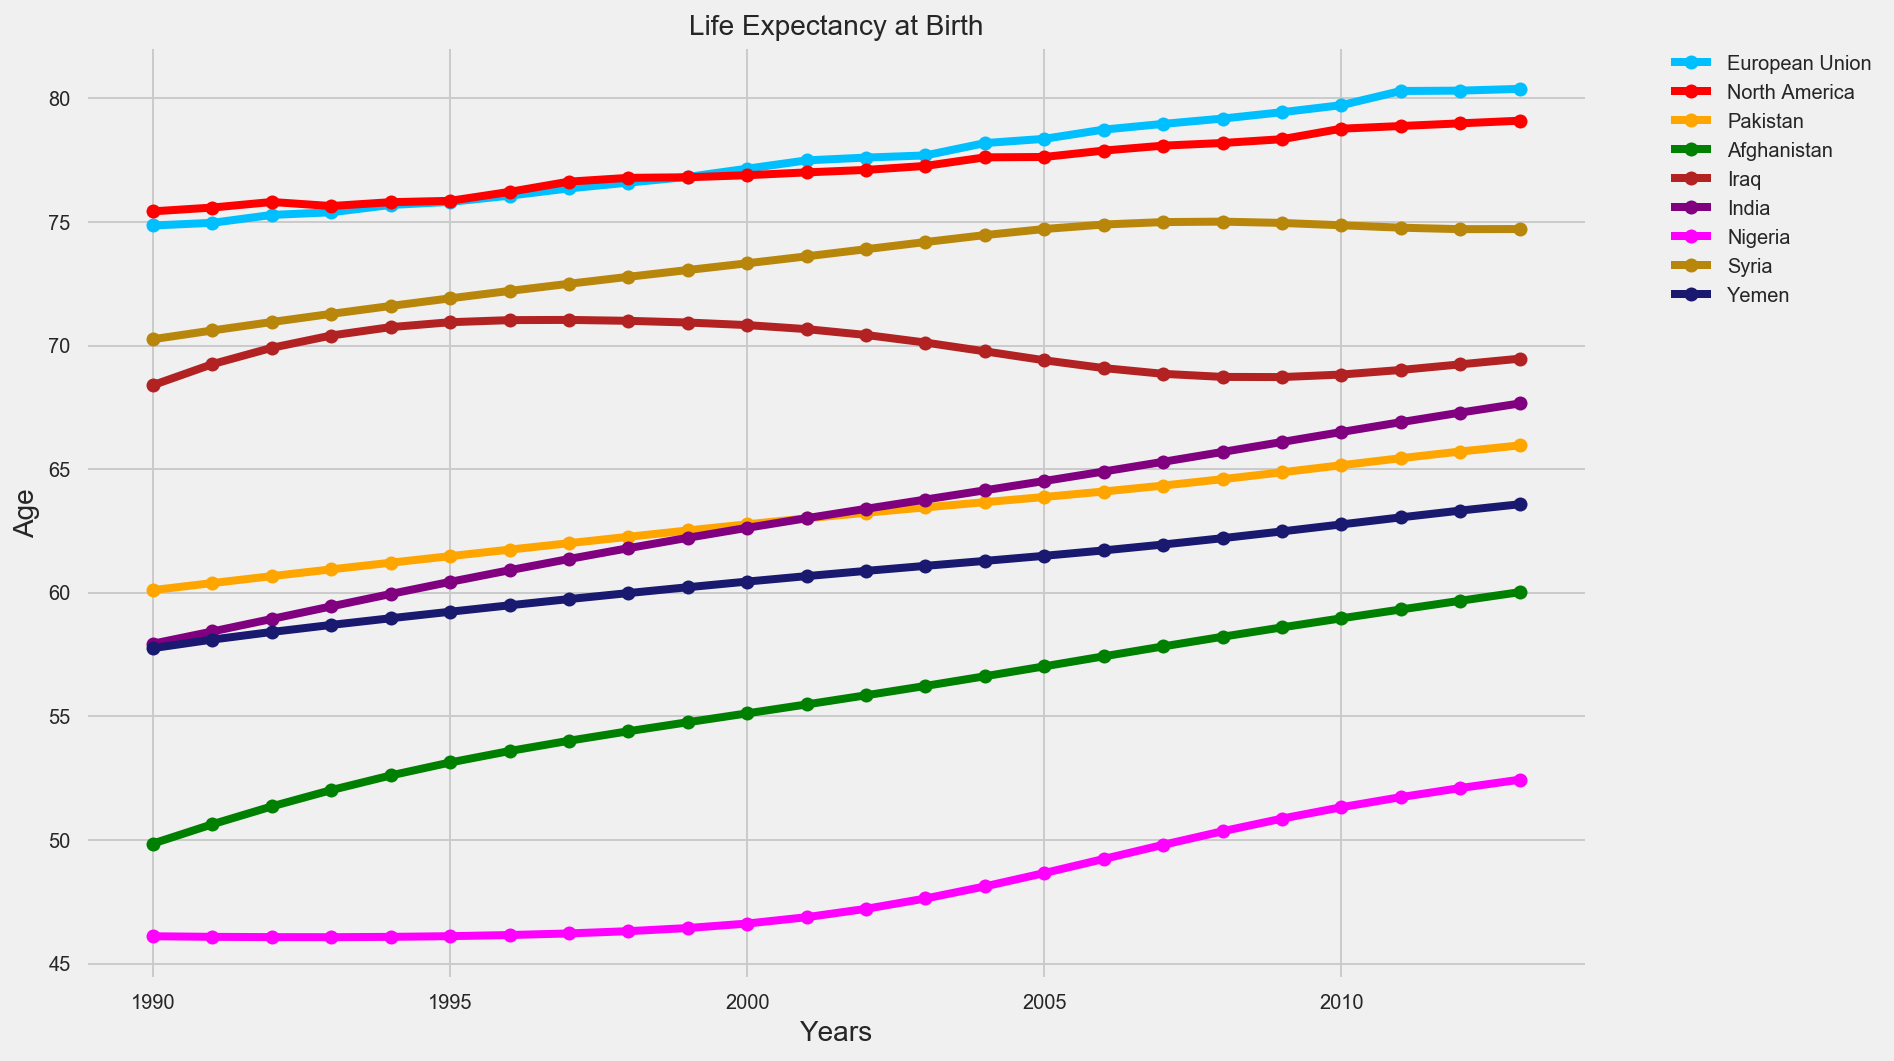

In [25]:
fig = plt.figure(figsize=(12,8))
#
plt.style.use('fivethirtyeight')
#
plt.plot(euu_le.Year,euu_le.Value,'o-',label='European Union',color='deepskyblue')
plt.plot(nac_le.Year,nac_le.Value,'o-',label='North America',color='red')
plt.plot(pak_le.Year,pak_le.Value,'o-',label='Pakistan',color='orange')
plt.plot(afg_le.Year,afg_le.Value,'o-',label='Afghanistan',color='green')
plt.plot(iraq_le.Year,iraq_le.Value,'o-',label='Iraq',color='firebrick')
plt.plot(india_le.Year,india_le.Value,'o-',label='India',color='purple')
plt.plot(nigeria_le.Year,nigeria_le.Value,'o-',label='Nigeria',color='magenta')
plt.plot(syria_le.Year,syria_le.Value, 'o-', label='Syria', color='darkgoldenrod')
plt.plot(yemen_le.Year,yemen_le.Value, 'o-', label='Yemen', color='midnightblue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Age',  fontsize=14)
plt.title('Life Expectancy at Birth', fontsize=14)
fig.savefig('le.png')

The following cells capture and plot the gross enrollment ratio for both secondary and primary levels of school.  
(Although not available in the World Bank data, the  combined gross enrolment ratio (CGER), incorporating all three levels of education, is used to calculate the Human Development Index (HDI).  The education dimension in the HDI calculation includes both the CEGR as well as the adult literacy rate

In [26]:
euu_sec = euu[euu.IndicatorCode == 'SE.SEC.ENRR']
nac_sec = nac[nac.IndicatorCode == 'SE.SEC.ENRR']
pak_sec = pak[pak.IndicatorCode == 'SE.SEC.ENRR']
afg_sec = afg[afg.IndicatorCode == 'SE.SEC.ENRR']
iraq_sec = iraq[iraq.IndicatorCode == 'SE.SEC.ENRR']
india_sec = india[india.IndicatorCode == 'SE.SEC.ENRR']
nigeria_sec = nigeria[nigeria.IndicatorCode == 'SE.SEC.ENRR']
syria_sec = syria[syria.IndicatorCode == 'SE.SEC.ENRR']
yemen_sec = yemen[yemen.IndicatorCode == 'SE.SEC.ENRR']

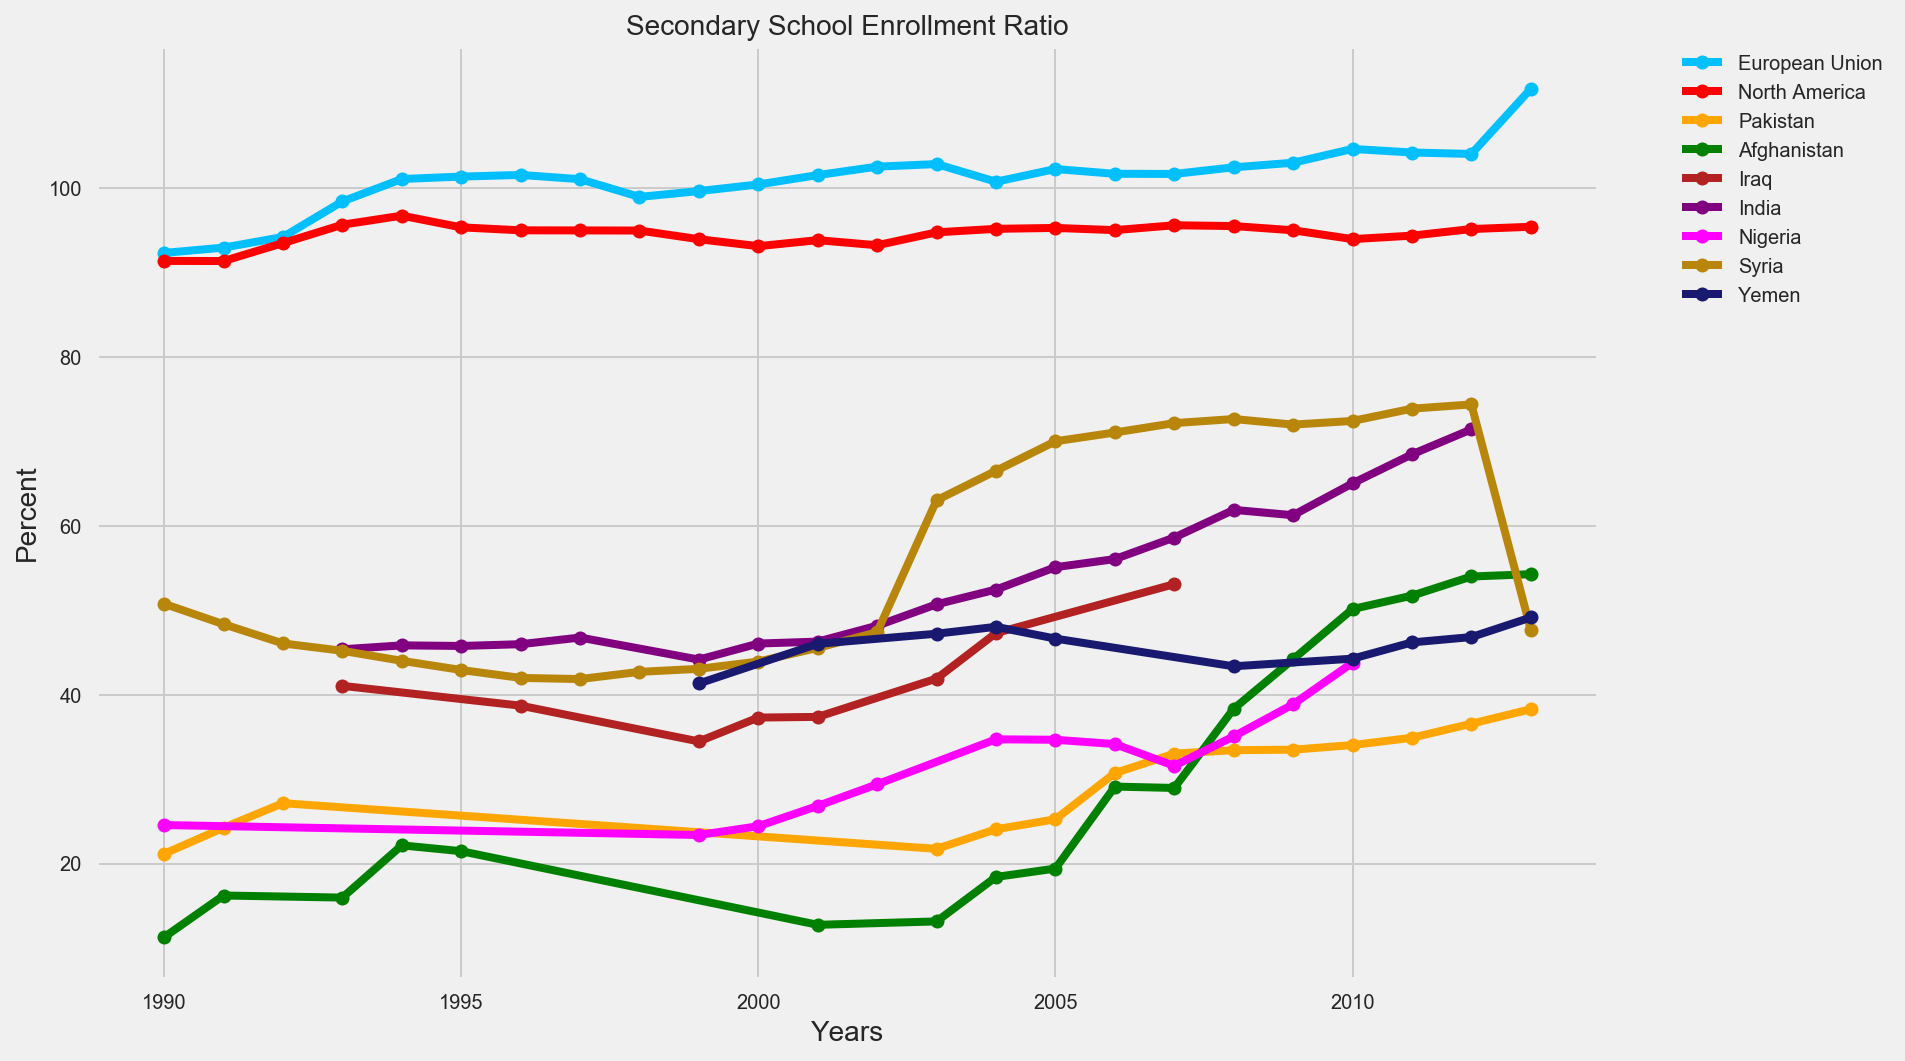

In [27]:

fig = plt.figure(figsize=(12,8))
#
plt.style.use('fivethirtyeight')
#
plt.plot(euu_sec.Year,euu_sec.Value,'o-',label='European Union',color='deepskyblue')
plt.plot(nac_sec.Year,nac_sec.Value,'o-',label='North America',color='red')
plt.plot(pak_sec.Year,pak_sec.Value,'o-',label='Pakistan',color='orange')
plt.plot(afg_sec.Year,afg_sec.Value,'o-',label='Afghanistan',color='green')
plt.plot(iraq_sec.Year,iraq_sec.Value,'o-',label='Iraq',color='firebrick')
plt.plot(india_sec.Year,india_sec.Value,'o-',label='India',color='purple')
plt.plot(nigeria_sec.Year,nigeria_sec.Value,'o-',label='Nigeria',color='magenta')
plt.plot(syria_sec.Year,syria_sec.Value, 'o-', label='Syria', color='darkgoldenrod')
plt.plot(yemen_sec.Year,yemen_sec.Value, 'o-', label='Yemen', color='midnightblue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Percent',  fontsize=14)
plt.title('Secondary School Enrollment Ratio', fontsize=14)
fig.savefig('sec_enrr.png')

In [32]:
euu_prm = euu[euu.IndicatorCode == 'SE.PRM.ENRR']
nac_prm = nac[nac.IndicatorCode == 'SE.PRM.ENRR']
pak_prm = pak[pak.IndicatorCode == 'SE.PRM.ENRR']
afg_prm = afg[afg.IndicatorCode == 'SE.PRM.ENRR']
iraq_prm = iraq[iraq.IndicatorCode == 'SE.PRM.ENRR']
india_prm = india[india.IndicatorCode == 'SE.PRM.ENRR']
nigeria_prm = nigeria[nigeria.IndicatorCode == 'SE.PRM.ENRR']
syria_prm = syria[syria.IndicatorCode == 'SE.PRM.ENRR']
yemen_prm = yemen[yemen.IndicatorCode == 'SE.PRM.ENRR']

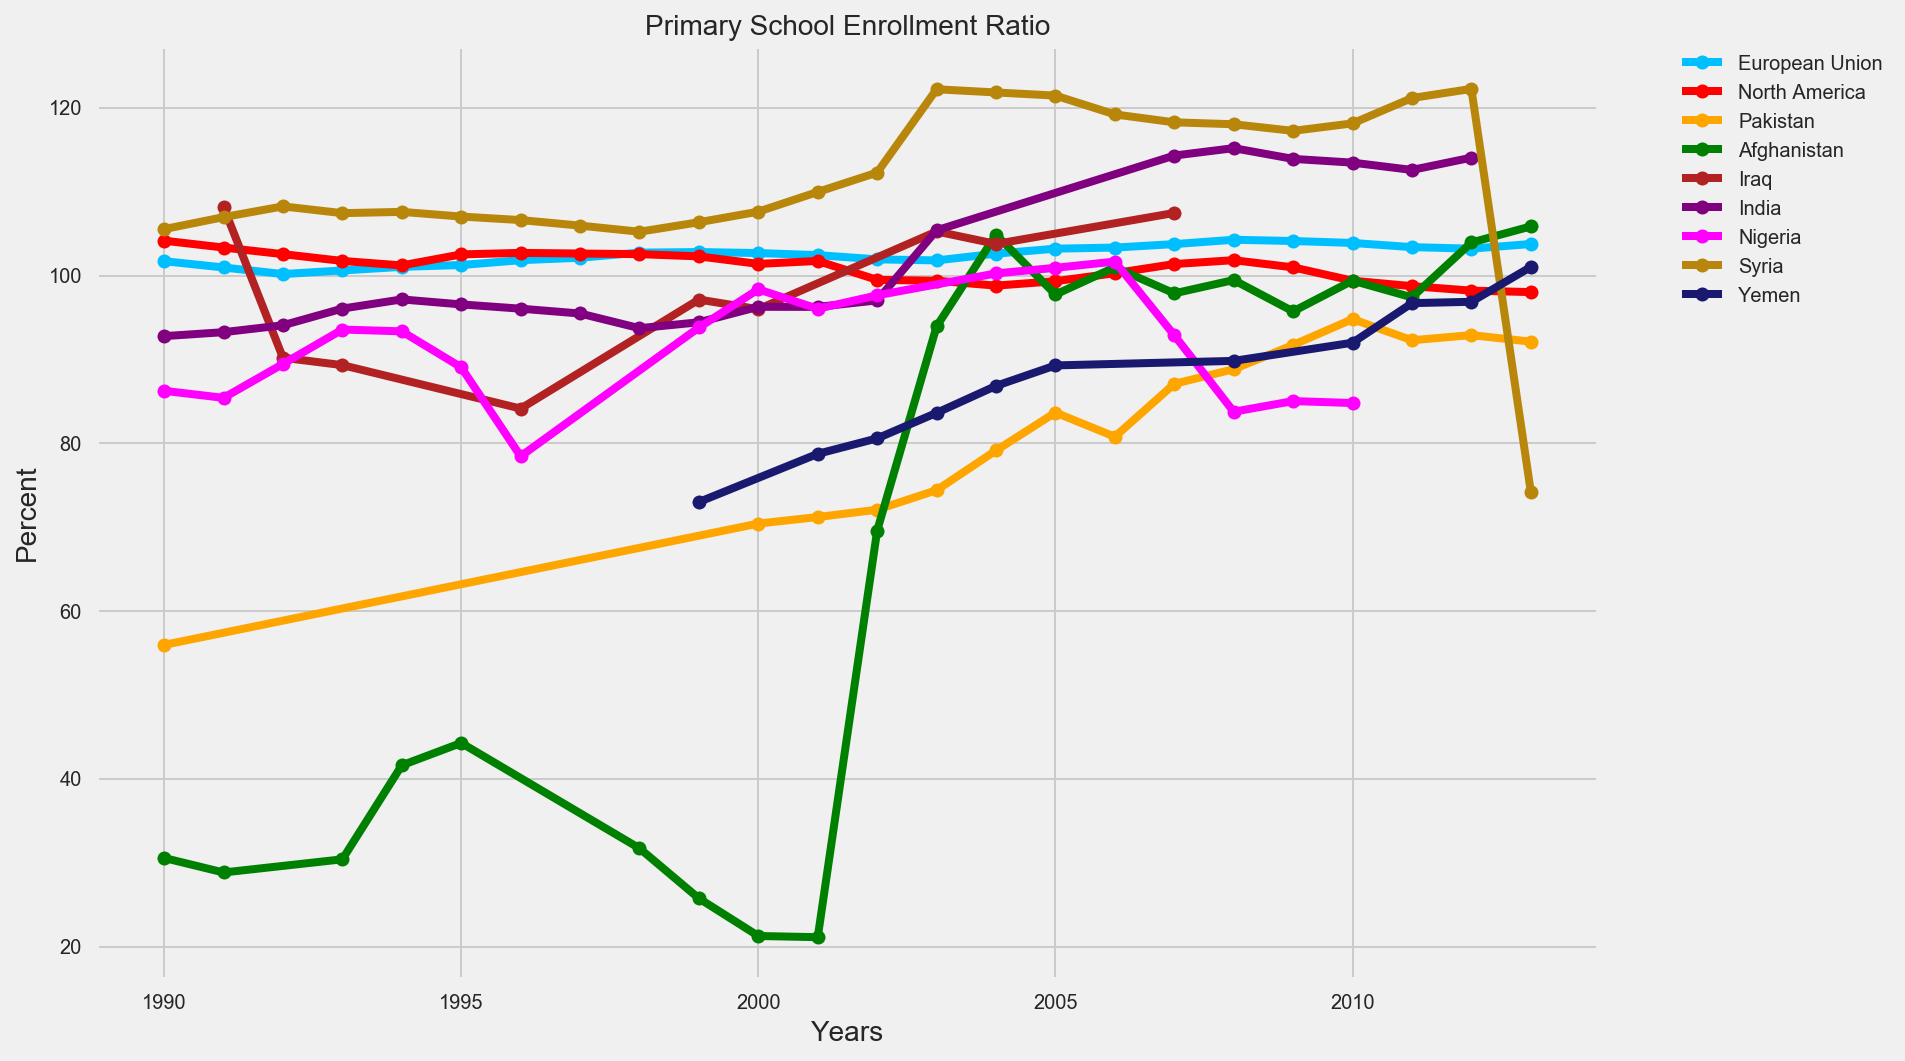

In [33]:
fig = plt.figure(figsize=(12,8))
#
plt.style.use('fivethirtyeight')
#
plt.plot(euu_prm.Year,euu_prm.Value,'o-',label='European Union',color='deepskyblue')
plt.plot(nac_prm.Year,nac_prm.Value,'o-',label='North America',color='red')
plt.plot(pak_prm.Year,pak_prm.Value,'o-',label='Pakistan',color='orange')
plt.plot(afg_prm.Year,afg_prm.Value,'o-',label='Afghanistan',color='green')
plt.plot(iraq_prm.Year,iraq_prm.Value,'o-',label='Iraq',color='firebrick')
plt.plot(india_prm.Year,india_prm.Value,'o-',label='India',color='purple')
plt.plot(nigeria_prm.Year,nigeria_prm.Value,'o-',label='Nigeria',color='magenta')
plt.plot(syria_prm.Year,syria_prm.Value, 'o-', label='Syria', color='darkgoldenrod')
plt.plot(yemen_prm.Year,yemen_prm.Value, 'o-', label='Yemen', color='midnightblue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Percent',  fontsize=14)
plt.title('Primary School Enrollment Ratio', fontsize=14)
fig.savefig('prm_enrr.png')

In [34]:
euu_ter = euu[euu.IndicatorCode == 'SE.TER.ENRR']
nac_ter = nac[nac.IndicatorCode == 'SE.TER.ENRR']
pak_ter = pak[pak.IndicatorCode == 'SE.TER.ENRR']
afg_ter = afg[afg.IndicatorCode == 'SE.TER.ENRR']
iraq_ter = iraq[iraq.IndicatorCode == 'SE.TER.ENRR']
india_ter = india[india.IndicatorCode == 'SE.TER.ENRR']
nigeria_ter = nigeria[nigeria.IndicatorCode == 'SE.TER.ENRR']
syria_ter = syria[syria.IndicatorCode == 'SE.TER.ENRR']
yemen_ter = yemen[yemen.IndicatorCode == 'SE.TER.ENRR']

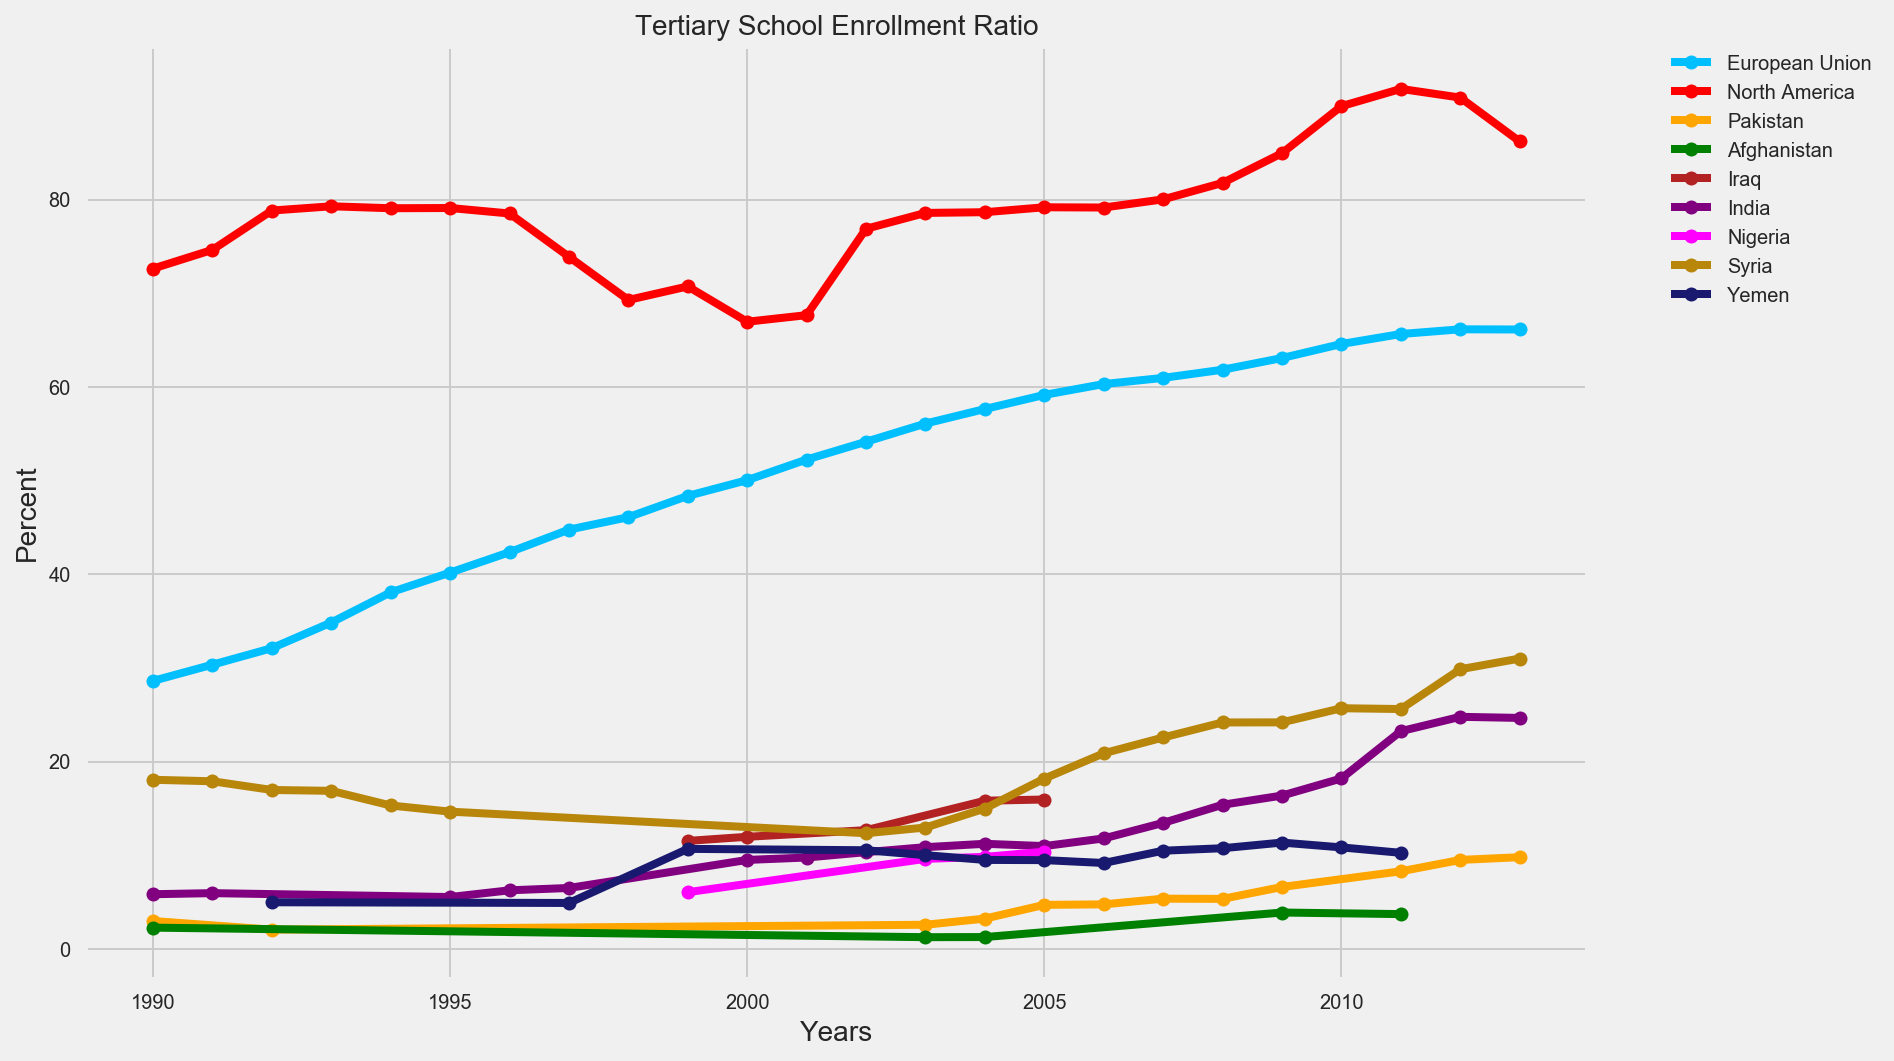

In [36]:
fig = plt.figure(figsize=(12,8))
#
plt.style.use('fivethirtyeight')
#
plt.plot(euu_ter.Year,euu_ter.Value,'o-',label='European Union',color='deepskyblue')
plt.plot(nac_ter.Year,nac_ter.Value,'o-',label='North America',color='red')
plt.plot(pak_ter.Year,pak_ter.Value,'o-',label='Pakistan',color='orange')
plt.plot(afg_ter.Year,afg_ter.Value,'o-',label='Afghanistan',color='green')
plt.plot(iraq_ter.Year,iraq_ter.Value,'o-',label='Iraq',color='firebrick')
plt.plot(india_ter.Year,india_ter.Value,'o-',label='India',color='purple')
plt.plot(nigeria_ter.Year,nigeria_ter.Value,'o-',label='Nigeria',color='magenta')
plt.plot(syria_ter.Year,syria_ter.Value, 'o-', label='Syria', color='darkgoldenrod')
plt.plot(yemen_ter.Year,yemen_ter.Value, 'o-', label='Yemen', color='midnightblue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Percent',  fontsize=14)
plt.title('Tertiary School Enrollment Ratio', fontsize=14)
fig.savefig('ter_enrr.png')

In [104]:
euu_uem_total = euu[euu['IndicatorCode'].str.contains('SL.UEM.TOTL')]
nac_uem_total = nac[nac['IndicatorCode'].str.contains('SL.UEM.TOTL')]
pak_uem_total = pak[pak['IndicatorCode'].str.contains('SL.UEM.TOTL')]
afg_uem_total = afg[afg['IndicatorCode'].str.contains('SL.UEM.TOTL')]
iraq_uem_total = iraq[iraq['IndicatorCode'].str.contains('SL.UEM.TOTL')]
india_uem_total = india[india['IndicatorCode'].str.contains('SL.UEM.TOTL')]
nigeria_uem_total = nigeria[nigeria['IndicatorCode'].str.contains('SL.UEM.TOTL')]
syria_uem_total = syria[syria['IndicatorCode'].str.contains('SL.UEM.TOTL')]
yemen_uem_total = yemen[yemen['IndicatorCode'].str.contains('SL.UEM.TOTL')]

The following cells extract and plot the total unemployment rate.

In [38]:
euu_uem_total = euu[euu.IndicatorCode == 'SL.UEM.TOTL.NE.ZS']
nac_uem_total = nac[nac.IndicatorCode == 'SL.UEM.TOTL.NE.ZS']
pak_uem_total = pak[pak.IndicatorCode == 'SL.UEM.TOTL.NE.ZS']
afg_uem_total = afg[afg.IndicatorCode == 'SL.UEM.TOTL.NE.ZS']
iraq_uem_total = iraq[iraq.IndicatorCode == 'SL.UEM.TOTL.NE.ZS']
india_uem_total = india[india.IndicatorCode == 'SL.UEM.TOTL.NE.ZS']
nigeria_uem_total = nigeria[nigeria.IndicatorCode == 'SL.UEM.TOTL.NE.ZS']
syria_uem_total = syria[syria.IndicatorCode == 'SL.UEM.TOTL.NE.ZS']
yemen_uem_total = yemen[yemen.IndicatorCode == 'SL.UEM.TOTL.NE.ZS']

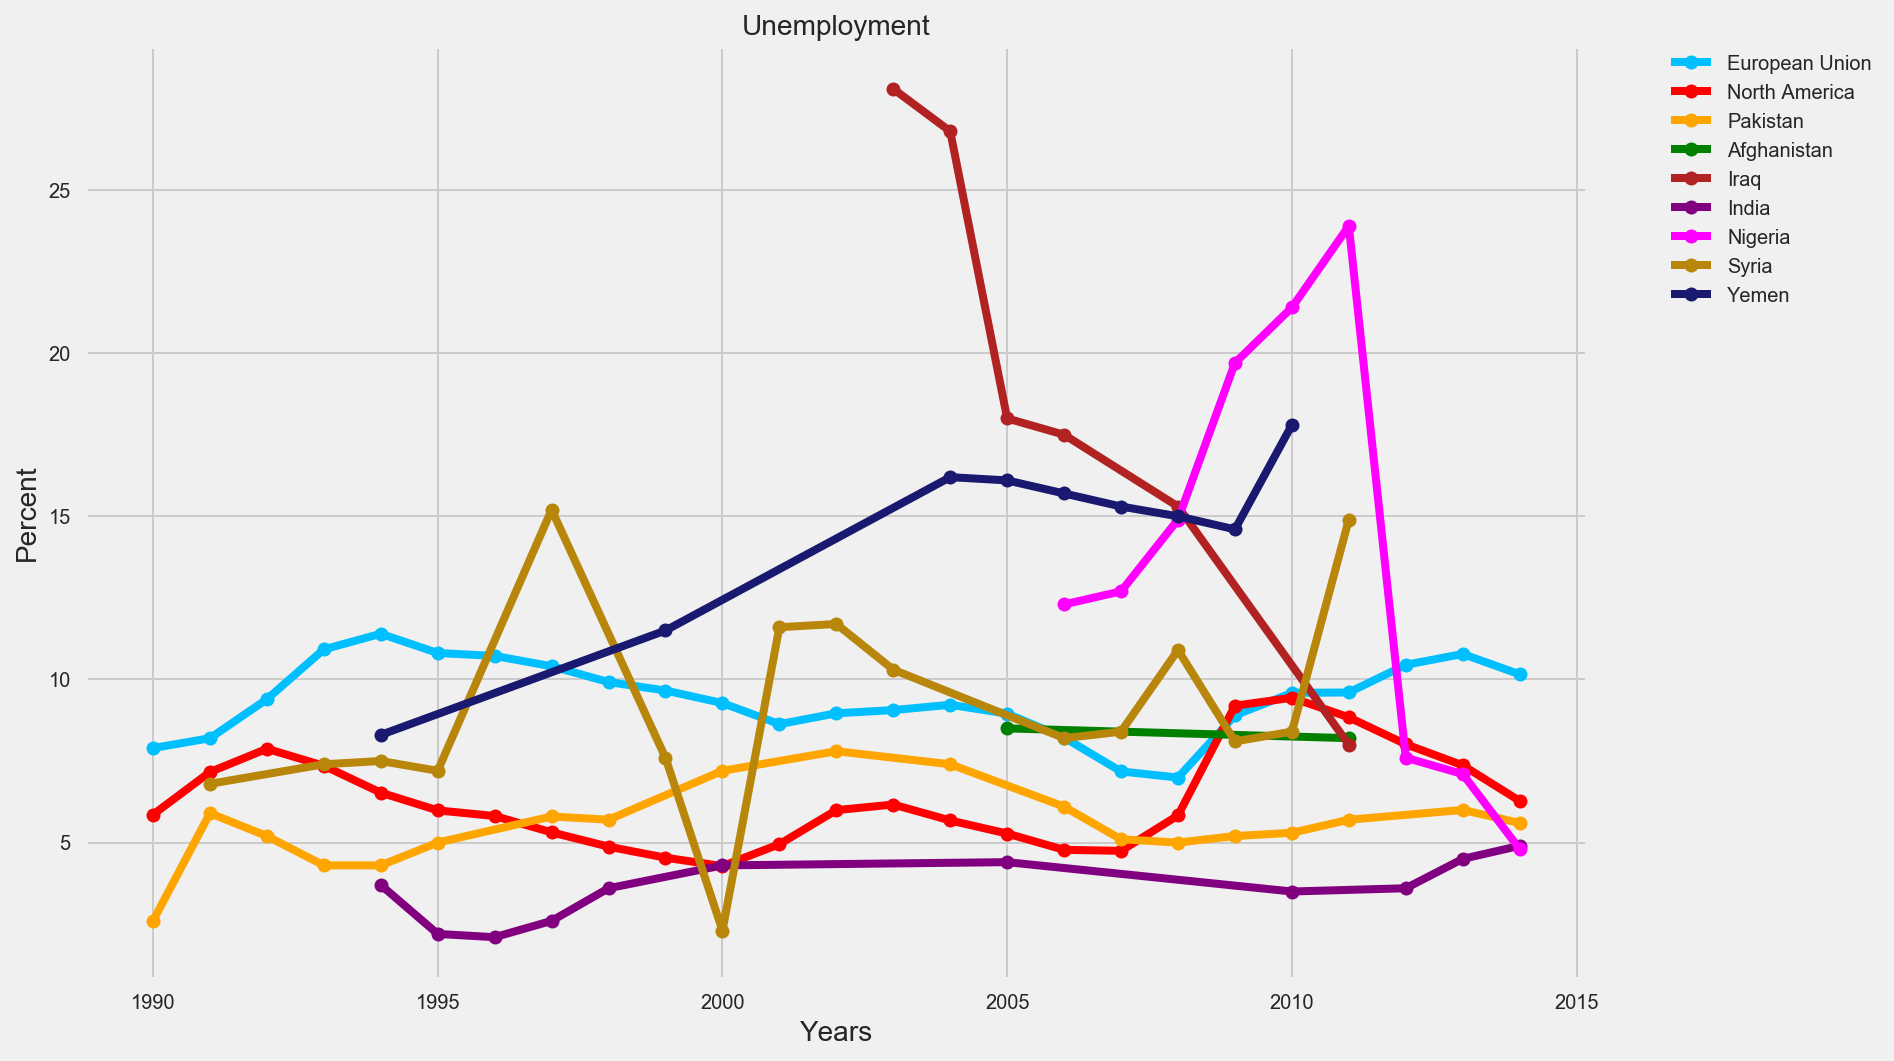

In [39]:
fig = plt.figure(figsize=(12,8))
#
plt.style.use('fivethirtyeight')
#
plt.plot(euu_uem_total.Year,euu_uem_total.Value,'o-',label='European Union',color='deepskyblue')
plt.plot(nac_uem_total.Year,nac_uem_total.Value,'o-',label='North America',color='red')
plt.plot(pak_uem_total.Year,pak_uem_total.Value,'o-',label='Pakistan',color='orange')
plt.plot(afg_uem_total.Year,afg_uem_total.Value,'o-',label='Afghanistan',color='green')
plt.plot(iraq_uem_total.Year,iraq_uem_total.Value,'o-',label='Iraq',color='firebrick')
plt.plot(india_uem_total.Year,india_uem_total.Value,'o-',label='India',color='purple')
plt.plot(nigeria_uem_total.Year,nigeria_uem_total.Value,'o-',label='Nigeria',color='magenta')
plt.plot(syria_uem_total.Year,syria_uem_total.Value, 'o-', label='Syria', color='darkgoldenrod')
plt.plot(yemen_uem_total.Year,yemen_uem_total.Value, 'o-', label='Yemen', color='midnightblue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Percent',  fontsize=14)
plt.title('Unemployment', fontsize=14)
fig.savefig('uem.png')

The following cells extract and plot the GDP per capita (PPP).  Per capita GDP is a measure of the total output of a country that takes gross domestic product (GDP) and divides it by the number of people in the country. The per capita GDP is especially useful when comparing one country to another, because it shows the relative performance of the countries.

In [41]:
euu_GDP_PPP = euu[euu.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
nac_GDP_PPP = nac[nac.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
pak_GDP_PPP = pak[pak.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
afg_GDP_PPP = afg[afg.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
iraq_GDP_PPP = iraq[iraq.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
india_GDP_PPP = india[india.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
nigeria_GDP_PPP = nigeria[nigeria.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
syria_GDP_PPP = syria[syria.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
yemen_GDP_PPP = yemen[yemen.IndicatorCode == 'NY.GDP.PCAP.PP.CD'] 

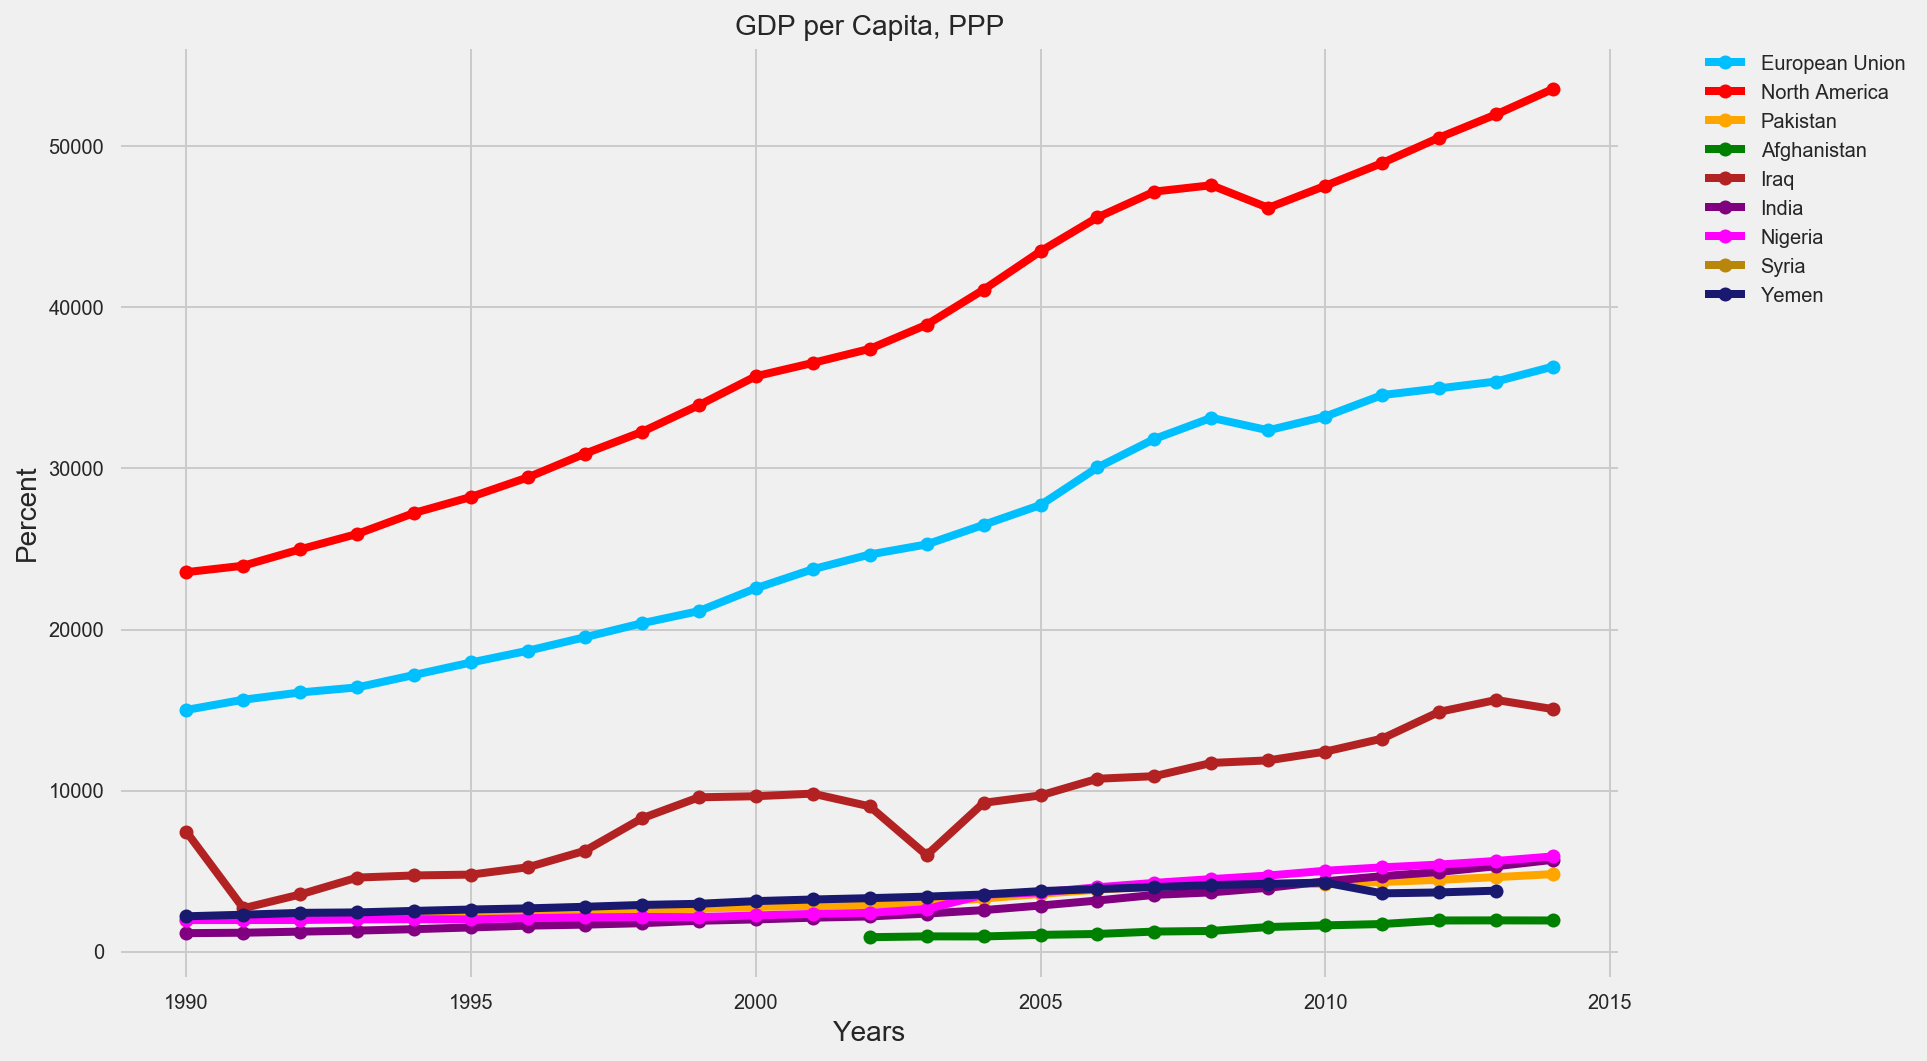

In [42]:
fig = plt.figure(figsize=(12,8))
#
plt.style.use('fivethirtyeight')
#
plt.plot(euu_GDP_PPP.Year,euu_GDP_PPP.Value,'o-',label='European Union',color='deepskyblue')
plt.plot(nac_GDP_PPP.Year,nac_GDP_PPP.Value,'o-',label='North America',color='red')
plt.plot(pak_GDP_PPP.Year,pak_GDP_PPP.Value,'o-',label='Pakistan',color='orange')
plt.plot(afg_GDP_PPP.Year,afg_GDP_PPP.Value,'o-',label='Afghanistan',color='green')
plt.plot(iraq_GDP_PPP.Year,iraq_GDP_PPP.Value,'o-',label='Iraq',color='firebrick')
plt.plot(india_GDP_PPP.Year,india_GDP_PPP.Value,'o-',label='India',color='purple')
plt.plot(nigeria_GDP_PPP.Year,nigeria_GDP_PPP.Value,'o-',label='Nigeria',color='magenta')
plt.plot(syria_GDP_PPP.Year,syria_GDP_PPP.Value, 'o-', label='Syria', color='darkgoldenrod')
plt.plot(yemen_GDP_PPP.Year,yemen_GDP_PPP.Value, 'o-', label='Yemen', color='midnightblue')
# plt.plot(pak_uem_totl.Year,pak_uem_totl.Value,'o-',label='% of Total Labor Force',color='steelblue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Percent',  fontsize=14)
plt.title('GDP per Capita, PPP', fontsize=14)
fig.savefig('gdp.png')

The following several cells imports the Human Development Index (HDI) data extracted from the UN Development Programme website.

In [43]:
new_cols = ['HDI_rank', 'Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', 
            '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
            '2015']


In [44]:
HDI = pd.read_csv('../Human Development Index/Human Development Index (HDI).csv', header=0, names = new_cols, skiprows=1)

In [45]:
gti_hdi = ['Afghanistan', 'Iraq', 'Pakistan', 'India', 'Syrian Arab Republic', 'Nigeria', 'Yemen']

In [46]:
eda(HDI)

missing values 
HDI_rank     0
Country      0
1990        44
1991        44
1992        44
1993        44
1994        44
1995        40
1996        40
1997        40
1998        40
1999        37
2000        20
2001        20
2002        20
2003        18
2004        15
2005         6
2006         6
2007         6
2008         6
2009         6
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=188, step=1)
dataframe types 
HDI_rank      int64
Country      object
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64

Further extraction and cleaning of the HDI for the countries of interest.

In [50]:
hdi = HDI[(HDI['Country'].str.contains('Afghanistan')) | (HDI['Country'].str.contains('India')) |
                    (HDI['Country'].str.contains('Iraq')) | (HDI['Country'].str.contains('Nigeria')) |
                    (HDI['Country'].str.contains('Yemen')) | (HDI['Country'].str.contains('Syria')) |
                    (HDI['Country'].str.contains('Pakistan'))]

In [51]:
eda(hdi)

missing values 
HDI_rank    0
Country     0
1990        1
1991        1
1992        1
1993        1
1994        1
1995        1
1996        1
1997        1
1998        1
1999        1
2000        1
2001        1
2002        1
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
dtype: int64
dataframe index 
Int64Index([0, 76, 79, 123, 126, 163, 185], dtype='int64')
dataframe types 
HDI_rank      int64
Country      object
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012  

In [52]:
hdi.head()

HDI_rank       Country   1990   1991   1992   1993   1994   1995   1996  \
0         169   Afghanistan  0.295  0.300  0.309  0.305  0.300  0.324  0.328   
76        131         India  0.428  0.432  0.439  0.445  0.453  0.460  0.468   
79        121          Iraq  0.572  0.527  0.541  0.561  0.561  0.553  0.572   
123       152       Nigeria    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
126       147      Pakistan  0.404  0.409  0.415  0.418  0.423  0.429  0.433   

      1997   1998   1999   2000   2001   2002   2003   2004   2005   2006  \
0    0.332  0.335  0.338  0.340  0.341  0.373  0.381  0.396  0.405  0.415   
76   0.474  0.481  0.489  0.494  0.499  0.505  0.518  0.526  0.536  0.546   
79   0.582  0.596  0.603  0.607  0.614  0.616  0.603  0.628  0.631  0.636   
123    NaN    NaN    NaN    NaN    NaN    NaN  0.445  0.463  0.466  0.477   
126  0.437  0.441  0.445  0.450  0.457  0.465  0.474  0.487  0.501  0.505   

      2007   2008   2009   2010   2011   2012   2013   2014   2015  
0    0.433  0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479  
76   0.556  0.563  0.569  0.580  0.590  0.599  0.607  0.615  0.624  
79   0.638  0.643  0.646  0.649  0.656  0.659  0.658  0.649  0.649  
123  0.481  0.487  0.492  0.500  0.507  0.514  0.521  0.525  0.527  
126  0.513  0.514  0.521  0.525  0.529  0.538  0.542  0.548  0.550

In [53]:
hdi = hdi.iloc[:, 1:].transpose()


In [54]:
hdi.columns = hdi.iloc[0]

In [55]:
hdi = hdi[1:]

In [56]:
hdi.index.rename('Year', inplace=True)

In [59]:
hdi.head(26)

Country  Afghanistan  India   Iraq  Nigeria  Pakistan  Syrian Arab Republic  \
Year                                                                          
1990           0.295  0.428  0.572      NaN     0.404                 0.556   
1991             0.3  0.432  0.527      NaN     0.409                  0.56   
1992           0.309  0.439  0.541      NaN     0.415                 0.566   
1993           0.305  0.445  0.561      NaN     0.418                 0.569   
1994             0.3  0.453  0.561      NaN     0.423                 0.574   
1995           0.324   0.46  0.553      NaN     0.429                 0.577   
1996           0.328  0.468  0.572      NaN     0.433                 0.581   
1997           0.332  0.474  0.582      NaN     0.437                 0.586   
1998           0.335  0.481  0.596      NaN     0.441                 0.589   
1999           0.338  0.489  0.603      NaN     0.445                 0.588   
2000            0.34  0.494  0.607      NaN      0.45                 0.589   
2001           0.341  0.499  0.614      NaN     0.457                 0.596   
2002           0.373  0.505  0.616      NaN     0.465                 0.599   
2003           0.381  0.518  0.603    0.445     0.474                  0.61   
2004           0.396  0.526  0.628    0.463     0.487                 0.624   
2005           0.405  0.536  0.631    0.466     0.501                 0.636   
2006           0.415  0.546  0.636    0.477     0.505                 0.644   
2007           0.433  0.556  0.638    0.481     0.513                 0.651   
2008           0.434  0.563  0.643    0.487     0.514                 0.648   
2009           0.448  0.569  0.646    0.492     0.521                  0.65   
2010           0.454   0.58  0.649      0.5     0.525                 0.646   
2011           0.463   0.59  0.656    0.507     0.529                 0.645   
2012            0.47  0.599  0.659    0.514     0.538                 0.635   
2013           0.476  0.607  0.658    0.521     0.542                 0.575   
2014           0.479  0.615  0.649    0.525     0.548                 0.553   
2015           0.479  0.624  0.649    0.527      0.55                 0.536   

Country  Yemen  
Year            
1990     0.405  
1991     0.408  
1992     0.412  
1993     0.414  
1994     0.418  
1995     0.421  
1996     0.424  
1997     0.428  
1998     0.432  
1999     0.436  
2000     0.444  
2001      0.45  
2002     0.457  
2003     0.464  
2004      0.47  
2005     0.475  
2006     0.477  
2007      0.48  
2008     0.483  
2009     0.488  
2010     0.493  
2011     0.494  
2012     0.498  
2013       0.5  
2014     0.499  
2015     0.482

In [60]:
hdi.columns

Index([u' Afghanistan', u' India', u' Iraq', u' Nigeria', u' Pakistan',
       u' Syrian Arab Republic', u' Yemen'],
      dtype='object', name=u'Country')

In [61]:
new_cols = ['Afghanistan', 'India', 'Iraq', 'Nigeria', 'Pakistan', 'Syria', 'Yemen']

In [62]:
hdi.columns = new_cols

In [63]:
hdi.columns

Index([u'Afghanistan', u'India', u'Iraq', u'Nigeria', u'Pakistan', u'Syria',
       u'Yemen'],
      dtype='object')

In [64]:
hdi.head()

Afghanistan  India   Iraq Nigeria Pakistan  Syria  Yemen
Year                                                         
1990       0.295  0.428  0.572     NaN    0.404  0.556  0.405
1991         0.3  0.432  0.527     NaN    0.409   0.56  0.408
1992       0.309  0.439  0.541     NaN    0.415  0.566  0.412
1993       0.305  0.445  0.561     NaN    0.418  0.569  0.414
1994         0.3  0.453  0.561     NaN    0.423  0.574  0.418

The following several cells extract and clean the HDI data for each of the countries included in this analysis.

In [76]:
AFG_HDI = pd.DataFrame(hdi['Afghanistan'])
IRAQ_HDI = pd.DataFrame(hdi['Iraq'])
NIG_HDI = pd.DataFrame(hdi['Nigeria'])
IND_HDI = pd.DataFrame(hdi['India'])
SYR_HDI = pd.DataFrame(hdi['Syria'])
YEM_HDI = pd.DataFrame(hdi['Yemen'])
PAK_HDI = pd.DataFrame(hdi['Pakistan'])

In [77]:
AFG_HDI.rename(columns = {'Afghanistan':'HDI'}, inplace=True)
IRAQ_HDI.rename(columns = {'Iraq': 'HDI'}, inplace=True)
NIG_HDI.rename(columns = {'Nigeria': 'HDI'}, inplace=True)
IND_HDI.rename(columns = {'India':'HDI'}, inplace=True)
SYR_HDI.rename(columns = {'Syria': 'HDI'}, inplace=True)
YEM_HDI.rename(columns = {'Yemen' : 'HDI'}, inplace=True)
PAK_HDI.rename(columns = {'Pakistan': 'HDI'}, inplace=True)



In [78]:
AFG_HDI.columns

Index([u'HDI'], dtype='object')

In [79]:
PAK_HDI['HDI'] = PAK_HDI.HDI.astype('float')
YEM_HDI['HDI'] = YEM_HDI.HDI.astype('float')
IND_HDI['HDI'] = IND_HDI.HDI.astype('float')
SYR_HDI['HDI'] = SYR_HDI.HDI.astype('float')
NIG_HDI['HDI'] = NIG_HDI.HDI.astype('float')
IRAQ_HDI['HDI'] = IRAQ_HDI.HDI.astype('float')
AFG_HDI['HDI'] = AFG_HDI.HDI.astype('float')

In [69]:
AFG_HDI.dtypes

HDI    float64
dtype: object

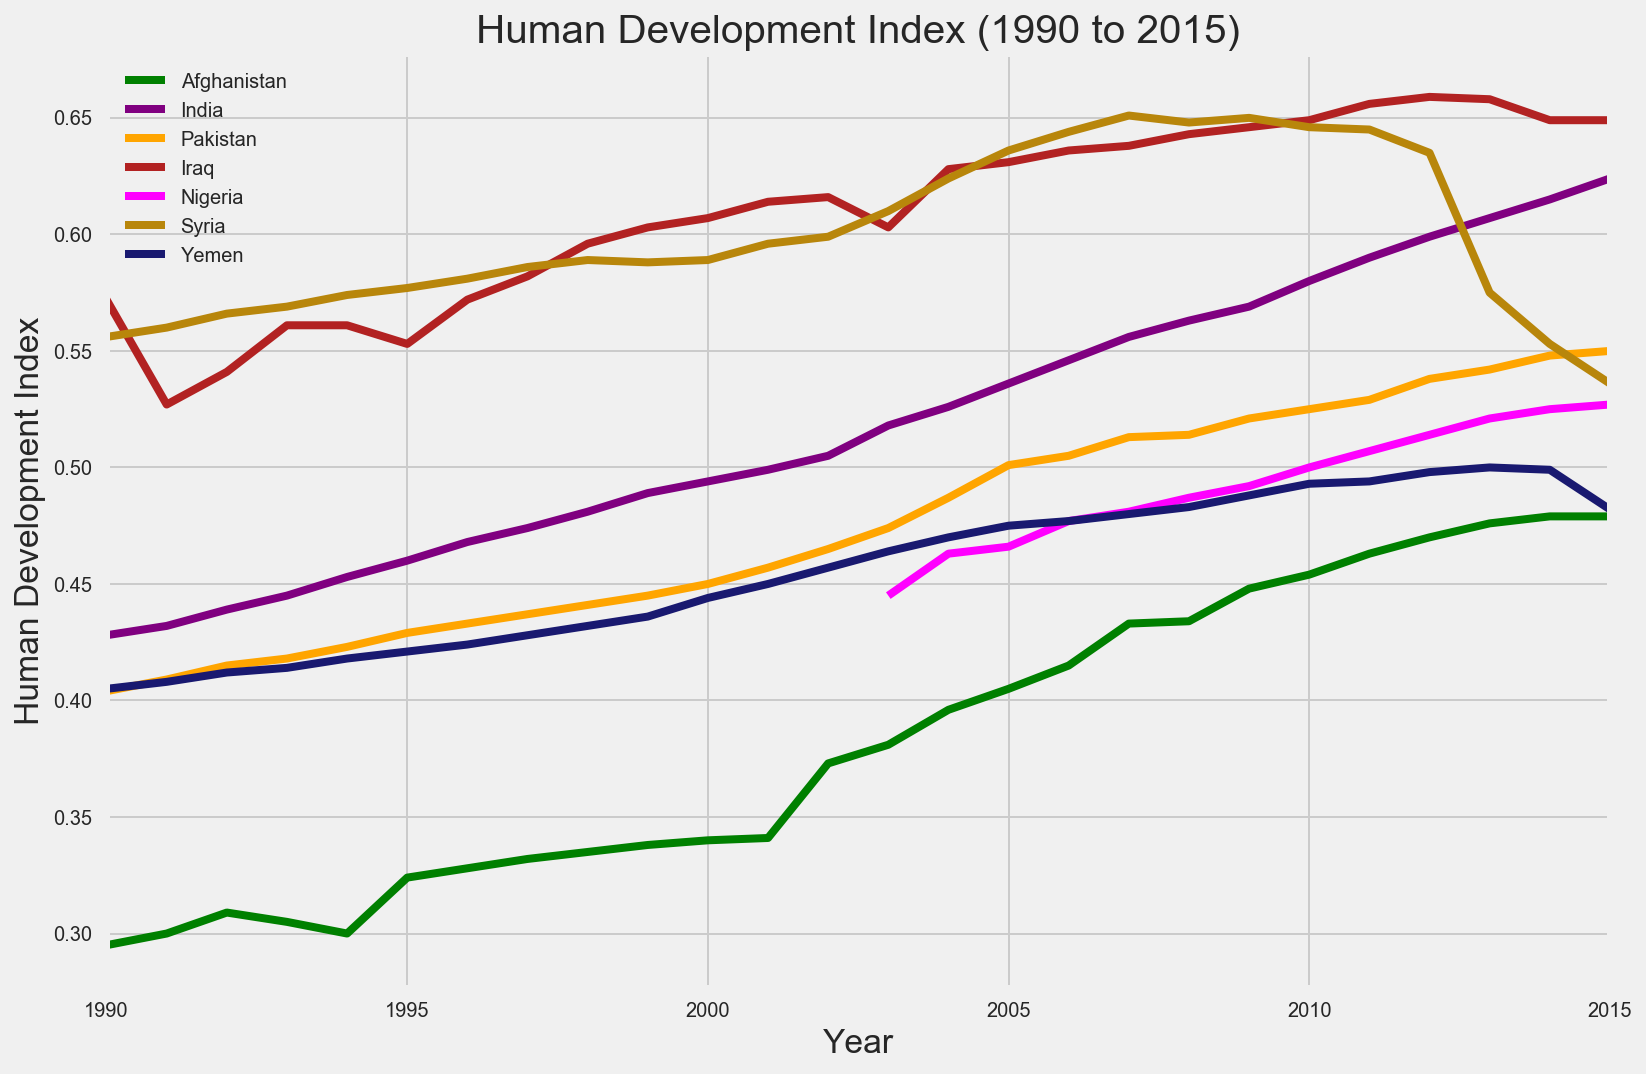

In [80]:
ax = plt.figure(figsize=(12,8))
ax.add_subplot(1,1,1)
plt.style.use('fivethirtyeight')
ax1=sns.tsplot(AFG_HDI['HDI'],time=AFG_HDI.index, color='green', condition = 'Afghanistan',
              value='Human Development Index')
ax2=sns.tsplot(IND_HDI['HDI'],time=IND_HDI.index, color='purple',condition = 'India',
               value='Human Development Index')

ax3=sns.tsplot(PAK_HDI['HDI'],time=PAK_HDI.index, color='orange',condition= 'Pakistan',
               value='Human Development Index')
ax4=sns.tsplot(IRAQ_HDI['HDI'],time=IRAQ_HDI.index, color='firebrick',condition= 'Iraq', value='Human Development Index')
ax5=sns.tsplot(NIG_HDI['HDI'],time=NIG_HDI.index, color='magenta',condition= 'Nigeria', value='Human Development Index')
ax6=sns.tsplot(SYR_HDI['HDI'],time=SYR_HDI.index, color='darkgoldenrod',condition= 'Syria', value='Human Development Index')
ax7=sns.tsplot(YEM_HDI['HDI'],time=YEM_HDI.index, color='midnightblue',condition= 'Yemen', value='Human Development Index')

plt.xlim(1990, 2015)
x_vals = [1990, 1995, 2000, 2005, 2010, 2015]
plt.xticks(x_vals)
plt.xlabel('Year')
plt.ylabel('Human Development Index')
plt.title('Human Development Index (1990 to 2015)')
plt.savefig('hdi.png')

# Bayes Inference on HDI for Syria, Iraq, and Afghanistan

Estalbish the prior for the mean and standard deviation.  These priors will apply to all three models.

In [240]:
mean_prior_mean = hdi.stack().mean()
mean_prior_std = hdi.stack().std()

## Syria

In [241]:
SYR_HDI.reset_index(inplace=True)

In [242]:
SYR_HDI = SYR_HDI[['Year', 'HDI']]

In [243]:
SYR_HDI.head()

Year    HDI
0  1990  0.556
1  1991  0.560
2  1992  0.566
3  1993  0.569
4  1994  0.574

In [244]:
SYR_HDI.dtypes

Year     object
HDI     float64
dtype: object

Define the two populations to be studied.  In the case of Syria, the Civil War began in 2011. The first population is 1990 through 2011 and the second population is from 2012 through 2015.

In [245]:
SYR2011 = SYR_HDI[SYR_HDI.Year <= '2011'].HDI.values
SYR2012 = SYR_HDI[SYR_HDI.Year >= '2012'].HDI.values

In [246]:
print SYR2011

[ 0.556  0.56   0.566  0.569  0.574  0.577  0.581  0.586  0.589  0.588
  0.589  0.596  0.599  0.61   0.624  0.636  0.644  0.651  0.648  0.65
  0.646  0.645]


In [247]:
SYR2012

array([ 0.635,  0.575,  0.553,  0.536])

In [248]:
with pm.Model() as model:

    syr2011_mean = pm.Normal('SYR_2011_mean', mean_prior_mean, sd=mean_prior_std)
    syr2012_mean = pm.Normal('SYR_2012_mean', mean_prior_mean, sd=mean_prior_std)

In [249]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    syr2011_std = pm.Uniform('SYR_2011_std', lower=std_prior_lower, upper=std_prior_upper)
    syr2012_std = pm.Uniform('SYR_2012_std', lower=std_prior_lower, upper=std_prior_upper)

In [250]:
with model:

    syr2011 = pm.Normal('SYR_2011', mu=syr2011_mean, sd=syr2011_std, observed=SYR2011)
    syr2012 = pm.Normal('SYR_2012', mu=syr2012_mean, sd=syr2012_std, observed=SYR2012)

In [251]:
with model:

    diff_of_means = pm.Deterministic('difference of means', syr2011_mean - syr2012_mean)
    diff_of_stds = pm.Deterministic('difference of stds', syr2011_std - syr2012_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((syr2011_std**2 + syr2012_std**2) / 2))


In [252]:
t0 = time.time()
with model:
    trace = pm.sample(250, njobs=1)
t1 = time.time()

print t1 - t0

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 69.067:   5%|▍         | 9968/200000 [00:00<00:16, 11252.37it/s]
Convergence archived at 10300
Interrupted at 10,300 [5%]: Average Loss = 109.81
100%|██████████| 750/750 [00:01<00:00, 415.12it/s]


10.1063320637


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d8ede90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13de08a90>]], dtype=object)

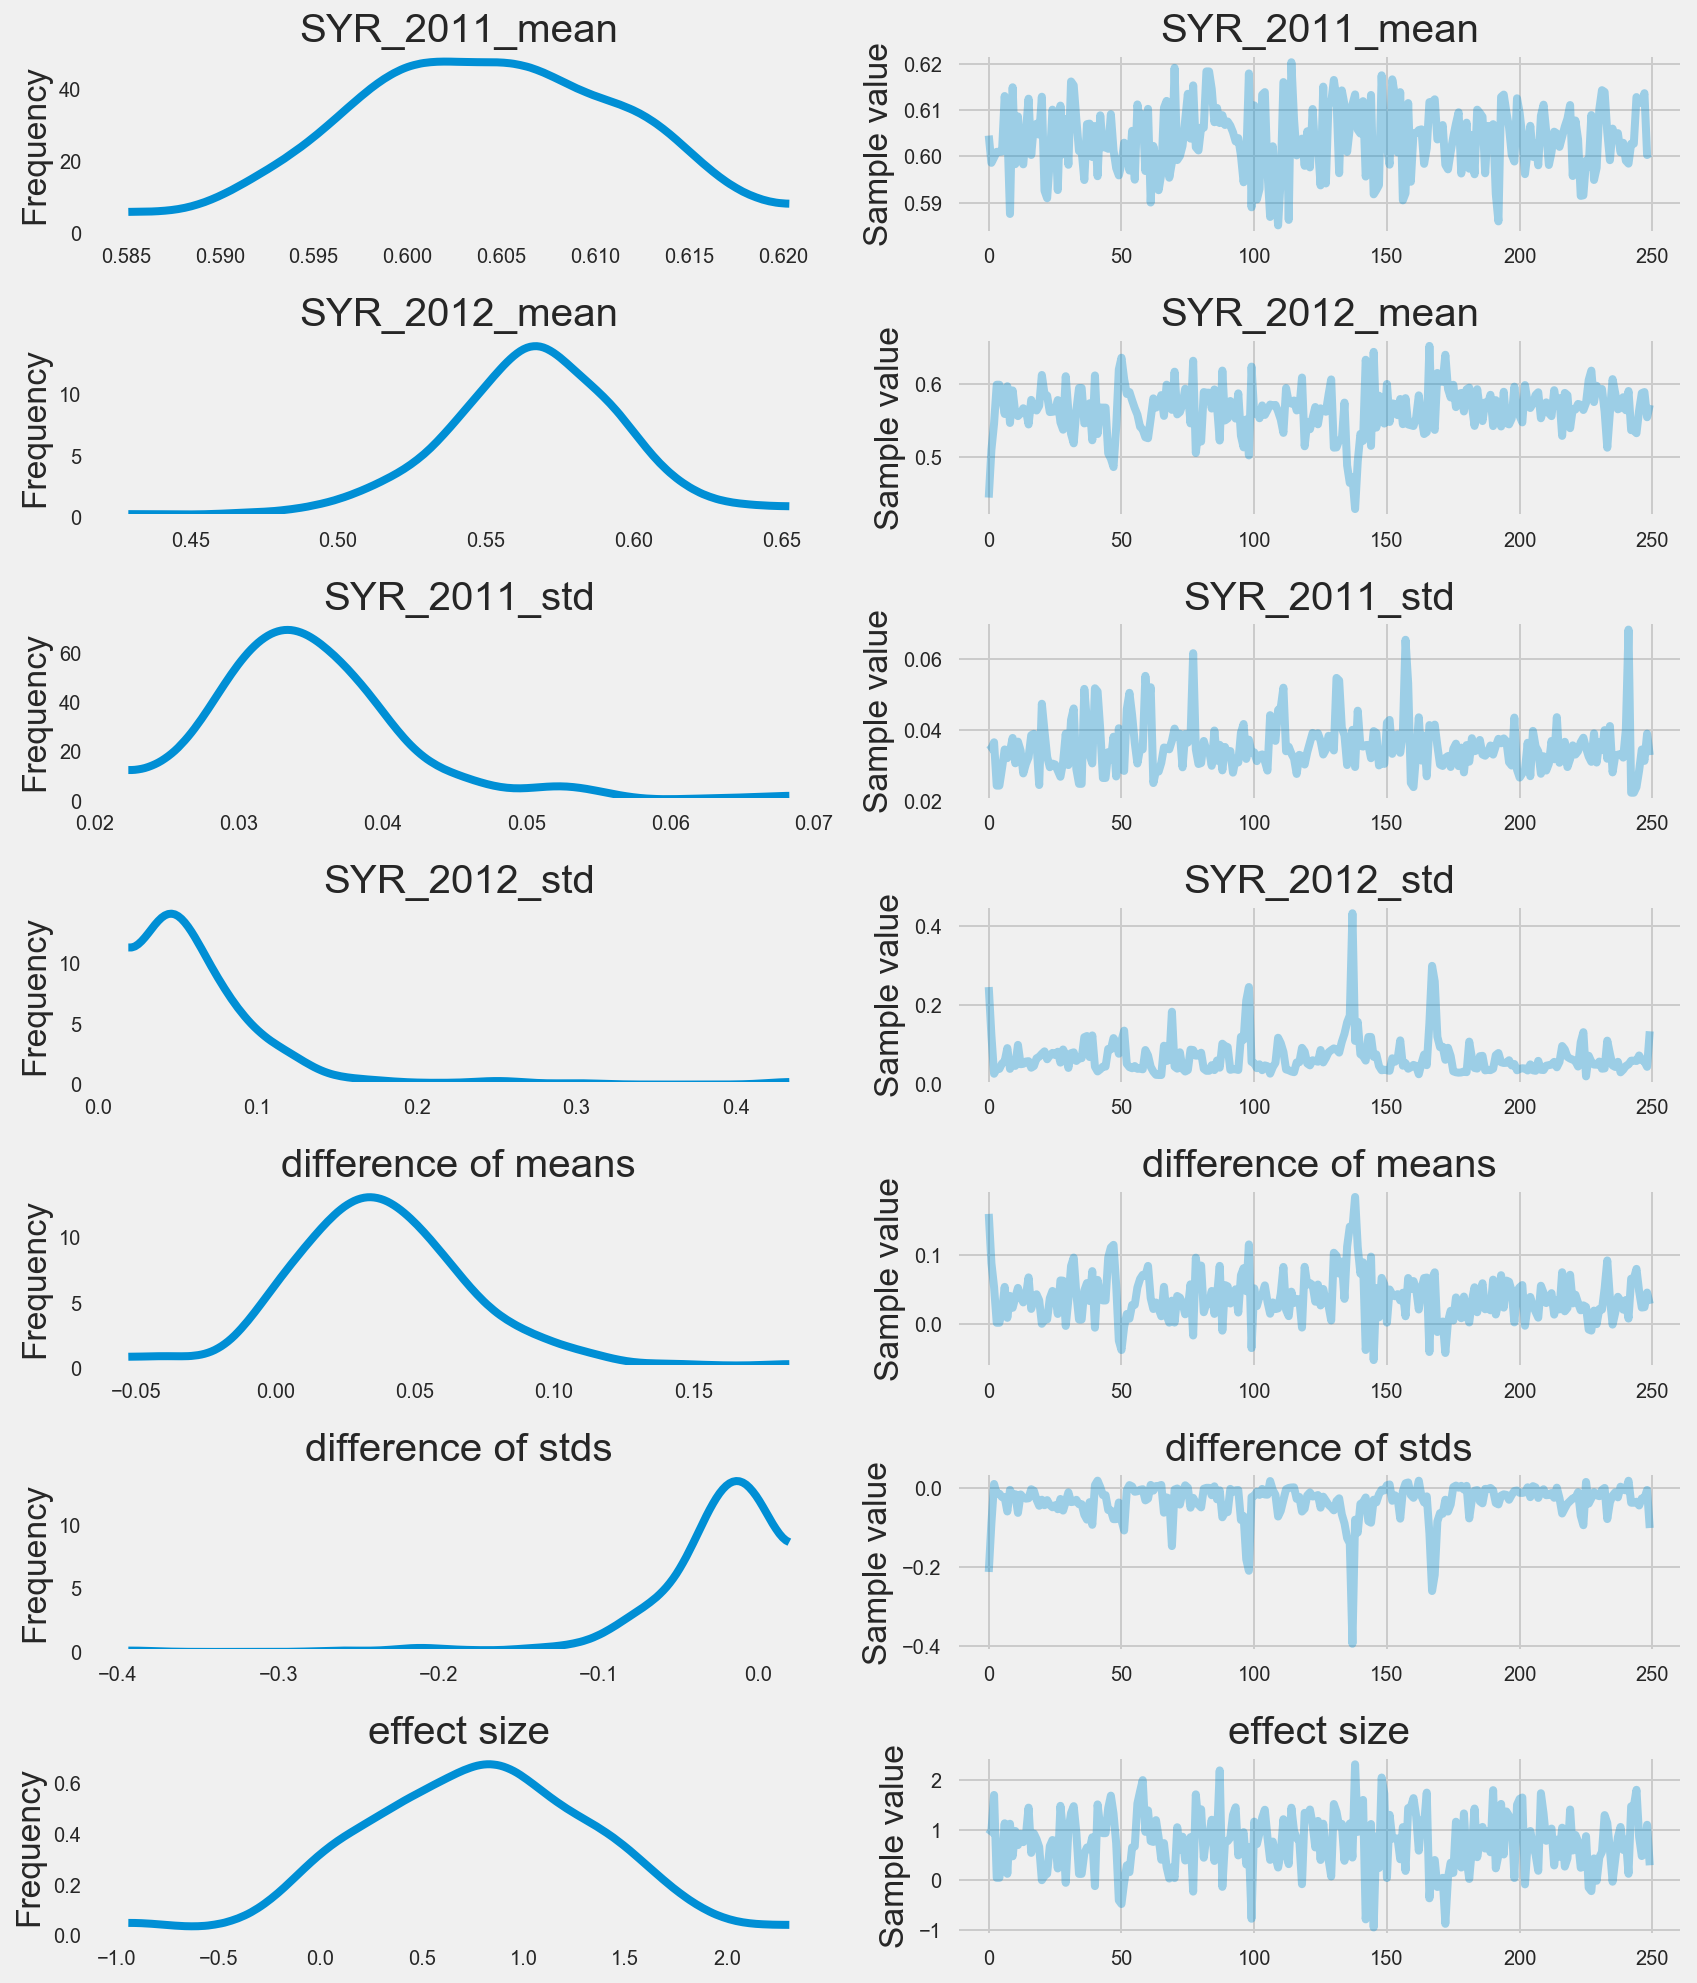

In [253]:
pm.traceplot(trace)

In [254]:
t0 = time.time()

with model:
    trace = pm.sample(25000, njobs=4)
    
t1 = time.time()

print t1 - t0

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 68.693:   5%|▌         | 10021/200000 [00:00<00:16, 11286.20it/s]
Convergence archived at 10300
Interrupted at 10,300 [5%]: Average Loss = 109.81
100%|██████████| 25500/25500 [02:47<00:00, 151.89it/s]


182.439429045


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f667610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13007e690>]], dtype=object)

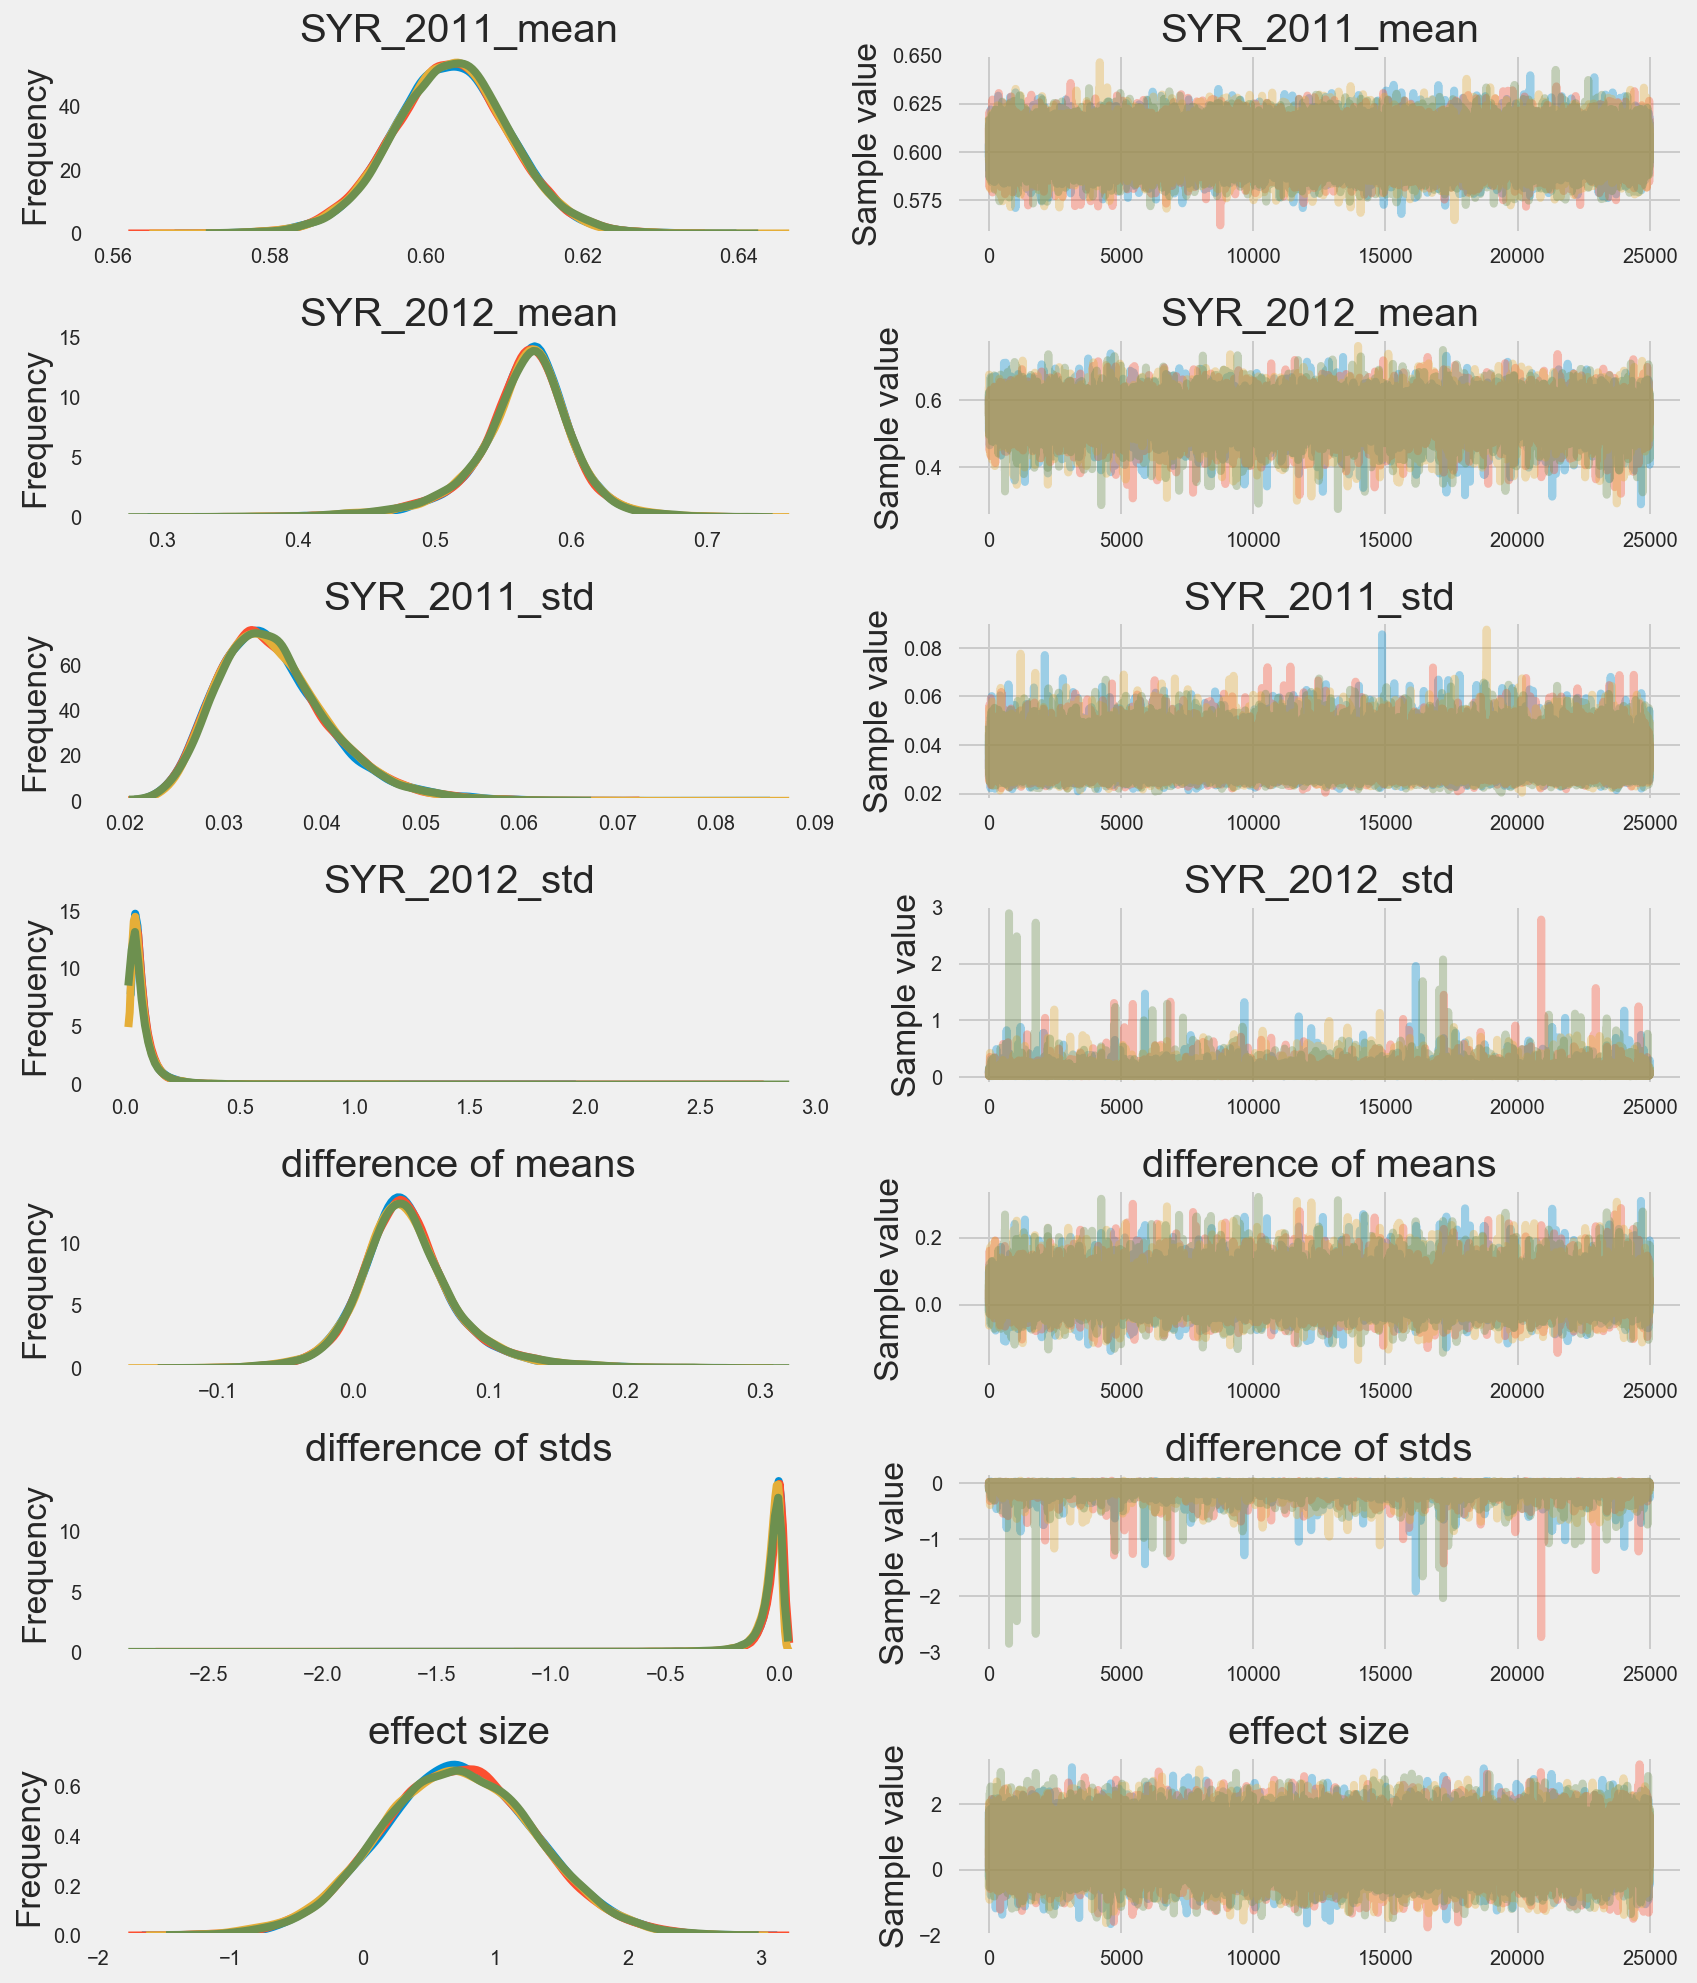

In [255]:
pm.traceplot(trace)

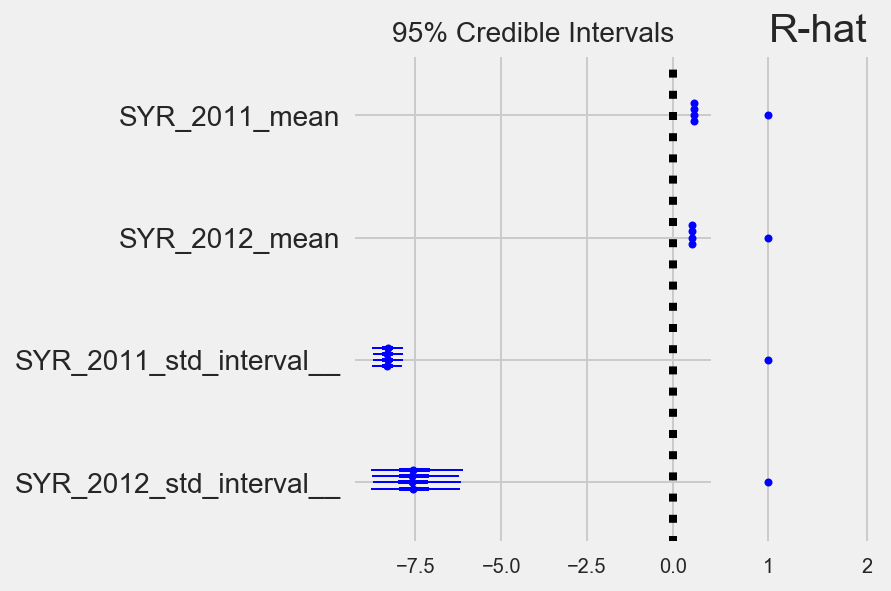

In [256]:
pm.forestplot(trace[3000:], varnames=[v.name for v in model.vars])

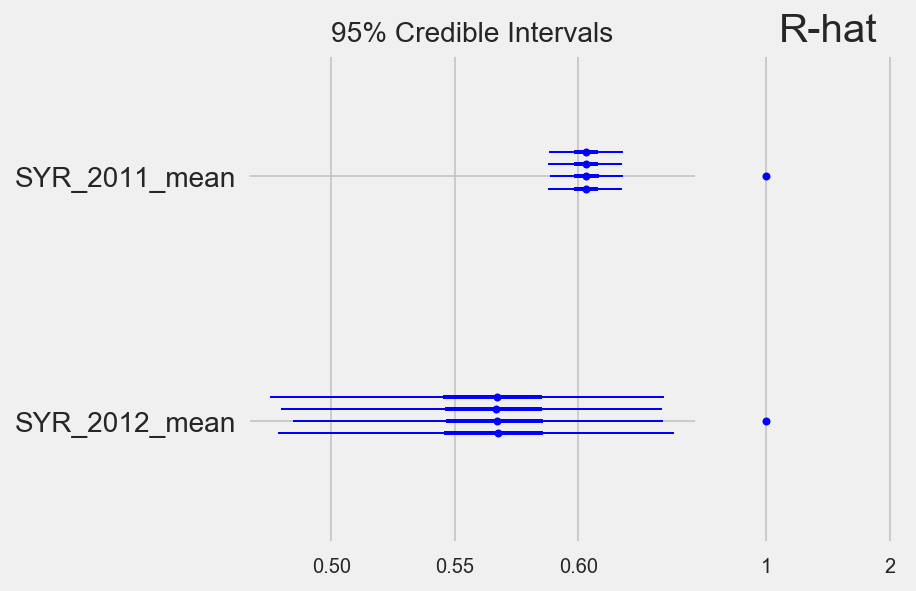

In [257]:
pm.forestplot(trace[3000:], varnames=[v.name for v in model.vars[:2]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13c8a2d50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x141fae290>], dtype=object)

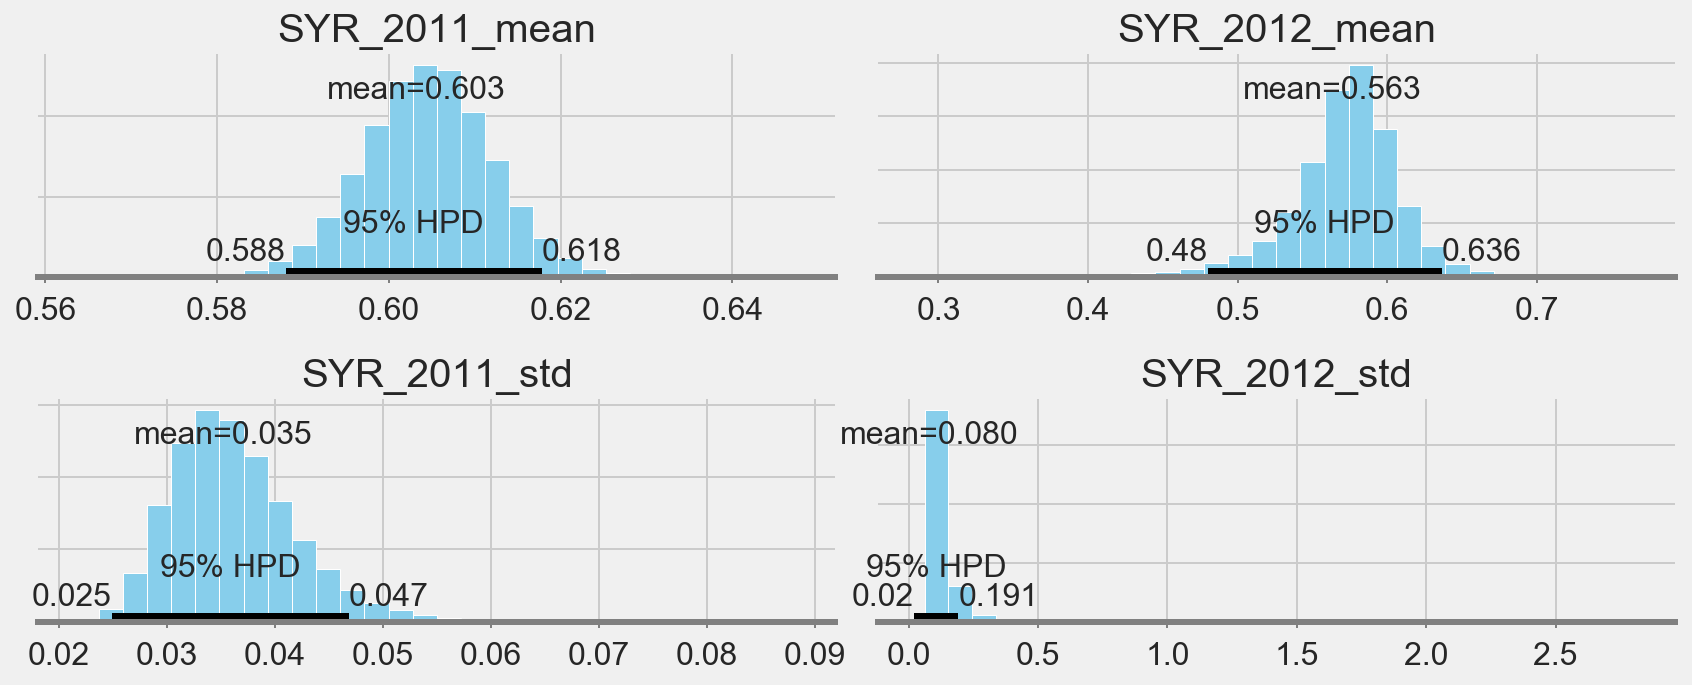

In [258]:
pm.plot_posterior(trace[3000:],
                  varnames=['SYR_2011_mean', 'SYR_2012_mean', 'SYR_2011_std', 'SYR_2012_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13d1f6410>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x137944950>], dtype=object)

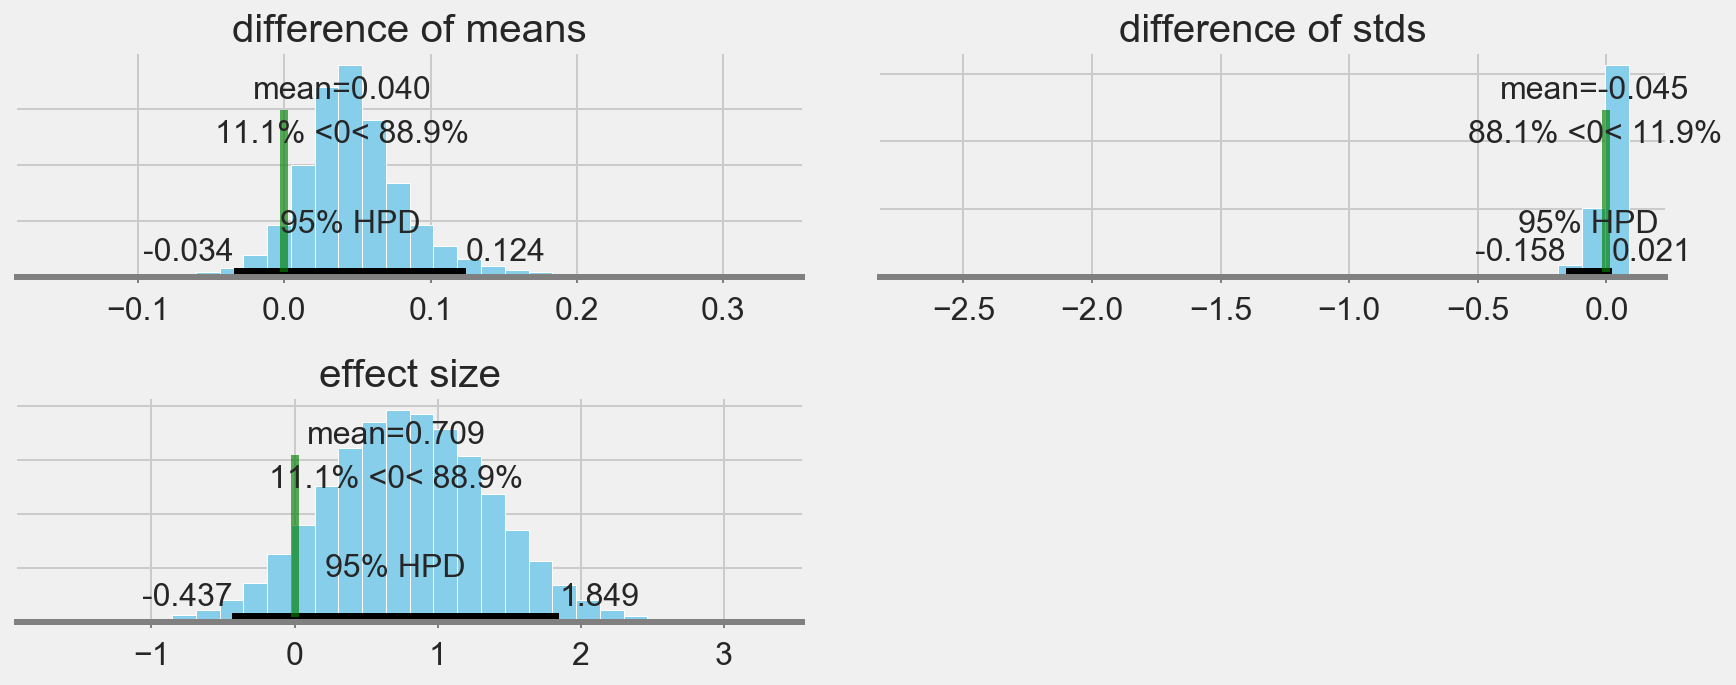

In [259]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

The difference in means and difference in standard deviations overlap so I cannot conclude there is a statistically significant difference in the HDI before and after the start of the Civil War.

## Iraq

In [260]:
IRAQ_HDI.reset_index(inplace=True)

In [261]:
IRAQ_HDI = IRAQ_HDI[['Year', 'HDI']]

In [262]:
IRAQ2003 = IRAQ_HDI[IRAQ_HDI.Year <= '2003'].HDI.values
IRAQ2004 = IRAQ_HDI[IRAQ_HDI.Year >= '2004'].HDI.values

In [263]:
with pm.Model() as model:

    iraq2003_mean = pm.Normal('IRAQ_2003_mean', mean_prior_mean, sd=mean_prior_std)
    iraq2004_mean = pm.Normal('IRAQ_2004_mean', mean_prior_mean, sd=mean_prior_std)

In [264]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    iraq2003_std = pm.Uniform('IRAQ_2003_std', lower=std_prior_lower, upper=std_prior_upper)
    iraq2004_std = pm.Uniform('IRAQ_2004_std', lower=std_prior_lower, upper=std_prior_upper)

In [265]:
with model:

    iraq2003 = pm.Normal('IRAQ_2003', mu=iraq2003_mean, sd=iraq2003_std, observed=IRAQ2003)
    iraq2004 = pm.Normal('IRAQ_2004', mu=iraq2004_mean, sd=iraq2004_std, observed=IRAQ2004)

In [266]:
with model:

    diff_of_means = pm.Deterministic('difference of means', iraq2004_mean - iraq2003_mean)
    diff_of_stds = pm.Deterministic('difference of stds', iraq2004_std - iraq2003_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((iraq2003_std**2 + iraq2004_std**2) / 2))


In [267]:
t0 = time.time()

with model:
    trace = pm.sample(25000, njobs=4)
    
t1 = time.time()

print t1 - t0

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 72.956:   5%|▍         | 9391/200000 [00:00<00:17, 10653.42it/s]
Convergence archived at 10300
Interrupted at 10,300 [5%]: Average Loss = 109.95
100%|██████████| 25500/25500 [05:48<00:00, 73.20it/s] 


362.283982038


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13cbea250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13cb22d10>]], dtype=object)

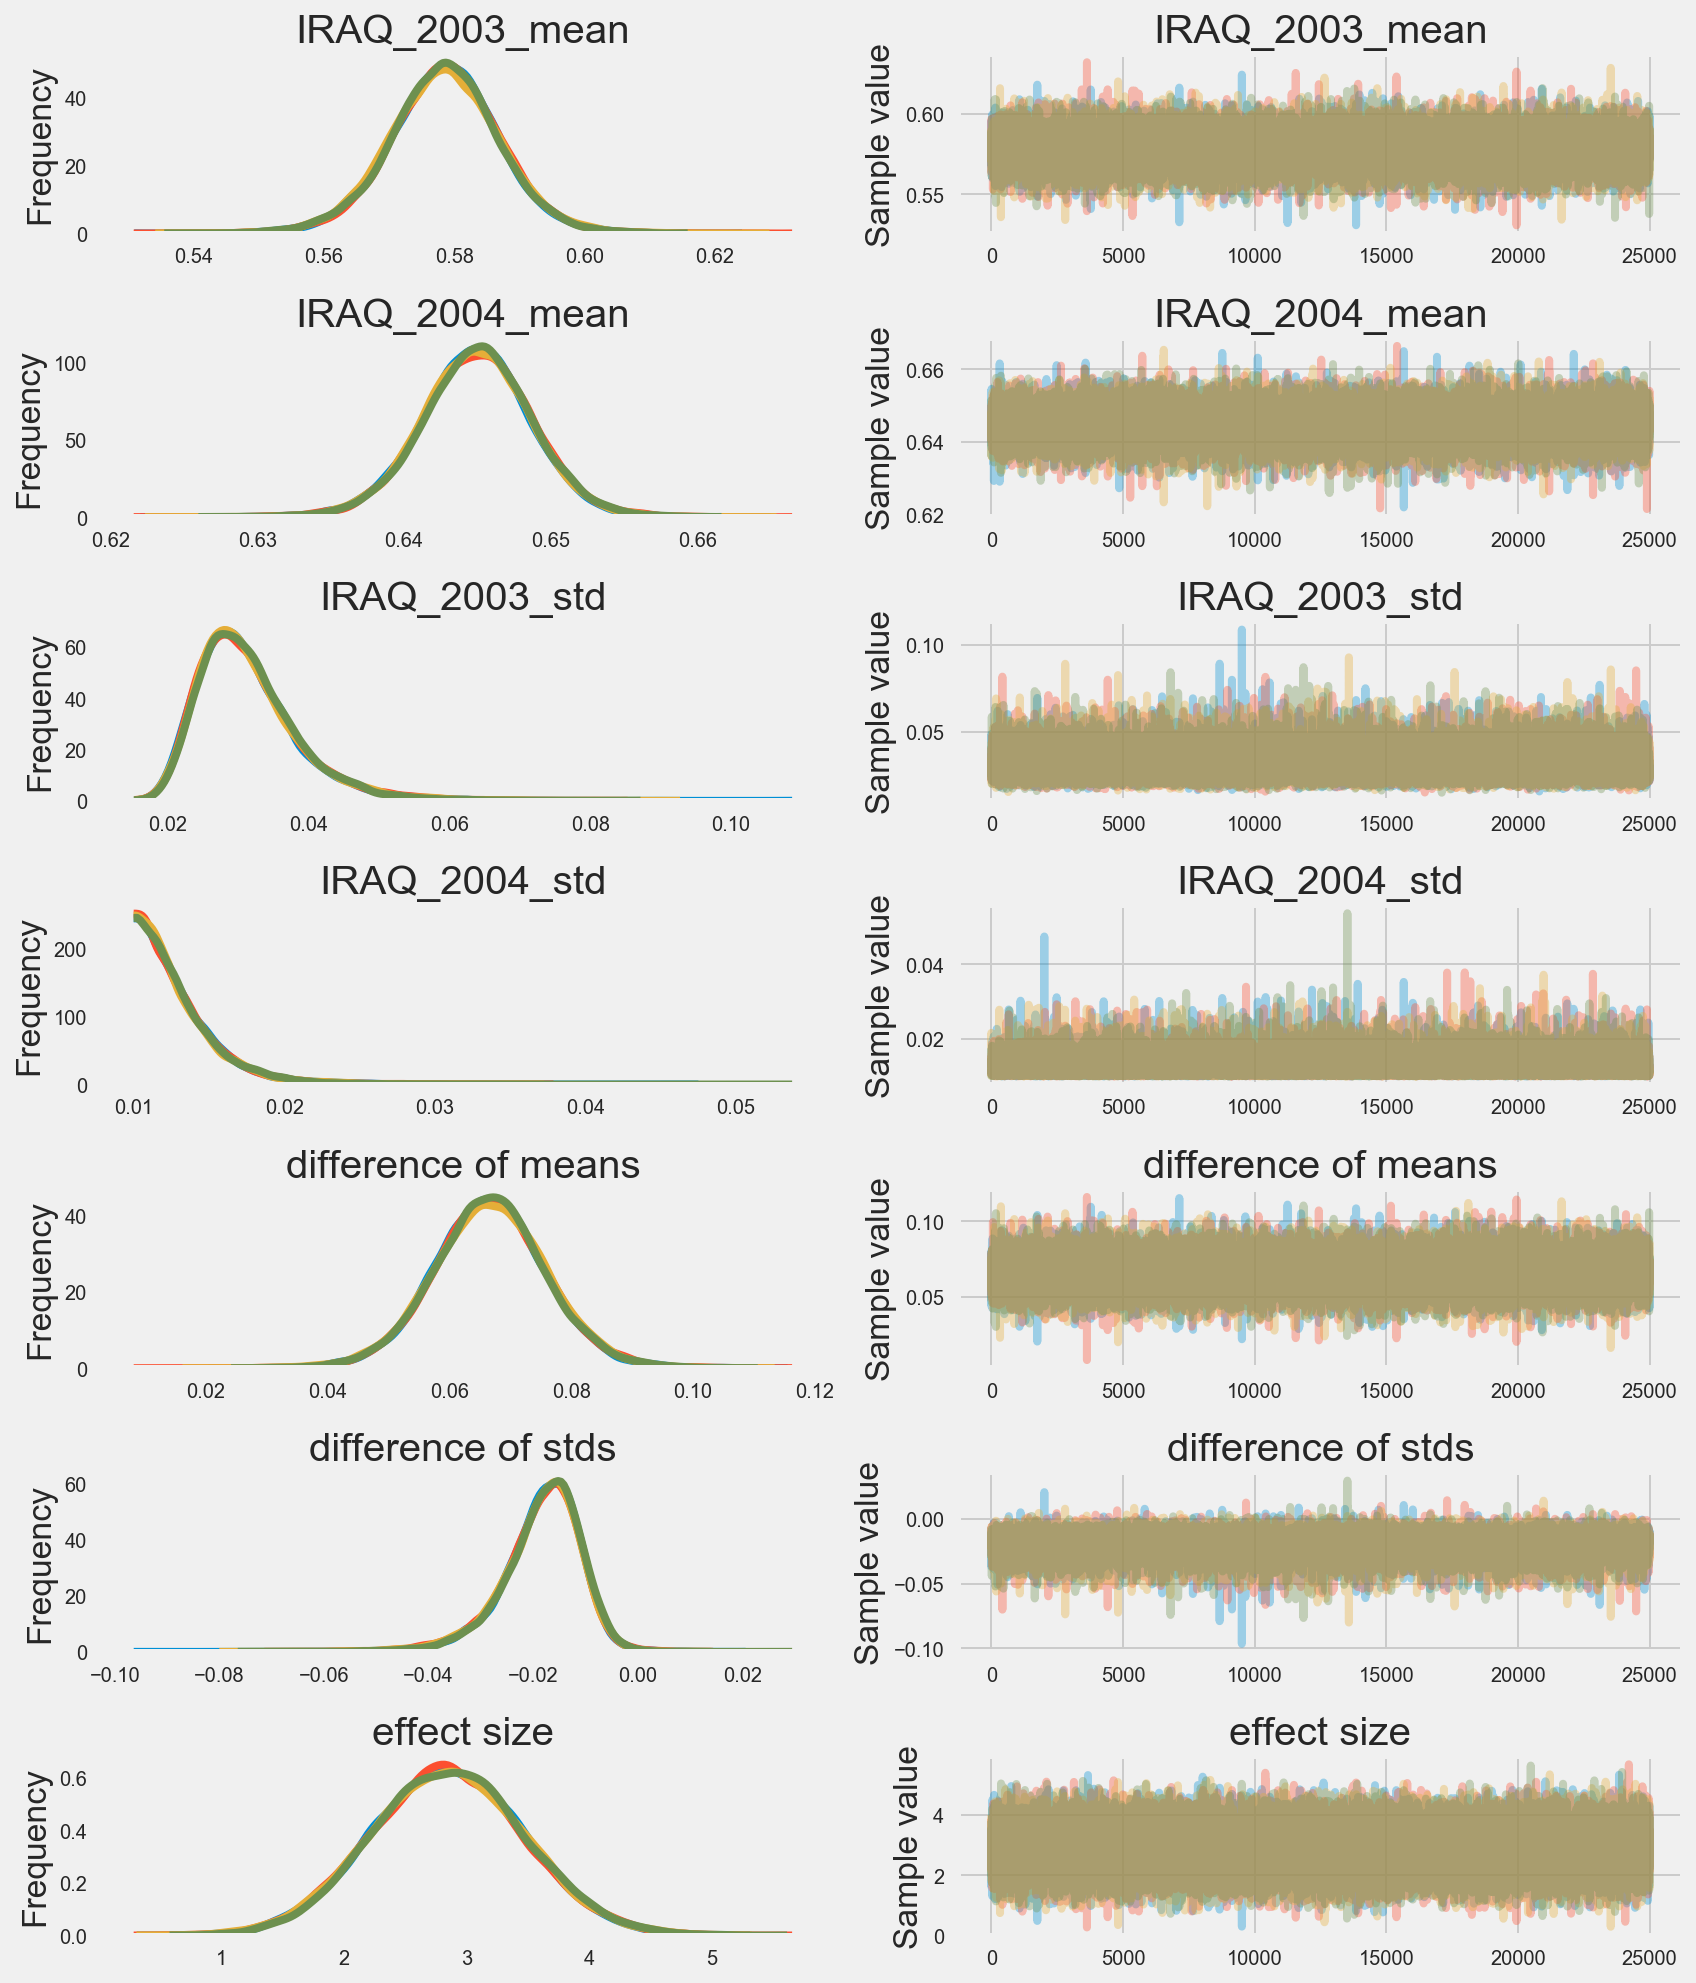

In [268]:
pm.traceplot(trace)

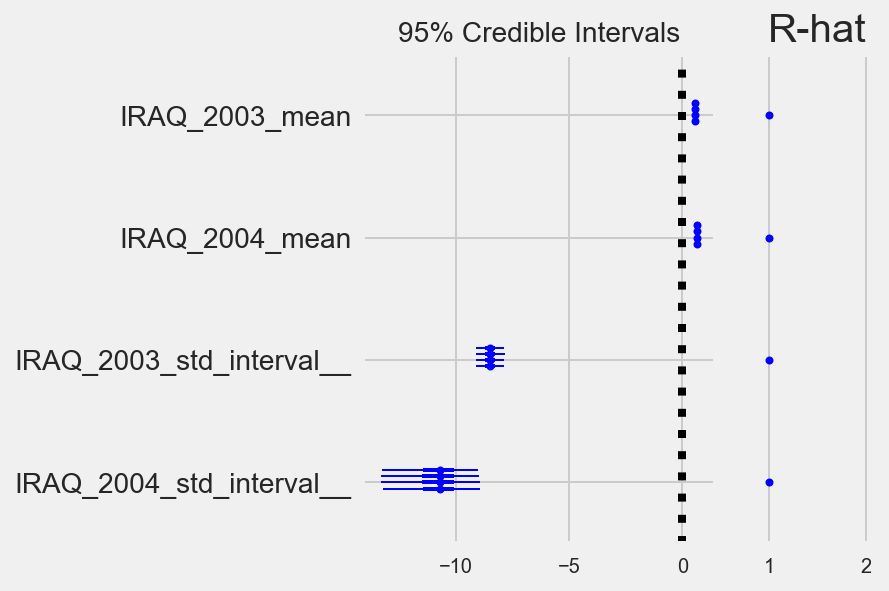

In [269]:
pm.forestplot(trace[3000:], varnames=[v.name for v in model.vars])

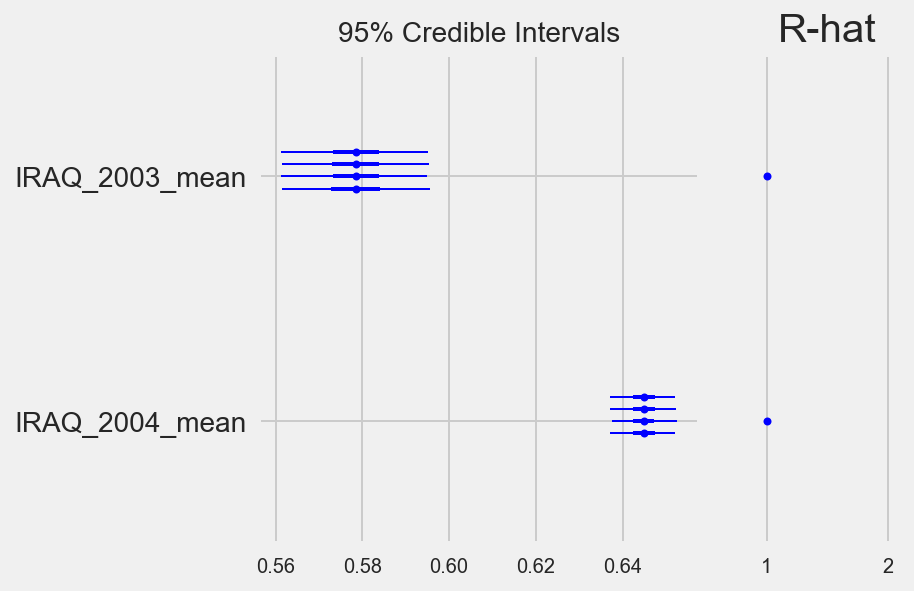

In [270]:
pm.forestplot(trace[3000:], varnames=[v.name for v in model.vars[:2]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1492be310>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x149cda750>], dtype=object)

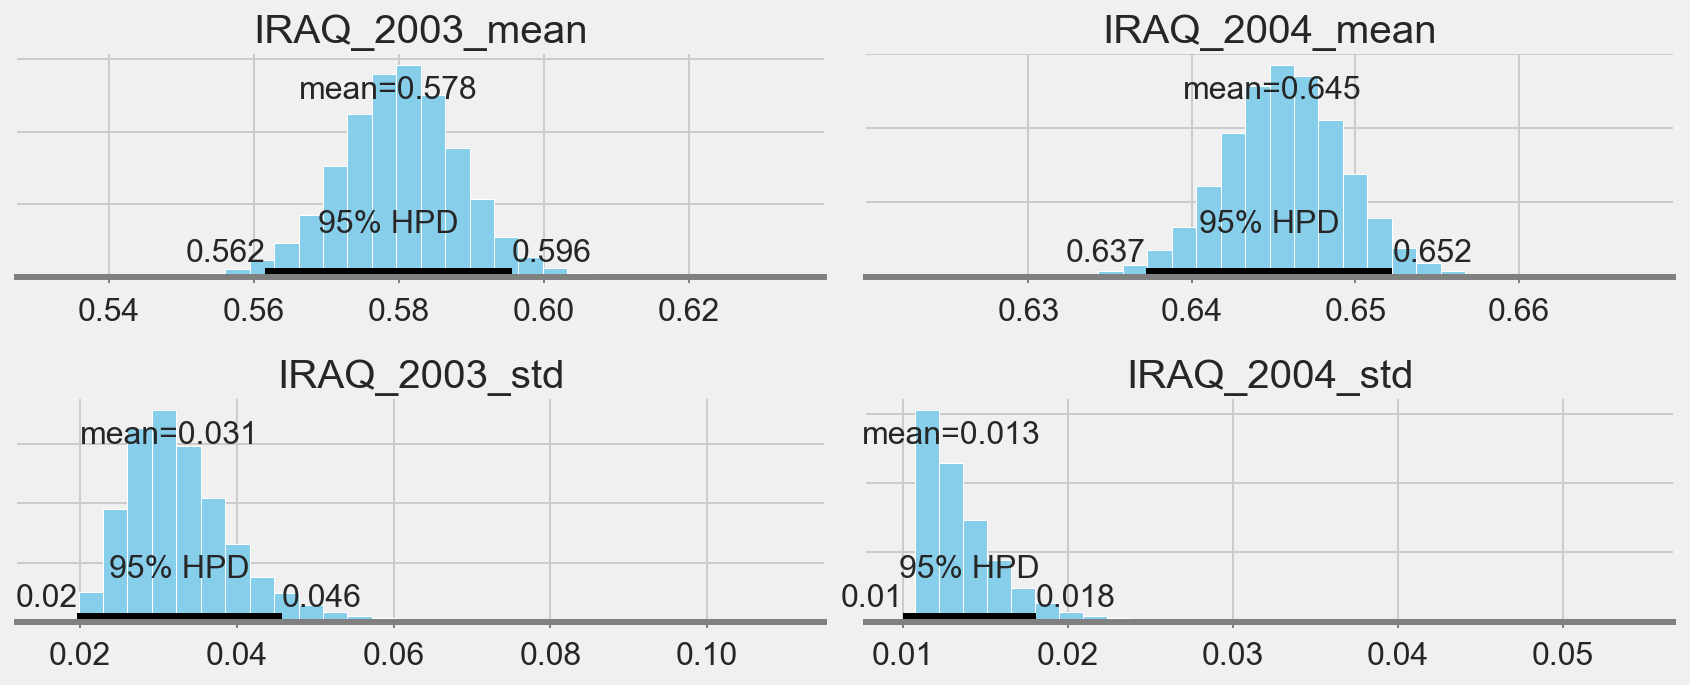

In [271]:
pm.plot_posterior(trace[3000:],
                  varnames=['IRAQ_2003_mean', 'IRAQ_2004_mean', 'IRAQ_2003_std', 'IRAQ_2004_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x149232750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x148eaca50>], dtype=object)

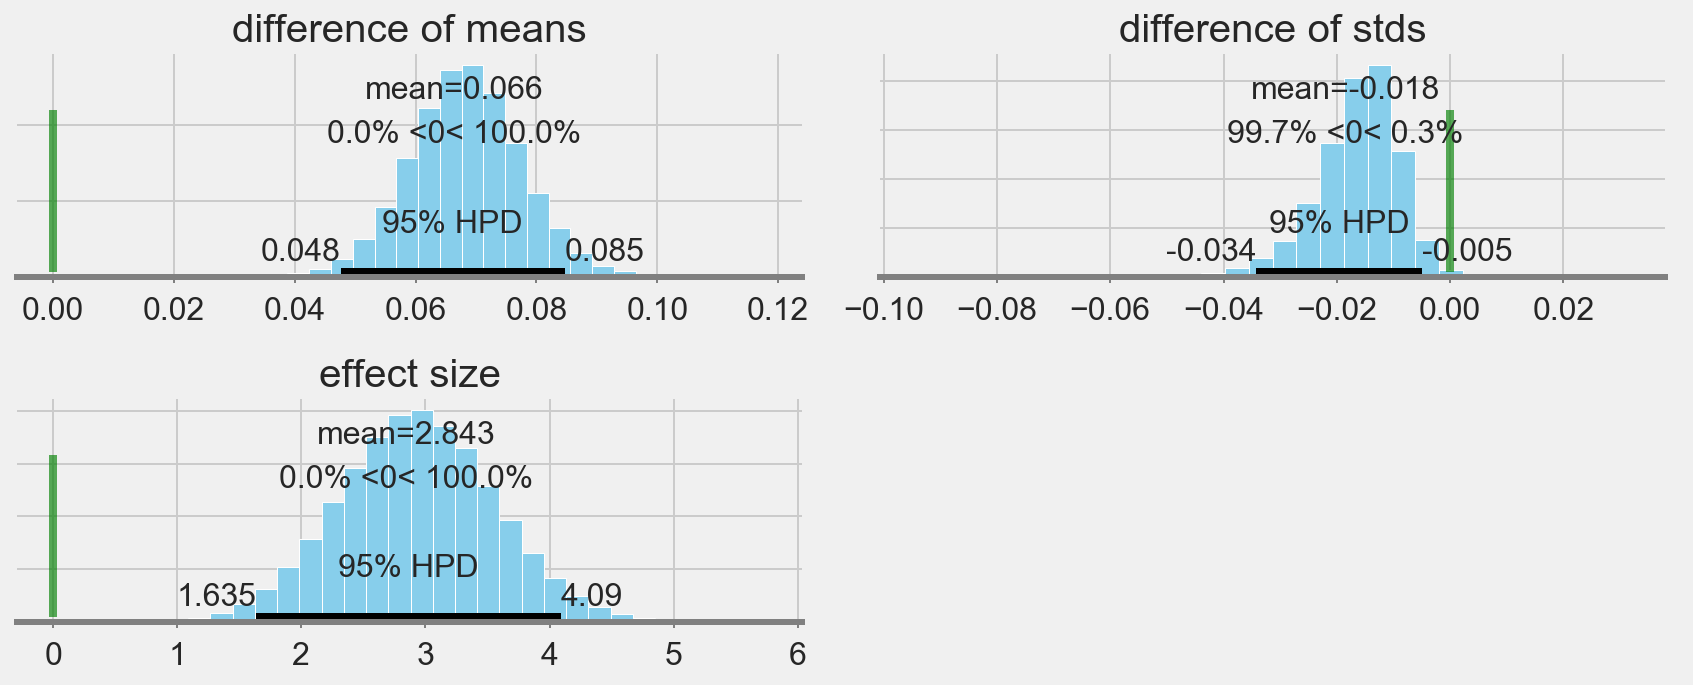

In [272]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

The difference of means do not overlaps and the difference of standard deviations indicates that greater than 99% do not overlap.  The effect size is interpreted as the mean of the HD after the start of the Iraq conflict is 2.843 standard deviations higher than the mean of the HDI prior to the start of the conflict.

## Afghanistan

In [168]:
AFG_HDI.reset_index(inplace=True)

In [169]:
AFG_HDI = AFG_HDI[['Year', 'HDI']]

In [170]:
AFG2001 = AFG_HDI[AFG_HDI.Year <= '2001'].HDI.values
AFG2002 = AFG_HDI[AFG_HDI.Year >= '2002'].HDI.values

In [171]:
with pm.Model() as model:

    afg2001_mean = pm.Normal('AFG_2001_mean', mean_prior_mean, sd=mean_prior_std)
    afg2002_mean = pm.Normal('AFG_2002_mean', mean_prior_mean, sd=mean_prior_std)

In [172]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    afg2001_std = pm.Uniform('AFG_2001_std', lower=std_prior_lower, upper=std_prior_upper)
    afg2002_std = pm.Uniform('AFG_2002_std', lower=std_prior_lower, upper=std_prior_upper)

In [173]:
with model:

    afg2001 = pm.Normal('AFG_2001', mu=afg2001_mean, sd=afg2001_std, observed=AFG2001)
    afg2002 = pm.Normal('AFG_2002', mu=afg2002_mean, sd=afg2002_std, observed=AFG2002)

In [174]:
with model:

    diff_of_means = pm.Deterministic('difference of means', afg2002_mean - afg2001_mean)
    diff_of_stds = pm.Deterministic('difference of stds', afg2002_std - afg2001_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((afg2002_std**2 + afg2001_std**2) / 2))


In [175]:
t0 = time.time()

with model:
    trace = pm.sample(25000, njobs=4)
    
t1 = time.time()

print t1 - t0

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 66.942:   5%|▍         | 9501/200000 [00:00<00:17, 10673.86it/s]
Convergence archived at 10300
Interrupted at 10,300 [5%]: Average Loss = 102.27
 94%|█████████▎| 23873/25500 [03:06<00:12, 129.97it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 1 contains 91 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 25487/25500 [03:16<00:00, 148.59it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 15 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 25500/25500 [03:16<00:00, 129.61it/s]
/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 3 contains 56 diverging samples after t

212.688895941


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133856e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13076bc10>]], dtype=object)

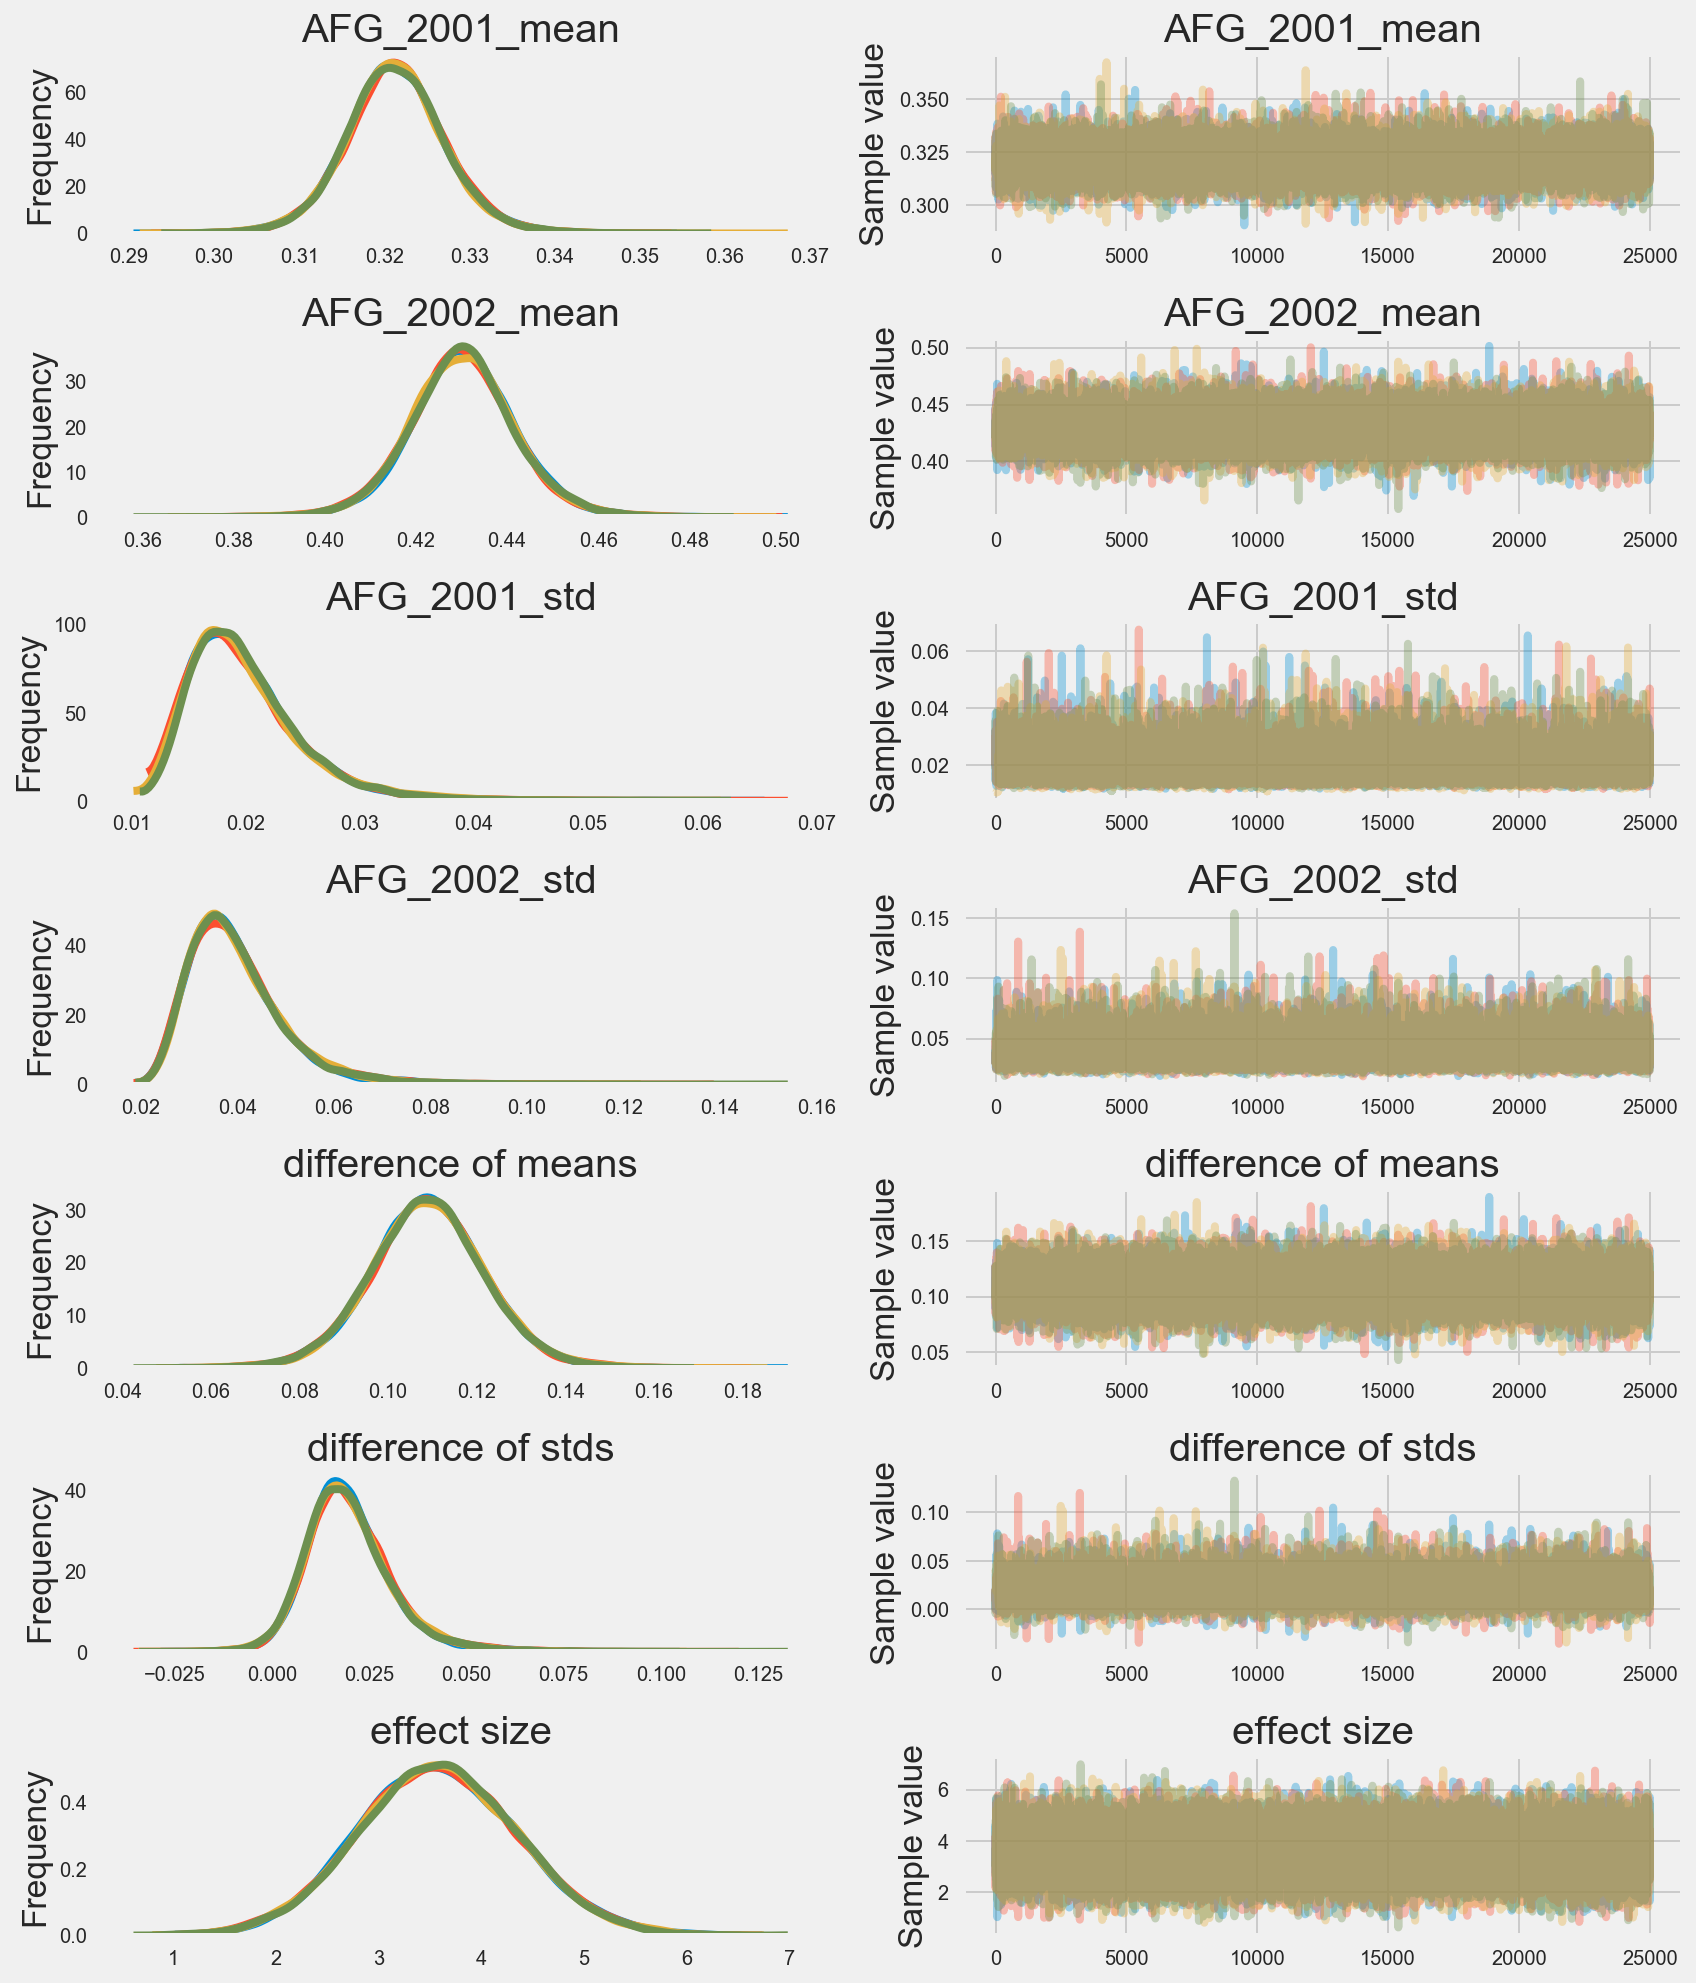

In [176]:
pm.traceplot(trace)

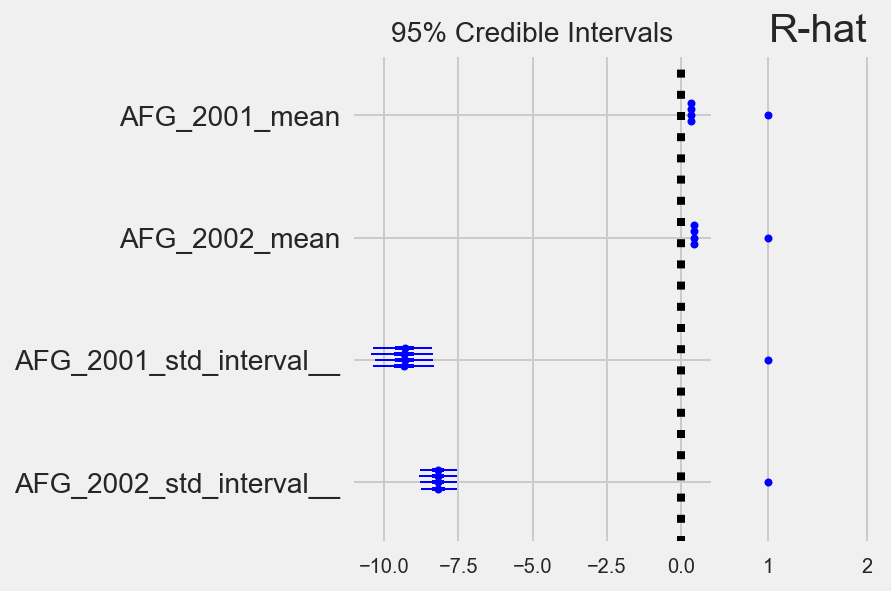

In [177]:
pm.forestplot(trace[3000:], varnames=[v.name for v in model.vars])

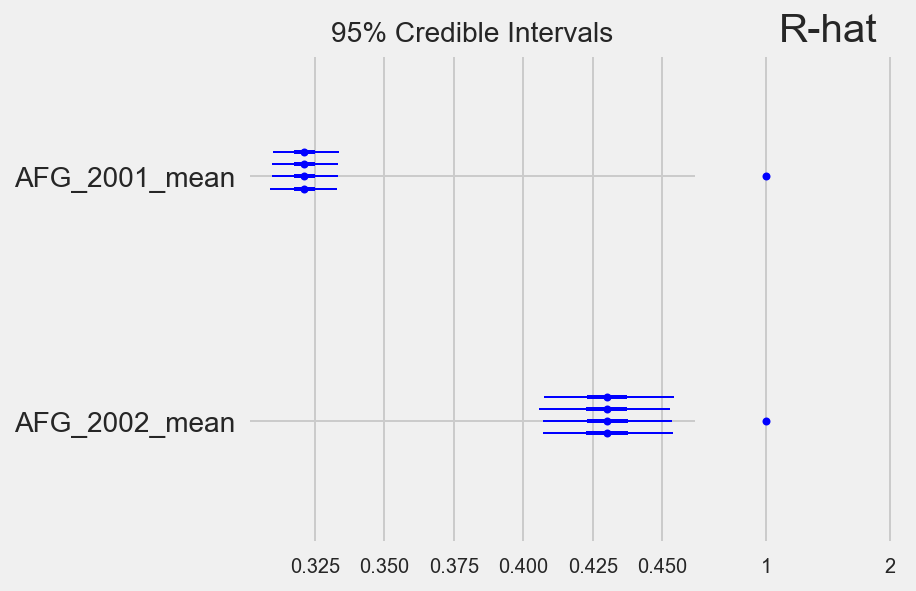

In [178]:
pm.forestplot(trace[3000:], varnames=[v.name for v in model.vars[:2]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1329a0290>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12542c790>], dtype=object)

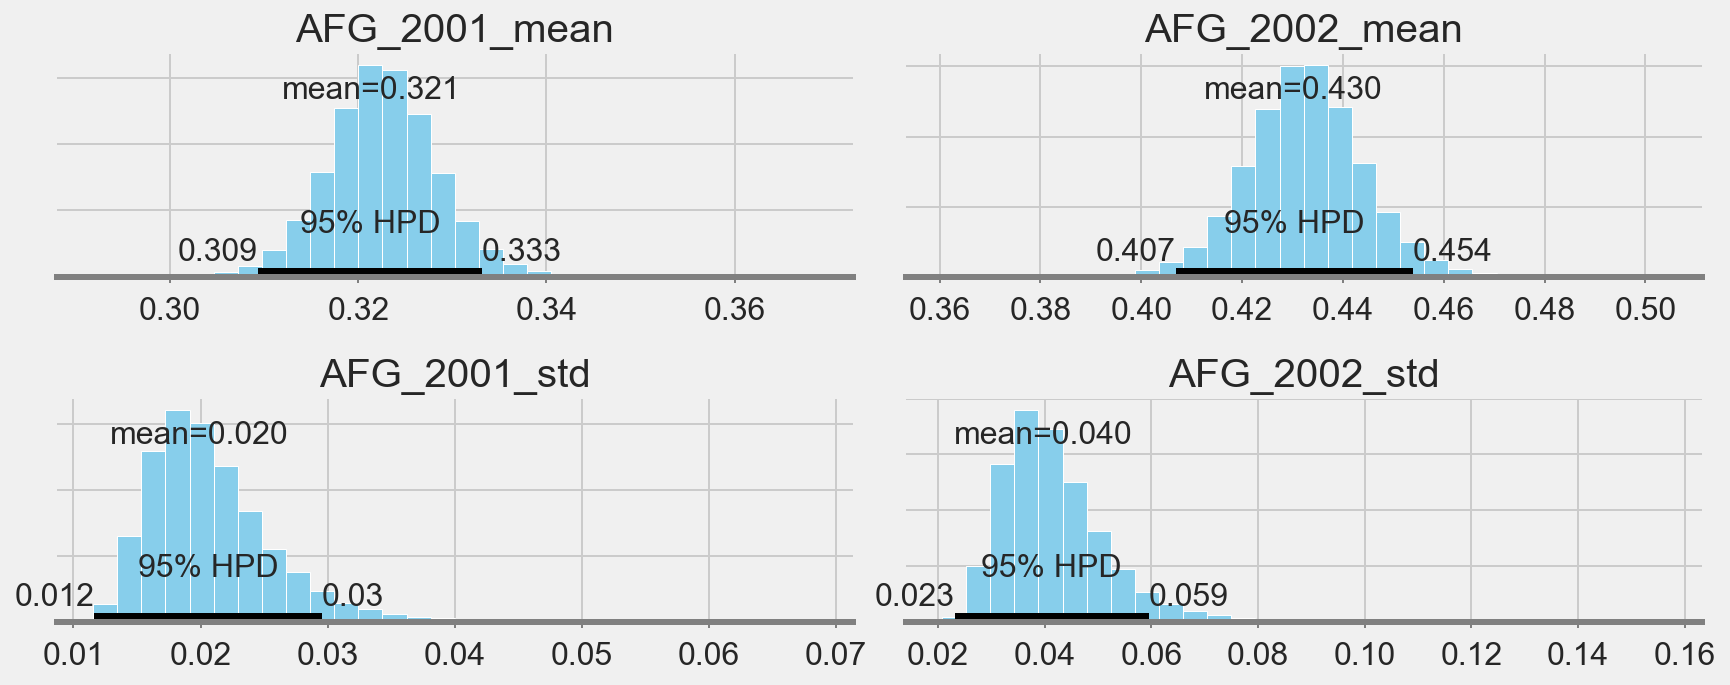

In [180]:
pm.plot_posterior(trace[3000:],
                  varnames=['AFG_2001_mean', 'AFG_2002_mean', 'AFG_2001_std', 'AFG_2002_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1329a0710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12d0c4510>], dtype=object)

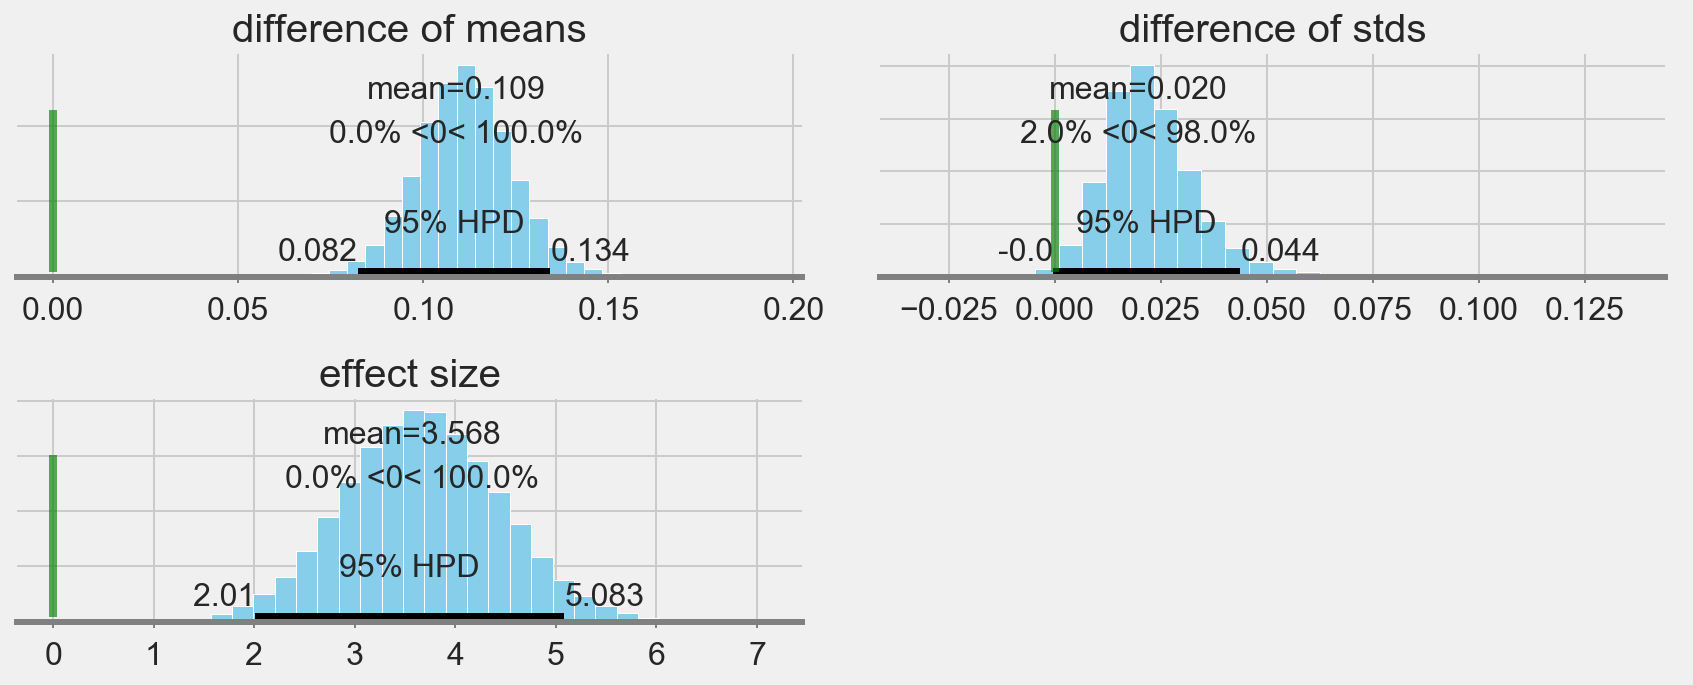

In [181]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

The difference of means and standard deviation do not overlap.  The effect size is 3.568 and is interpreted as the mean of Afghanistan's HDI after the conflict is 3.568 standard deviations above the mean of Afghanistan's HDI before the start of the conflict.

## Bayesian Regression Model

Using the Bayesian Regression to develop a model that predicts Human Development Index (y) as a function of the predictor, the GTI rank of the country.

The following cells consolidate the GTI ranking data with the HDI for each country for the four years the GTI report has been published.  A regression model is first built for the 2015 data only and is followed by a comprehensive model that includes all four years.

In [3]:
gti_2015 = pd.read_csv('gti_2015_new.csv')

In [4]:
gti_2015.head()

Rank      Country  Score
0     1         Iraq  9.960
1     2  Afghanistan  9.444
2     3      Nigeria  9.314
3     4     Pakistan  8.613
4     5        Syria  8.587

In [47]:
hdi_2015 = HDI[['Country', 'HDI_rank', '2015']]

In [48]:
col_2015 = ['Country', 'HDI_rank', 'HDI']

In [49]:
hdi_2015.columns = col_2015

In [50]:
list(hdi_2015.Country.unique())

[' Afghanistan',
 ' Albania',
 ' Algeria',
 ' Andorra',
 ' Angola',
 ' Antigua and Barbuda',
 ' Argentina',
 ' Armenia',
 ' Australia',
 ' Austria',
 ' Azerbaijan',
 ' Bahamas',
 ' Bahrain',
 ' Bangladesh',
 ' Barbados',
 ' Belarus',
 ' Belgium',
 ' Belize',
 ' Benin',
 ' Bhutan',
 ' Bolivia (Plurinational State of)',
 ' Bosnia and Herzegovina',
 ' Botswana',
 ' Brazil',
 ' Brunei Darussalam',
 ' Bulgaria',
 ' Burkina Faso',
 ' Burundi',
 ' Cabo Verde',
 ' Cambodia',
 ' Cameroon',
 ' Canada',
 ' Central African Republic',
 ' Chad',
 ' Chile',
 ' China',
 ' Colombia',
 ' Comoros',
 ' Congo',
 ' Congo (Democratic Republic of the)',
 ' Costa Rica',
 ' Croatia',
 ' Cuba',
 ' Cyprus',
 ' Czech Republic',
 " C\xf4te d'Ivoire",
 ' Denmark',
 ' Djibouti',
 ' Dominica',
 ' Dominican Republic',
 ' Ecuador',
 ' Egypt',
 ' El Salvador',
 ' Equatorial Guinea',
 ' Eritrea',
 ' Estonia',
 ' Ethiopia',
 ' Fiji',
 ' Finland',
 ' France',
 ' Gabon',
 ' Gambia',
 ' Georgia',
 ' Germany',
 ' Ghana',
 ' Gr

In [51]:
new_list = []
for i in hdi_2015.Country:
    new_name = i.replace(' ', '')
    new_list.append(new_name)

In [52]:
hdi_2015.loc[:,'Country'] = new_list

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
hdi_2015.to_csv('hdi_2015.csv', index=False)

In [54]:
hdi_2015 = pd.read_csv('hdi_2015.csv')

In [55]:
hdi_2015.head()

Country  HDI_rank    HDI
0  Afghanistan       169  0.479
1      Albania        75  0.764
2      Algeria        83  0.745
3      Andorra        32  0.858
4       Angola       150  0.533

In [56]:
list(hdi_2015.Country.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'AntiguaandBarbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia(PlurinationalStateof)',
 'BosniaandHerzegovina',
 'Botswana',
 'Brazil',
 'BruneiDarussalam',
 'Bulgaria',
 'BurkinaFaso',
 'Burundi',
 'CaboVerde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'CentralAfricanRepublic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo(DemocraticRepublicofthe)',
 'CostaRica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'CzechRepublic',
 "C\xf4ted'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'DominicanRepublic',
 'Ecuador',
 'Egypt',
 'ElSalvador',
 'EquatorialGuinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hon

In [57]:
gti_2015 = pd.read_csv('GTI_2015_new.csv')

In [58]:
gti_cols = ['GTI_rank', 'Country', 'GTI']

In [59]:
gti_2015.columns = gti_cols

In [60]:
merge_2015 = pd.merge(hdi_2015, gti_2015, on = 'Country', how = 'outer')

In [64]:
merge_2015.dropna(inplace=True)

In [65]:
merge_2015.shape

(145, 5)

In [66]:
from pymc3 import *
with pm.Model() as model:
    # With glm, the likelihood and all its parameters are automatically added to our model.
 #   pm.glm.glm('APM ~ Age_num', apm_age)
    glm.GLM.from_formula('HDI ~ GTI', merge_2015)
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pm.sample(25000, step, progressbar=True) 

Optimization terminated successfully.
         Current function value: -46.909146
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22


100%|██████████| 25500/25500 [00:18<00:00, 1406.84it/s]


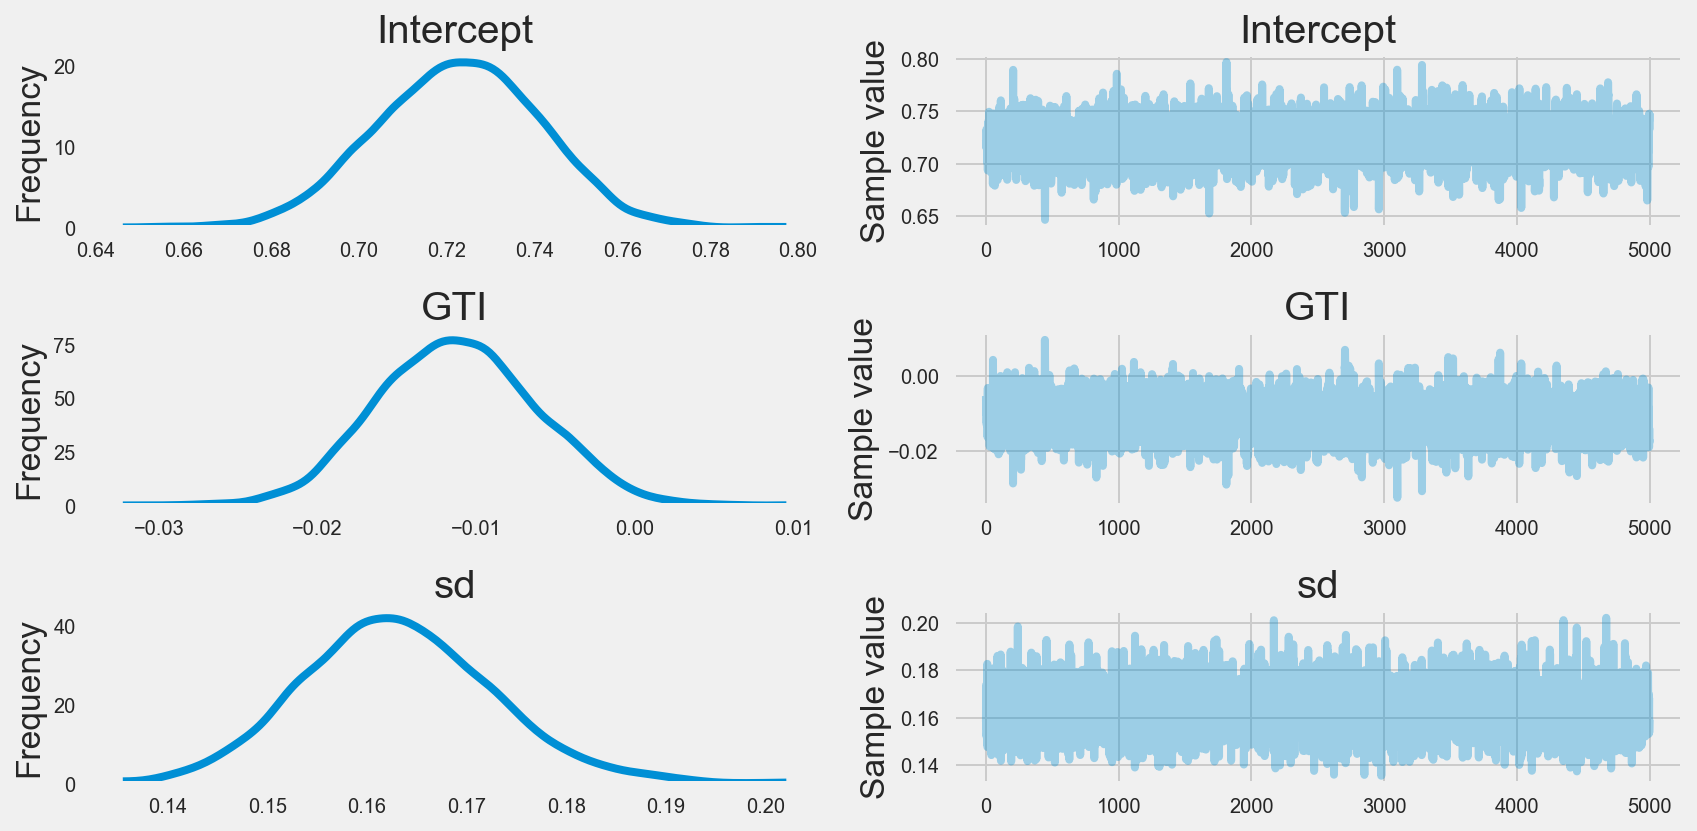

In [67]:
plt.figure(figsize=(7,7))
pm.traceplot(trace[:5000])
plt.tight_layout()

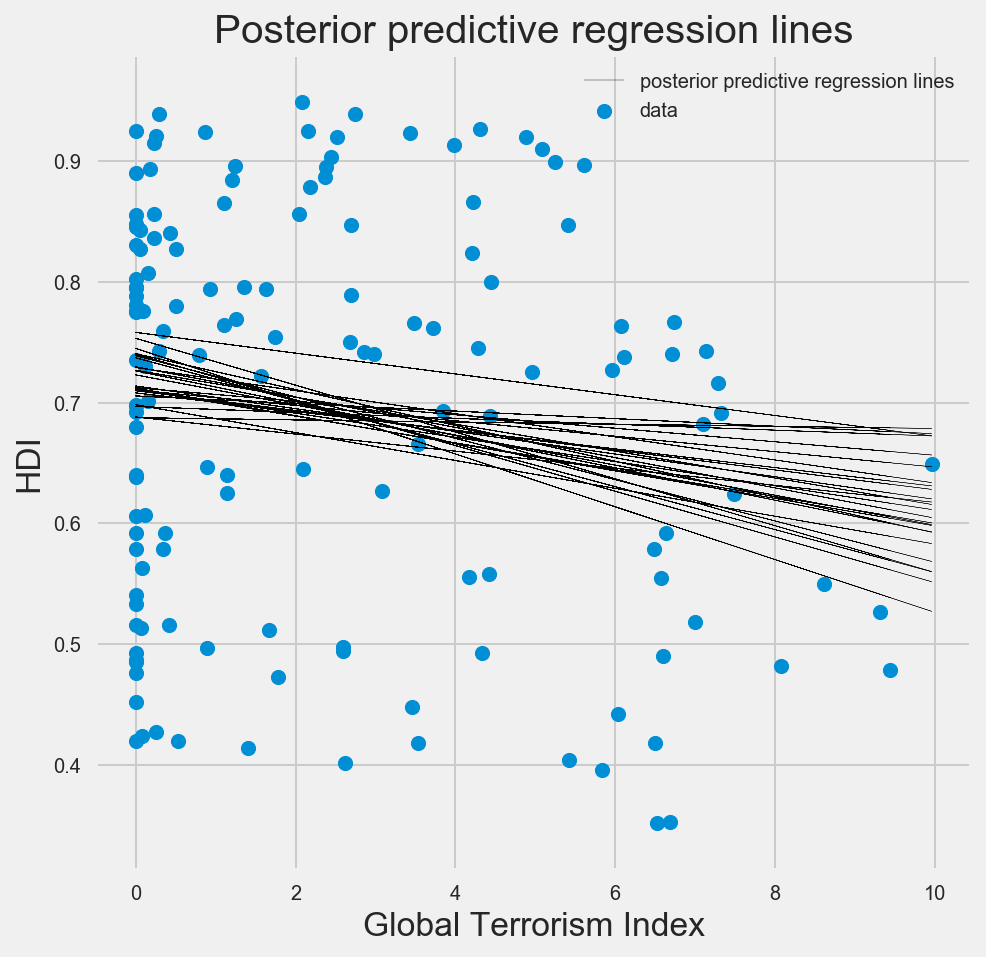

In [68]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(merge_2015.GTI.values, merge_2015.HDI.values,
           s=50, label='data')
alpha=0.05, 

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');
plot_posterior_predictive_glm(trace, samples=25, 
                                lm=lambda x, sample: sample['Intercept'] + sample['GTI']*x,
                                eval=merge_2015.GTI.values,
                                label='posterior predictive regression lines')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('Global Terrorism Index')
plt.ylabel('HDI')

plt.show()

In [69]:
gti_2013 = pd.read_csv('GTI_2013 .csv')

In [70]:
gti_2013.head()

Country    GTI
0         Iraq  10.00
1  Afghanistan   9.39
2     Pakistan   9.37
3      Nigeria   8.58
4        Syria   8.12

In [71]:
hdi_2013 = HDI[['HDI_rank', 'Country', '2013']]

In [72]:
cols_2013 = ['HDI_rank', 'Country', 'HDI']

In [73]:
hdi_2013.columns = cols_2013

In [74]:
list(hdi_2013.Country.unique())

[' Afghanistan',
 ' Albania',
 ' Algeria',
 ' Andorra',
 ' Angola',
 ' Antigua and Barbuda',
 ' Argentina',
 ' Armenia',
 ' Australia',
 ' Austria',
 ' Azerbaijan',
 ' Bahamas',
 ' Bahrain',
 ' Bangladesh',
 ' Barbados',
 ' Belarus',
 ' Belgium',
 ' Belize',
 ' Benin',
 ' Bhutan',
 ' Bolivia (Plurinational State of)',
 ' Bosnia and Herzegovina',
 ' Botswana',
 ' Brazil',
 ' Brunei Darussalam',
 ' Bulgaria',
 ' Burkina Faso',
 ' Burundi',
 ' Cabo Verde',
 ' Cambodia',
 ' Cameroon',
 ' Canada',
 ' Central African Republic',
 ' Chad',
 ' Chile',
 ' China',
 ' Colombia',
 ' Comoros',
 ' Congo',
 ' Congo (Democratic Republic of the)',
 ' Costa Rica',
 ' Croatia',
 ' Cuba',
 ' Cyprus',
 ' Czech Republic',
 " C\xf4te d'Ivoire",
 ' Denmark',
 ' Djibouti',
 ' Dominica',
 ' Dominican Republic',
 ' Ecuador',
 ' Egypt',
 ' El Salvador',
 ' Equatorial Guinea',
 ' Eritrea',
 ' Estonia',
 ' Ethiopia',
 ' Fiji',
 ' Finland',
 ' France',
 ' Gabon',
 ' Gambia',
 ' Georgia',
 ' Germany',
 ' Ghana',
 ' Gr

In [75]:
new_list = []
for i in hdi_2013.Country:
    new_name = i.replace(' ', '')
    new_list.append(new_name)

In [76]:
hdi_2013.loc[:,'Country'] = new_list

In [77]:
hdi_2013.to_csv('hdi_2013.csv', index=False)

In [78]:
hdi_2013 = pd.read_csv('hdi_2013.csv')

In [79]:
merge_2013 = pd.merge(hdi_2013, gti_2013, on = 'Country', how = 'outer')

In [81]:
#eda(merge_2013)

In [82]:
merge_2013.dropna(inplace=True)

In [83]:
gti_2011 = pd.read_csv('GTI_2011.csv')

In [84]:
gti_2011.head()

Country    GTI
0         Iraq  9.556
1     Pakistan  9.049
2  Afghanistan  8.669
3        India  8.147
4        Yemen  7.305

In [85]:
hdi_2011 = HDI[['HDI_rank', 'Country', '2011']]

In [86]:
cols_2011 = ['HDI_rank', 'Country', 'HDI']

In [87]:
hdi_2011.columns = cols_2011

In [88]:
new_list = []
for i in hdi_2011.Country:
    new_name = i.replace(' ', '')
    new_list.append(new_name)

In [89]:
hdi_2011.loc[:,'Country'] = new_list

In [90]:
hdi_2011.to_csv('hdi_2011.csv', index=False)

In [91]:
hdi_2011 = pd.read_csv('hdi_2011.csv')

In [92]:
merge_2011 = pd.merge(hdi_2011, gti_2011, on = 'Country', how = 'outer')

In [93]:
#eda(merge_2011)

In [94]:
merge_2011.dropna(inplace=True)

In [95]:
gti_2014 = pd.read_csv('GTI_2014 - Sheet1.csv')

In [96]:
gti_2014.head()

Country     GTI
0         Iraq  10.000
1  Afghanistan   9.233
2      Nigeria   9.213
3     Pakistan   9.065
4        Syria   8.108

In [97]:
hdi_2014 = pd.read_csv('HDI_2014.csv')

In [98]:
hdi_2014.head()

HDI_rank      Country   2014
0       169  Afghanistan  0.479
1        75      Albania  0.762
2        83      Algeria  0.743
3        32      Andorra  0.857
4       150       Angola  0.531

In [99]:
cols_2014 = ['HDI_rank', 'Country', 'HDI']

In [100]:
hdi_2014.columns = cols_2014

In [103]:
merge_2014 = pd.merge(hdi_2014, gti_2014, on = 'Country', how = 'outer')

In [105]:
merge_2014.dropna(inplace=True)

In [106]:
frames = [merge_2011, merge_2013, merge_2014, merge_2015]

In [107]:
new_df = pd.concat(frames)

In [110]:
df = new_df.loc[:,['Country', 'GTI', 'HDI']]

In [111]:
df.dropna(inplace=True)

In [112]:
from pymc3 import *
with pm.Model() as model:
    glm.GLM.from_formula('HDI ~ GTI', df)
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pm.sample(25000, step, progressbar=True) 

Optimization terminated successfully.
         Current function value: -223.027271
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22


100%|██████████| 25500/25500 [00:19<00:00, 1335.93it/s]


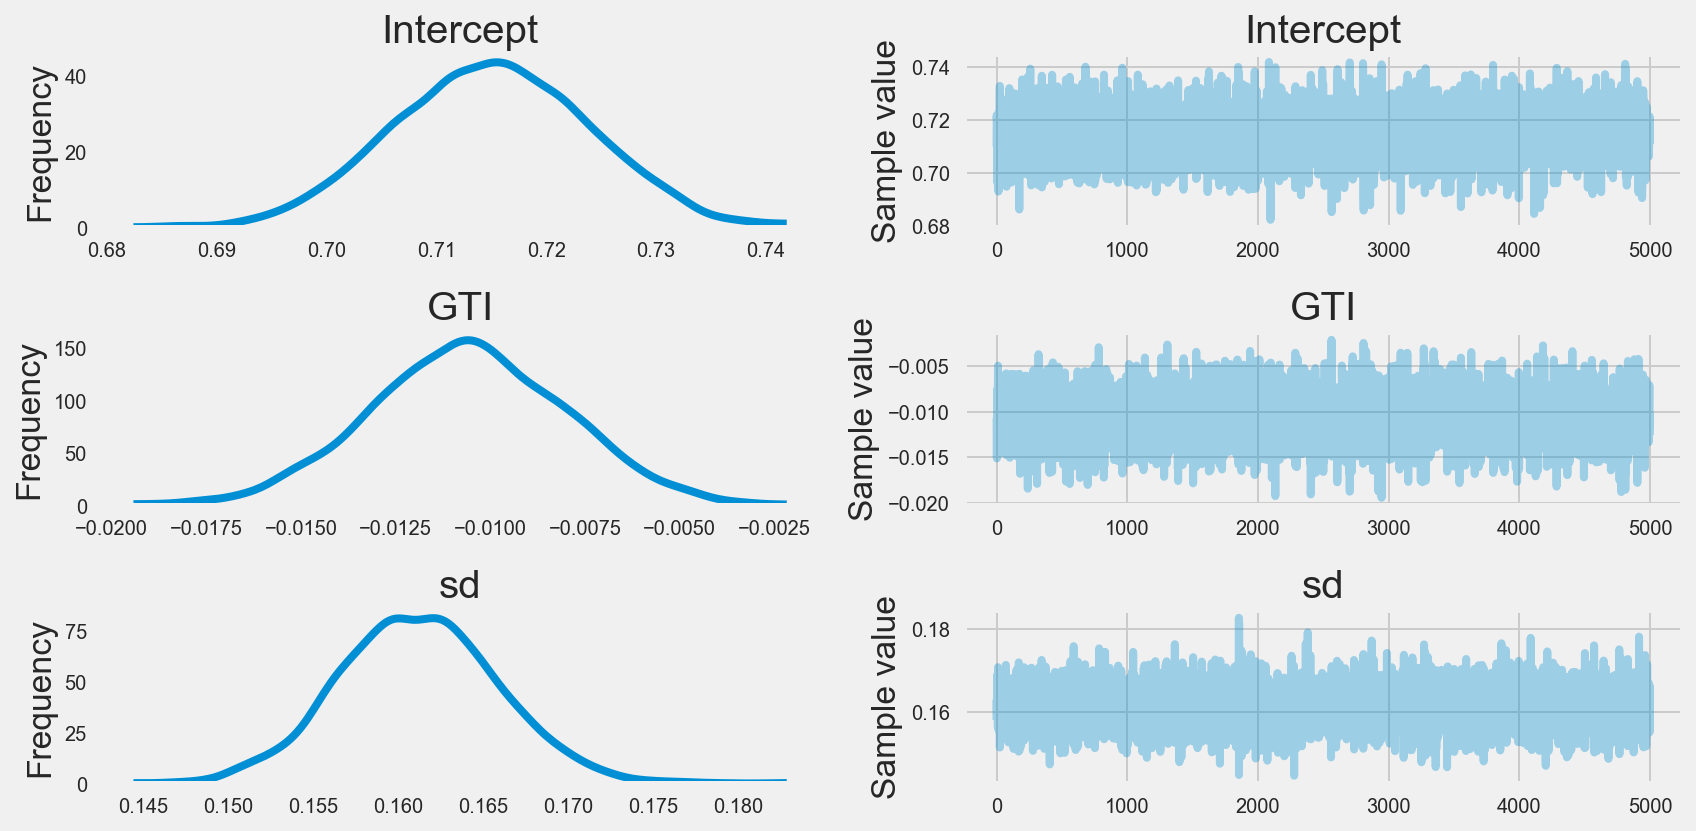

In [113]:
plt.figure(figsize=(7,7))
pm.traceplot(trace[:5000])
plt.tight_layout()

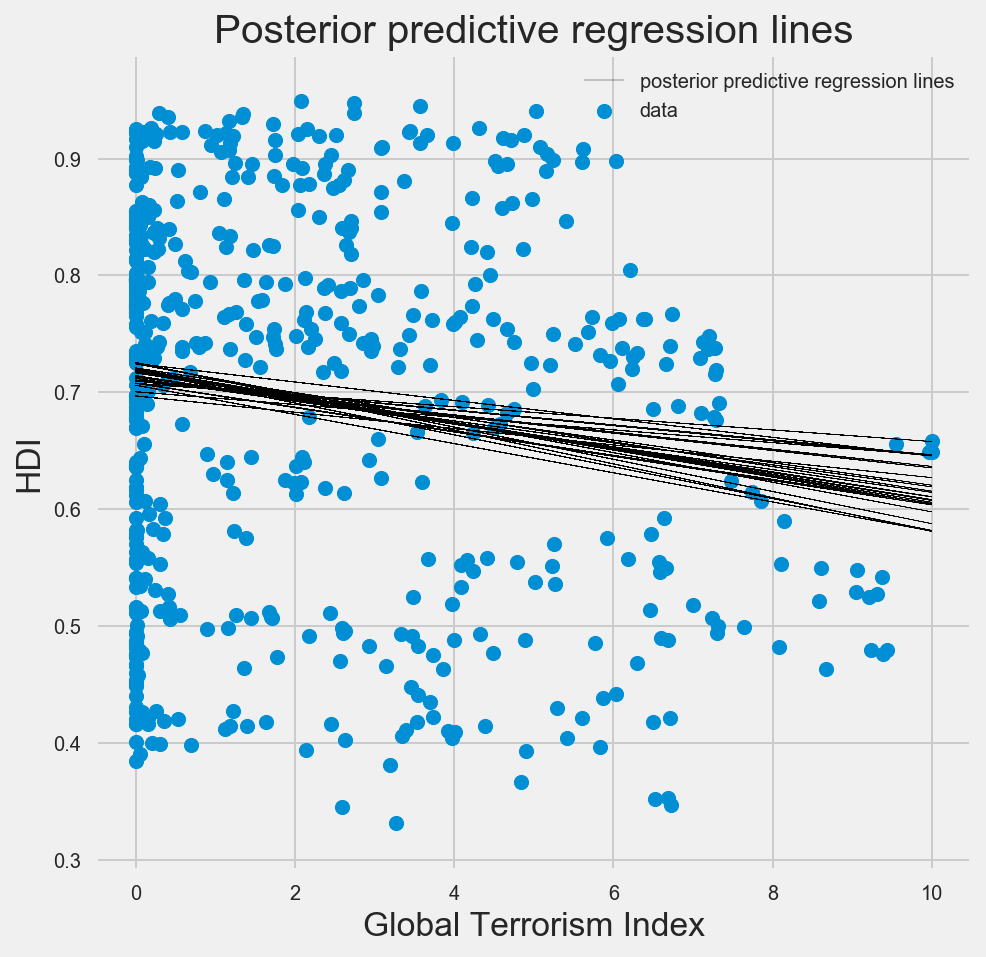

In [114]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(df.GTI.values, df.HDI.values,
           s=50, label='data')
alpha=0.05, 
plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');
plot_posterior_predictive_glm(trace, samples=25, 
                                lm=lambda x, sample: sample['Intercept'] + sample['GTI']*x,
                                eval=df.GTI.values,
                                label='posterior predictive regression lines')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('Global Terrorism Index')
plt.ylabel('HDI')

plt.show()

In [115]:
# sample the model to create posterior prediction checks
ppc = pm.sample_ppc(trace, model=model, samples=100)

100%|██████████| 100/100 [00:00<00:00, 769.70it/s]


In [116]:
print(ppc['y'].shape)
print(ppc)

(100, 573)
{'y': array([[ 0.66848195,  0.54897036,  0.7091067 , ...,  0.85460423,
         0.55610538,  0.59957559],
       [ 0.80711246,  0.87037064,  0.53501184, ...,  0.76275235,
         0.75952224,  0.84882828],
       [ 0.72610635,  0.68994639,  0.75782854, ...,  0.85195896,
         0.50950948,  0.52775178],
       ..., 
       [ 0.83551362,  0.87045043,  0.6960559 , ...,  0.63943093,
         0.67260493,  0.73541277],
       [ 0.70904549,  0.85200201,  0.66446278, ...,  0.52014578,
         0.70674199,  0.4540201 ],
       [ 0.45337256,  0.86829559,  0.81275739, ...,  0.41376038,
         0.81039339,  0.77012925]])}


In [117]:
print(len(ppc['y']))

100


In [118]:
print((ppc['y'][0][0]))

0.668481948692


In [119]:
len(ppc['y'][0])

573

In [120]:
from pymc3 import summary
summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.715            0.009            0.000            [0.697, 0.732]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.697          0.709          0.715          0.721          0.732


GTI:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.011           0.003            0.000            [-0.016, -0.005]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.016         -0.012         -0.011         -0.009         -0.005


sd:

  Mean             SD               MC Error         95% HPD interval
  -----------------------

In [121]:
alpha_pred = trace['Intercept'].mean()
betas_pred = trace['GTI'].mean(axis=0)

In [122]:
y_pred = alpha_pred + np.dot(betas_pred, df.GTI.values)

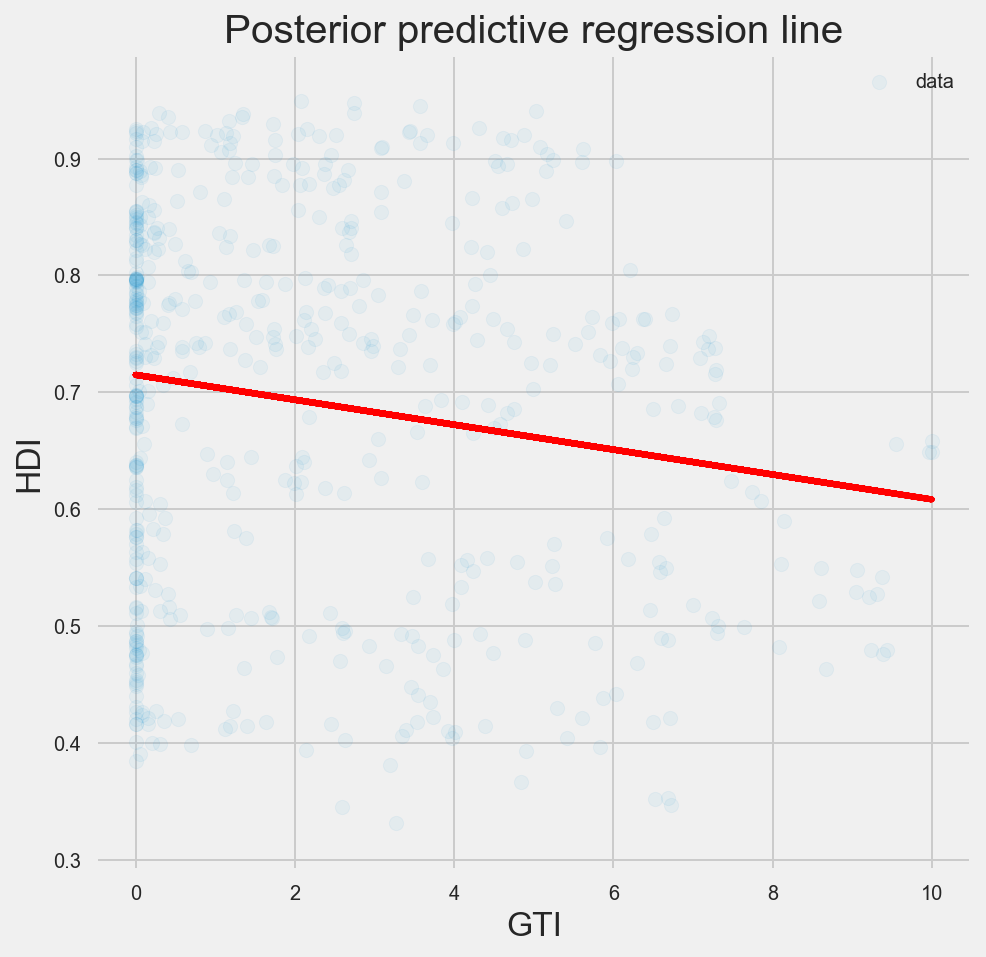

In [123]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(df.GTI.values, df.HDI.values,
           s=50, alpha=0.05, label='data')

ax.plot(df.GTI.values, y_pred, color='red',linewidth=3)

plt.title('Posterior predictive regression line')
plt.legend(loc=0)
plt.xlabel('GTI')
plt.ylabel('HDI')

plt.show()

The 95% credible interval for the intercept is [0.697, 0.732].
The 95% credible interval for the coefficient of the predictor (GTI) is [-0.016, -0.005].
The 95% credible interval for the standard deviation is [0.152, 0.171].